## Image Processing

In [ ]:
# import the necessary packages
import numpy as np
import imutils
import glob
import cv2
from google.colab.patches import cv2_imshow

def rotateImage(image, angle):
    center=tuple(np.array(image.shape[0:2])/2)
    rotate_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    return cv2.warpAffine(image, rotate_mat, image.shape[0:2],flags=cv2.INTER_LINEAR)

def match_shape(room_shape_path, image_path, visualize):

  font = cv2.FONT_HERSHEY_COMPLEX
  # load room shape and convert it to grayscale,
  room_image = cv2.imread(room_shape_path)
  room_shape_gray = cv2.cvtColor(room_image, cv2.COLOR_BGR2GRAY)
  #room_shape = cv2.Canny(room_shape, 50, 200)
  #(tH, tW) = room_shape.shape[:2]
  #cv2_imshow(room_shape)

  # load the image and convert it to grayscale,
  image = cv2.imread(image_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  match_found = None
  angle_jump=10
  angle=0
  flip_=0

  print("Processing...")

  for angl in range(angle_jump,360,angle_jump):

    for room_scale in np.linspace(.8,1.0,20)[::-1]:
      room_shape = imutils.resize(room_shape_gray, width = int(room_shape_gray.shape[1] * room_scale))
      room_shape = cv2.Canny(room_shape, 50, 200)
      (tH, tW) = room_shape.shape[:2]

      # loop over the different scales of the image
      for scale in np.linspace(0.6, 1.0, 10)[::-1]:
        # resize the image according to the scale, and keep track of the ratio of the resizing
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])
        # if the resized image is smaller than the room_shape, then break from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
          break

        # detect edges in the resized, grayscale image and apply matchTemplate to find the room_shape in the image
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, room_shape, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        # check to see all the iteration (optional)
        ############################
        if visualize==True:
          # draw a bounding box around the detected region
          clone = np.dstack([edged, edged, edged])
          cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
            (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
          cv2_imshow(clone)
          cv2.waitKey(0)
        ###############################

        # if we have found a new maximum correlation value, then update the match_found variable
        if match_found is None or maxVal > match_found[0]:
          match_found = (maxVal, maxLoc, r)
          angle = angl-angle_jump
          #flip_ = flip

    # rotate through all angles
    room_image = rotateImage(room_image,angl)
    room_shape_gray = cv2.cvtColor(room_image, cv2.COLOR_BGR2GRAY)
    #room_shape = cv2.Canny(room_shape, 50, 200)
    #(tH, tW) = room_shape.shape[:2]
    #cv2_imshow(room_shape)


  # unpack the match_found variable and compute the (x, y) coordinates of the bounding box based on the resized ratio
  (_, maxLoc, r) = match_found
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  # draw a bounding box around the detected result and display the image
  cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)

  coordinates = []  # list of the blue rectangle coordinates
  blue_color = [255, 0, 0]
  last_x_blue, last_y_blue = 0, 0  # store the last x and y blue positions
  # reads the image in the color mode
  rows, cols, _ = image.shape  # gets the image's rows and color, which are height and width
  for x in range(rows):
      for y in range(cols):
        px = list(image[x, y])
        if px == blue_color:
            # find the first coordinate of the blue rectangle (top left corner)
            if len(coordinates) == 0:
                coordinates.append((y, x))  # top left corner of the blue rectangle
            last_x_blue, last_y_blue = x, y
  coordinates.append((last_y_blue, last_x_blue))

  # Now we have the top left corner and the bottom right corner of the green rectangle
  #print(coordinates)
  # coordinates: [(x1, y1), (x2, y2)] # top_left # bottom_left # top_right # bottom_right

  coordinates_all = [coordinates[0],(coordinates[0][0],coordinates[1][1]),(coordinates[1][0],coordinates[0][1]),coordinates[1]]
  for i in range(4):
      string = '('+ str(coordinates_all[i][0]) + "," + str(coordinates_all[i][1]) +')'
      cv2.putText(image, string, (coordinates_all[i][0],coordinates_all[i][1]),font,0.5,(255, 0, 0))

  print("Done!")
  cv2_imshow(image)
  print("Room_shape Image")
  cv2_imshow(cv2.imread(room_shape_path))
  cv2.waitKey(0)
  print()
  print("Angle of rotaion:",angle, "Degree")

Processing...
Done!


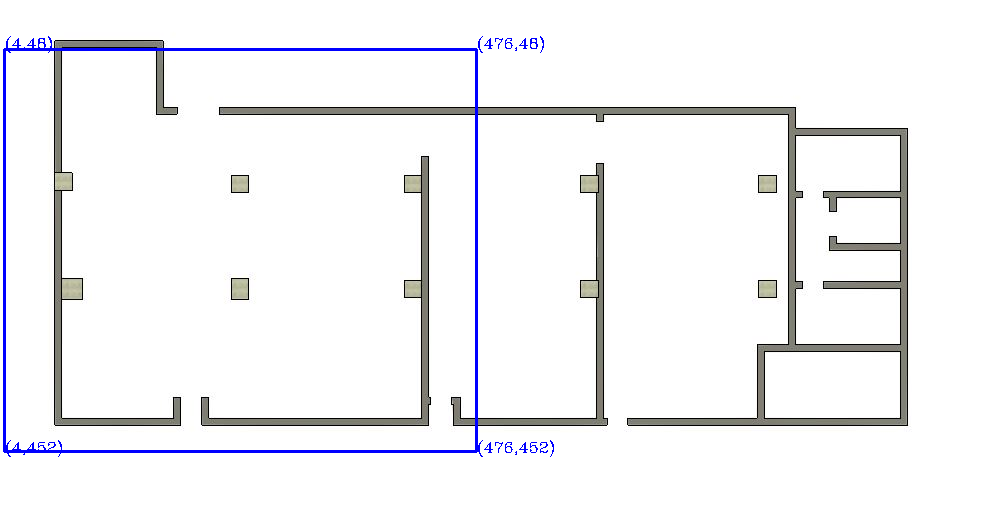

Room_shape Image


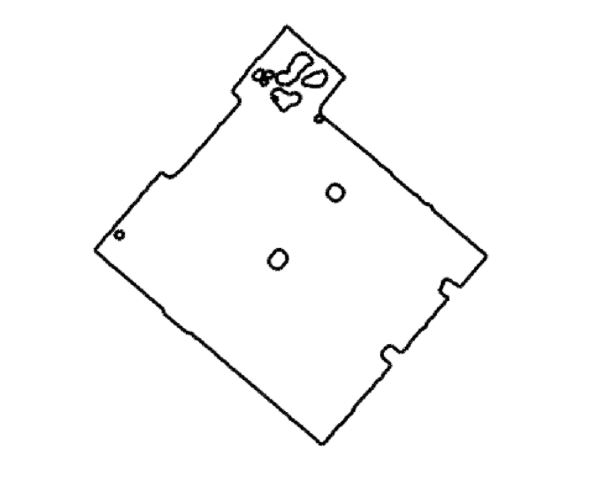


Angle of rotaion: 100 Degree


In [ ]:
room_shape_path = "/content/xy_edge_S4.JPG" # path to shape image
image_path = "/content/floor_plan_rre.JPG" # path to floor image

# Call function
match_shape(room_shape_path, image_path, visualize=False)

**Searching a room shape in a floor plan**

> Input1: Image of floor plan

> Input2: Image of room shape

> Process: Search room shape in the given floor image and return the
coordinates and orientaion of room in the floor image


In [ ]:
# import the necessary packages
import numpy as np
import imutils
import glob
import cv2
from google.colab.patches import cv2_imshow

def rotateImage(image, angle):
    center=tuple(np.array(image.shape[0:2])/2)
    rotate_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    return cv2.warpAffine(image, rotate_mat, image.shape[0:2],flags=cv2.INTER_LINEAR)

def match_shape(room_shape_path, image_path, visualize):

  font = cv2.FONT_HERSHEY_COMPLEX
  # load room shape and convert it to grayscale,
  room_image = cv2.imread(room_shape_path)
  room_shape = cv2.cvtColor(room_image, cv2.COLOR_BGR2GRAY)
  room_shape = cv2.Canny(room_shape, 50, 200)
  (tH, tW) = room_shape.shape[:2]
  #cv2_imshow(room_shape)

  # load the image and convert it to grayscale,
  image = cv2.imread(image_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  match_found = None
  angle_jump=5
  angle=0
  flip_=0

  print("Processing...")
  for flip in range(3):

    for angl in range(angle_jump,360,angle_jump):

      # loop over the different scales of the image
      for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        # resize the image according to the scale, and keep track of the ratio of the resizing
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])
        # if the resized image is smaller than the room_shape, then break from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
          break

        # detect edges in the resized, grayscale image and apply matchTemplate to find the room_shape in the image
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, room_shape, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        # check to see all the iteration (optional)
        ############################
        if visualize==True:
          # draw a bounding box around the detected region
          clone = np.dstack([edged, edged, edged])
          cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
            (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
          cv2_imshow(clone)
          cv2.waitKey(0)
        ###############################

        # if we have found a new maximum correlation value, then update the match_found variable
        if match_found is None or maxVal > match_found[0]:
          match_found = (maxVal, maxLoc, r)
          angle = angl-angle_jump
          flip_ = flip

      # rotate through all angles
      room_shape = rotateImage(room_image,angl)
      room_shape = cv2.cvtColor(room_shape, cv2.COLOR_BGR2GRAY)
      room_shape = cv2.Canny(room_shape, 50, 200)
      (tH, tW) = room_shape.shape[:2]
      #cv2_imshow(room_shape)

    # Flip horizontal and vertical
    if flip==2:
      break
    room_image = cv2.flip(cv2.imread(room_shape_path), flip)
    room_shape = cv2.cvtColor(room_image, cv2.COLOR_BGR2GRAY)
    room_shape = cv2.Canny(room_shape, 50, 200)
    (tH, tW) = room_shape.shape[:2]
    #cv2_imshow(room_shape)

  # unpack the match_found variable and compute the (x, y) coordinates of the bounding box based on the resized ratio
  (_, maxLoc, r) = match_found
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  # draw a bounding box around the detected result and display the image
  cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)

  coordinates = []  # list of the blue rectangle coordinates
  blue_color = [255, 0, 0]
  last_x_blue, last_y_blue = 0, 0  # store the last x and y blue positions
  # reads the image in the color mode
  rows, cols, _ = image.shape  # gets the image's rows and color, which are height and width
  for x in range(rows):
      for y in range(cols):
        px = list(image[x, y])
        if px == blue_color:
            # find the first coordinate of the blue rectangle (top left corner)
            if len(coordinates) == 0:
                coordinates.append((y, x))  # top left corner of the blue rectangle
            last_x_blue, last_y_blue = x, y
  coordinates.append((last_y_blue, last_x_blue))

  # Now we have the top left corner and the bottom right corner of the green rectangle
  #print(coordinates)
  # coordinates: [(x1, y1), (x2, y2)] # top_left # bottom_left # top_right # bottom_right

  coordinates_all = [coordinates[0],(coordinates[0][0],coordinates[1][1]),(coordinates[1][0],coordinates[0][1]),coordinates[1]]
  for i in range(4):
      string = '('+ str(coordinates_all[i][0]) + "," + str(coordinates_all[i][1]) +')'
      cv2.putText(image, string, (coordinates_all[i][0],coordinates_all[i][1]),font,0.5,(255, 0, 0))

  print("Done!")
  cv2_imshow(image)
  print("Room_shape Image")
  cv2_imshow(cv2.imread(room_shape_path))
  cv2.waitKey(0)
  print()
  print("Transformation:")
  if flip_==0:
    print("No Flip")
  elif flip_==1:
    print("Vertical Flip")
  else:
    print("Horizontal Flip")
  print("Angle of rotaion:",angle, "Degree")

Processing...
Done!


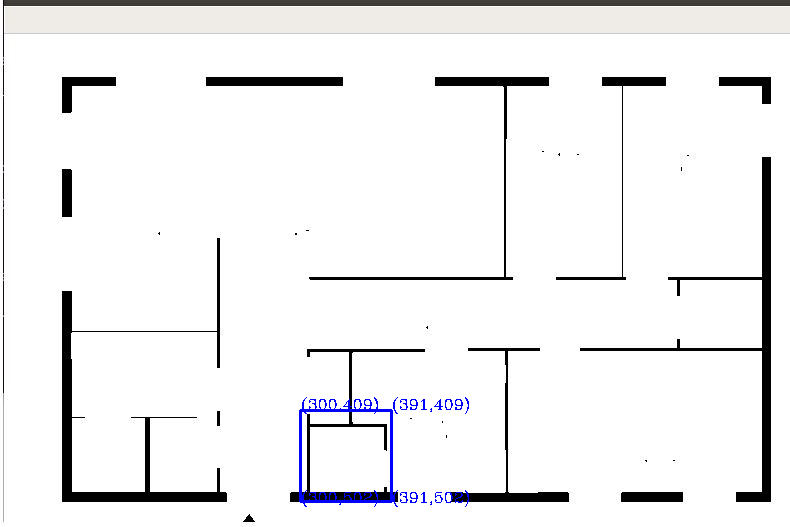

Room_shape Image


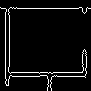


Transformation:
Vertical Flip
Angle of rotaion: 0 Degree


In [ ]:
room_shape_path = "/content/check0.png" # path to shape image
image_path = "/content/f2.JPG" # path to floor image

# Call function
match_shape(room_shape_path, image_path, visualize=False)

Processing...
Done!


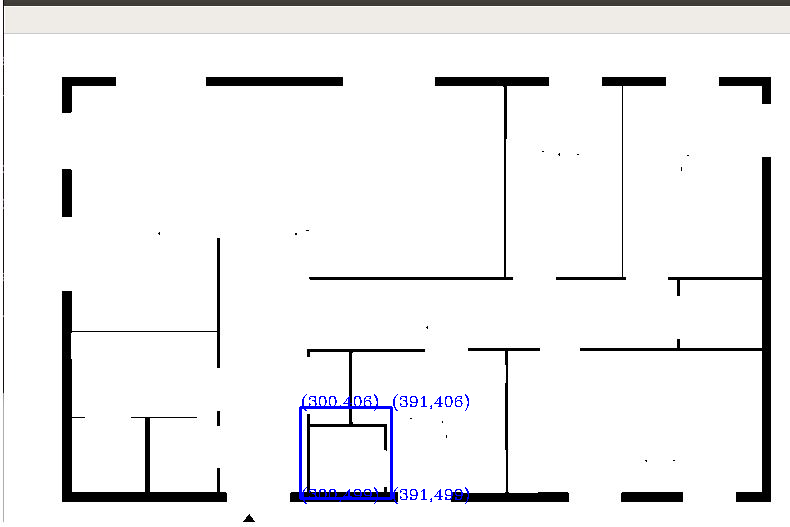

Room_shape Image


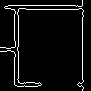


Transformation:
Horizontal Flip
Angle of rotaion: 90 Degree


In [ ]:
room_shape_path = "/content/check6.png" # path to shape image
image_path = "/content/f2.JPG" # path to floor image

# Call function
match_shape(room_shape_path, image_path, visualize=False)

Processing...
Done!


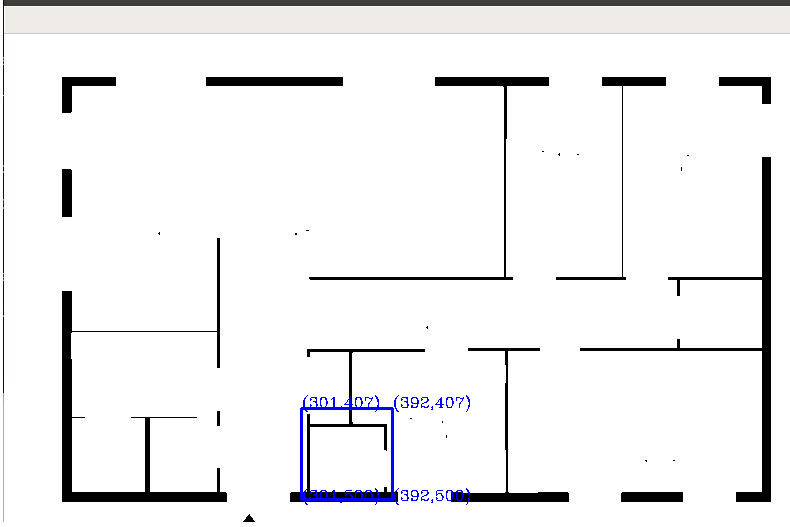

Room_shape Image


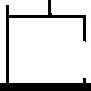


Transformation:
No Flip
Angle of rotaion: 0 Degree


In [ ]:
room_shape_path = "/content/r1.jpg" # path to shape image
image_path = "/content/f2.JPG" # path to floor image

# Call function
match_shape(room_shape_path, image_path, visualize=False)

Processing...


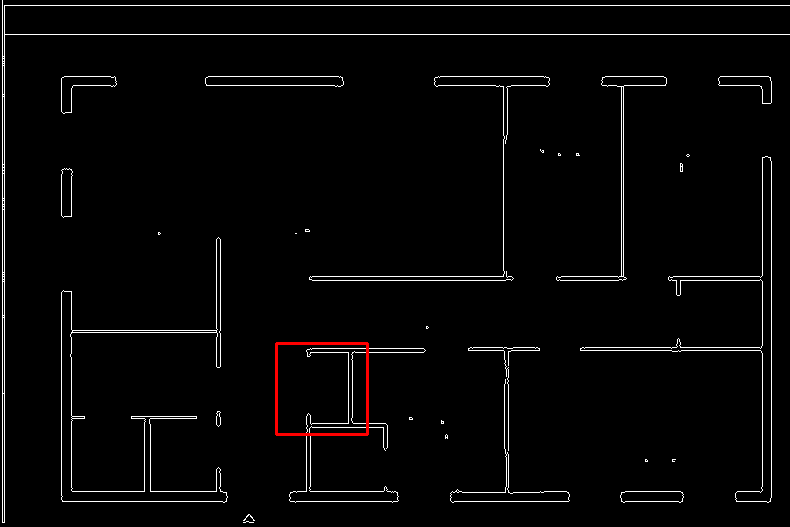

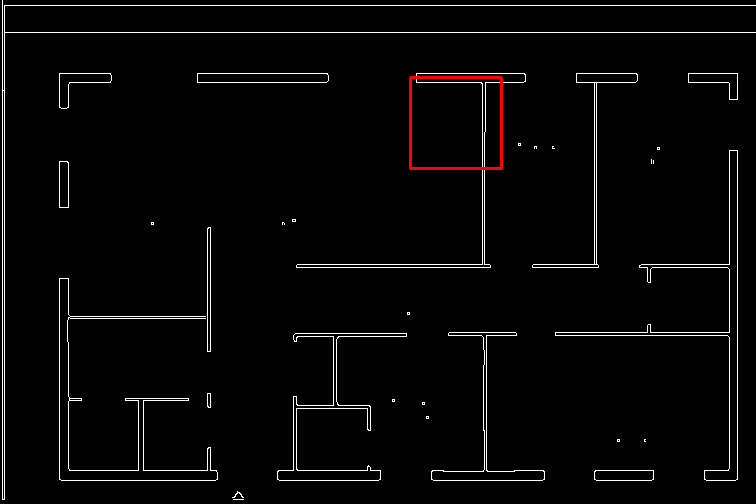

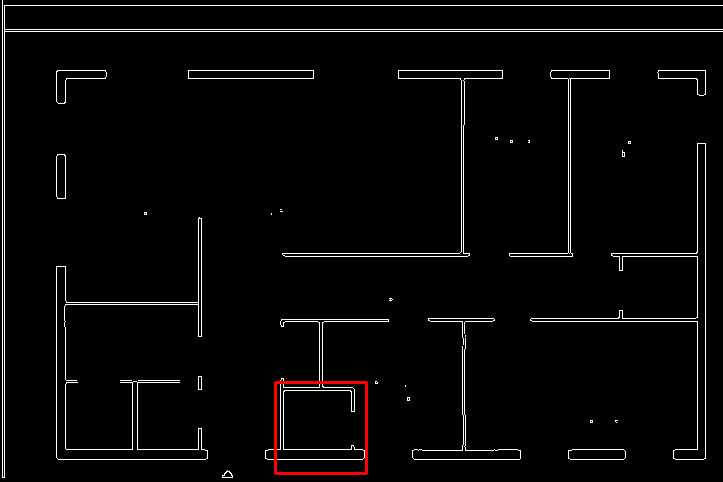

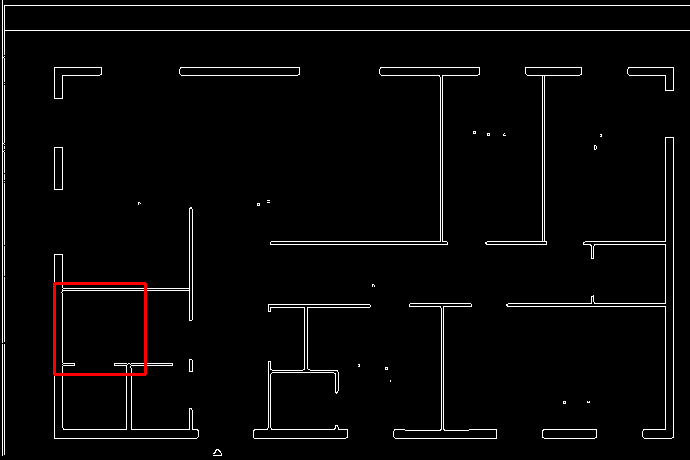

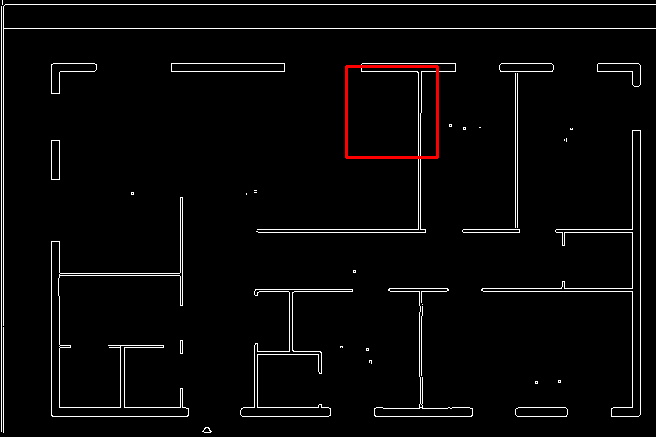

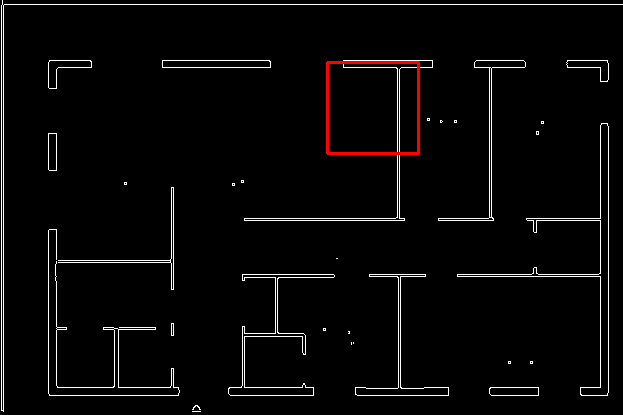

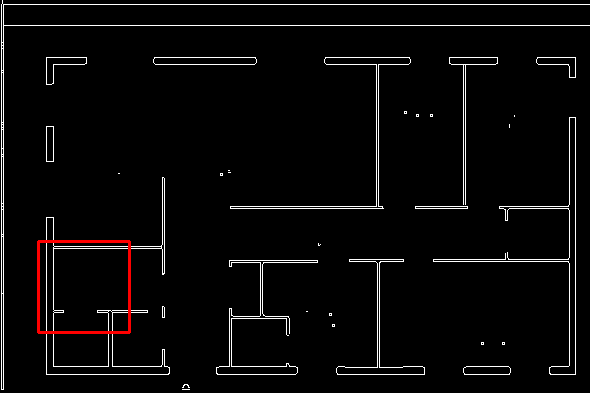

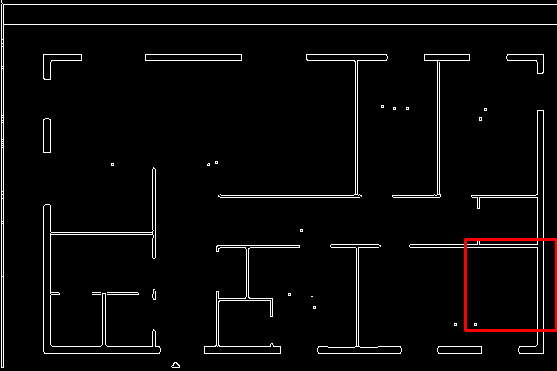

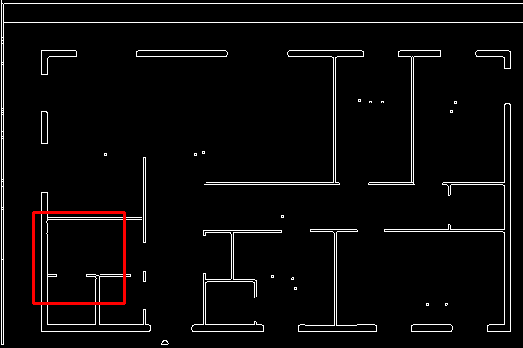

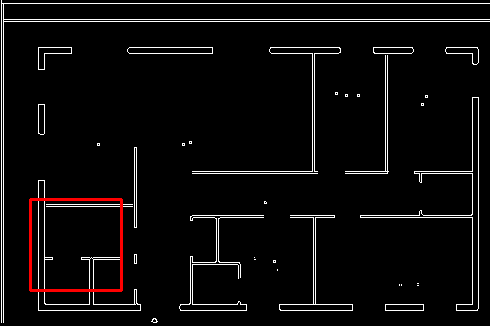

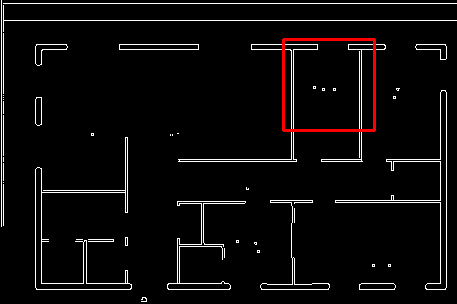

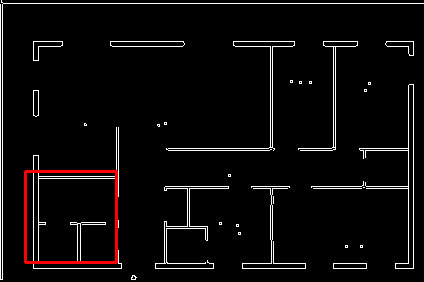

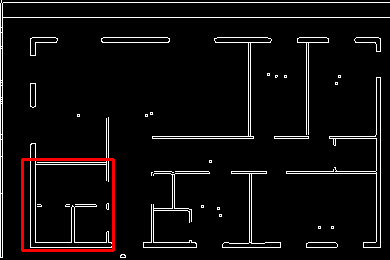

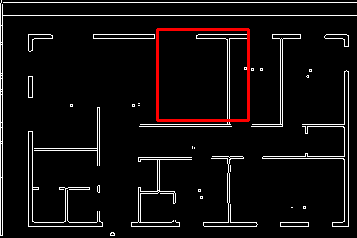

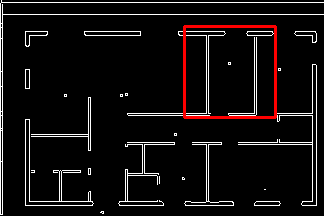

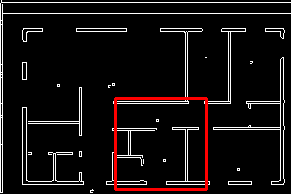

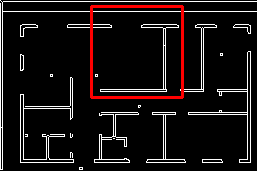

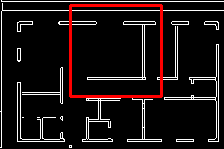

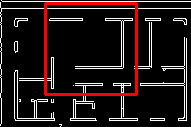

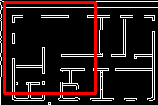

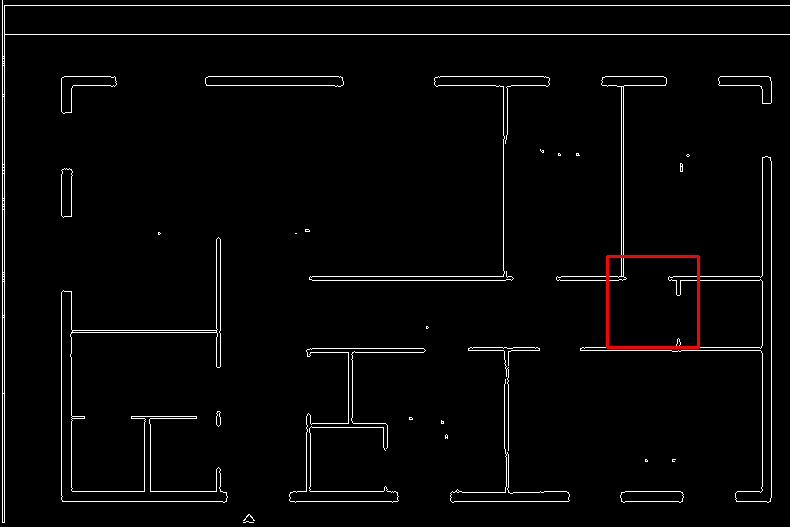

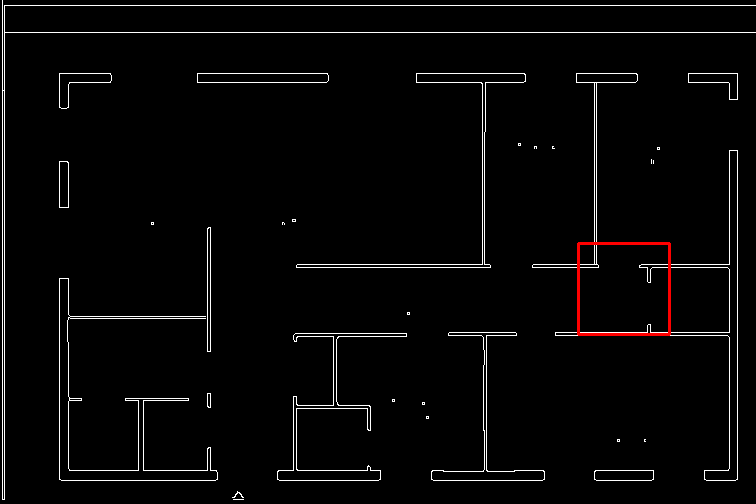

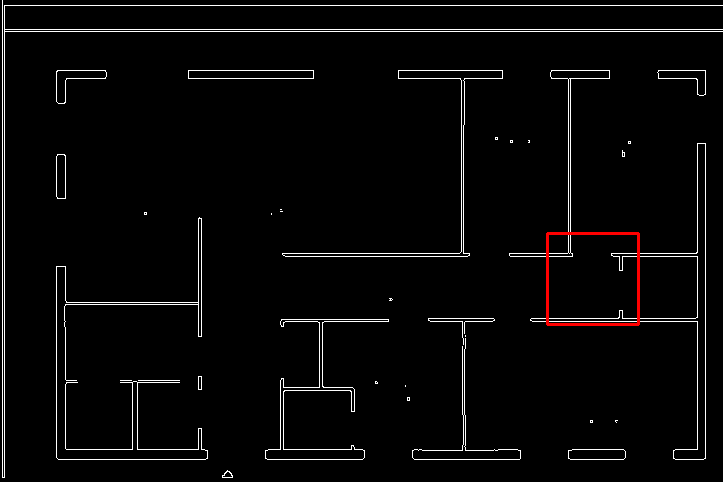

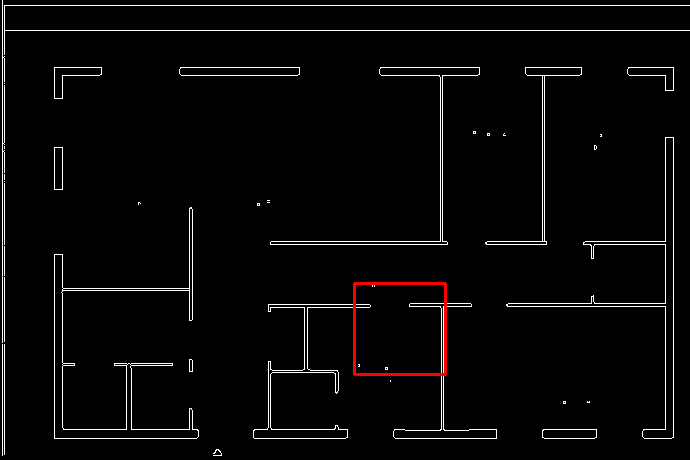

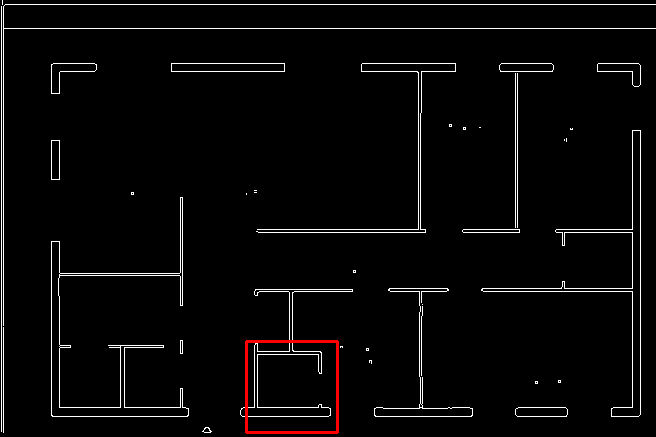

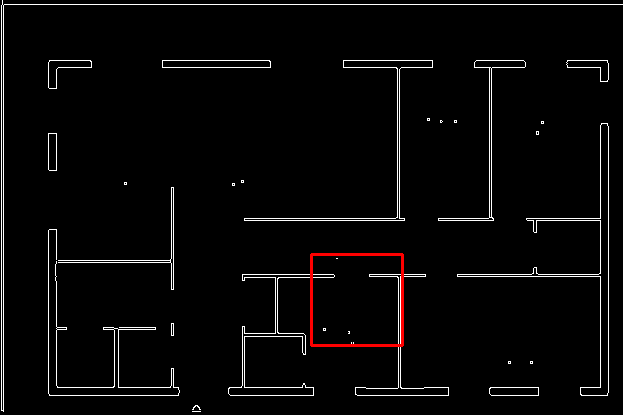

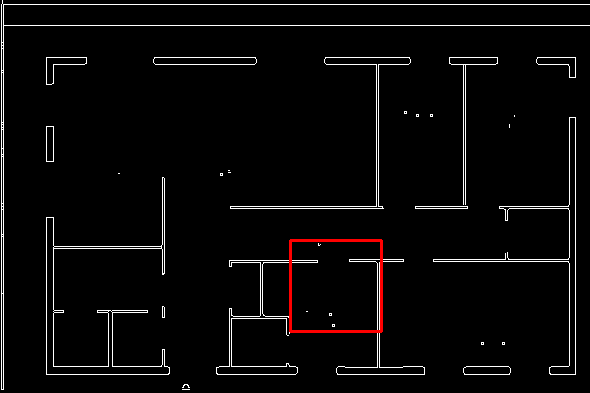

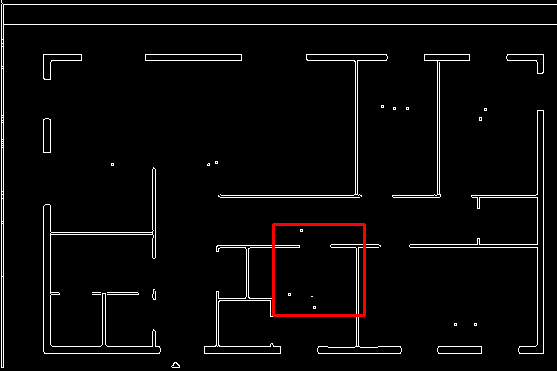

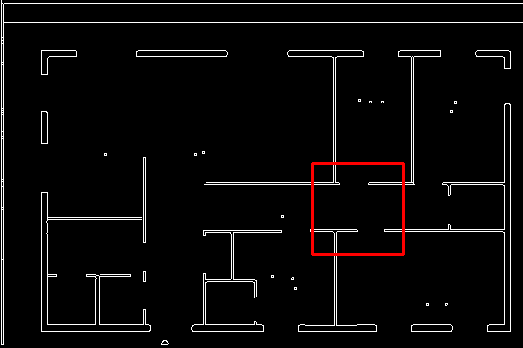

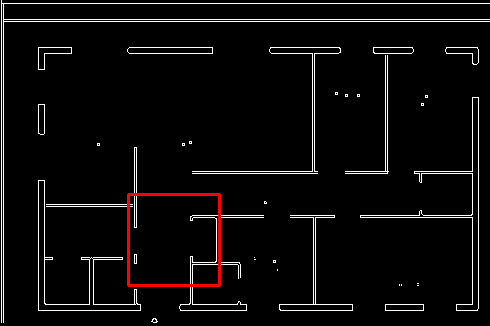

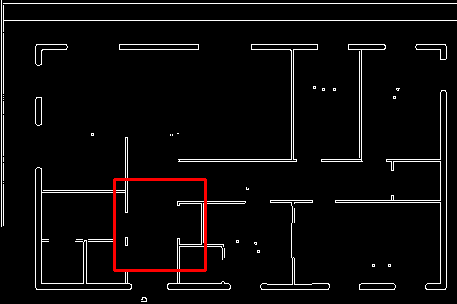

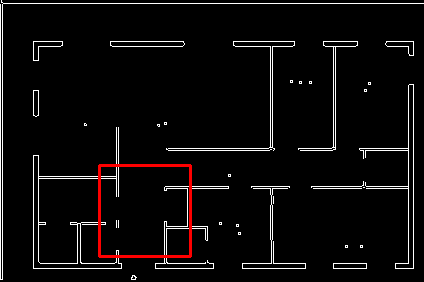

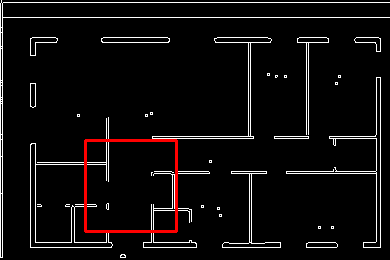

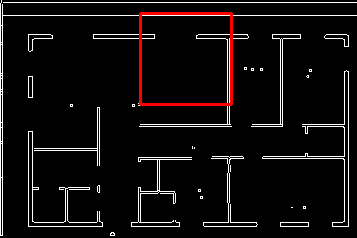

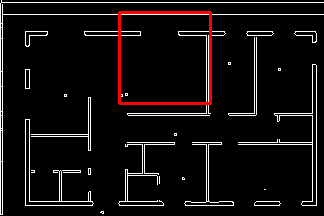

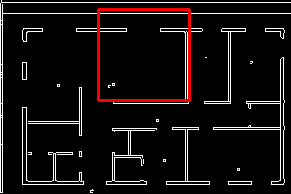

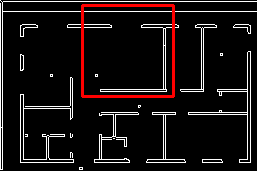

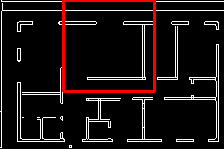

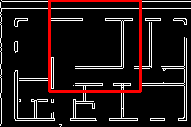

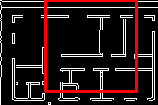

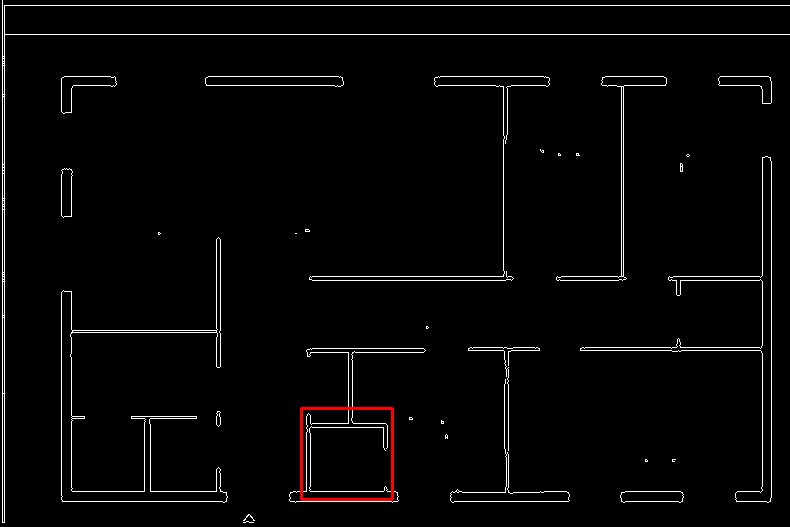

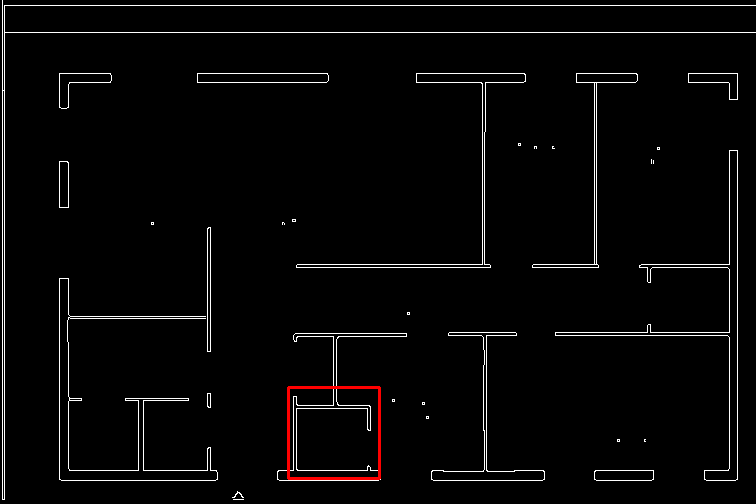

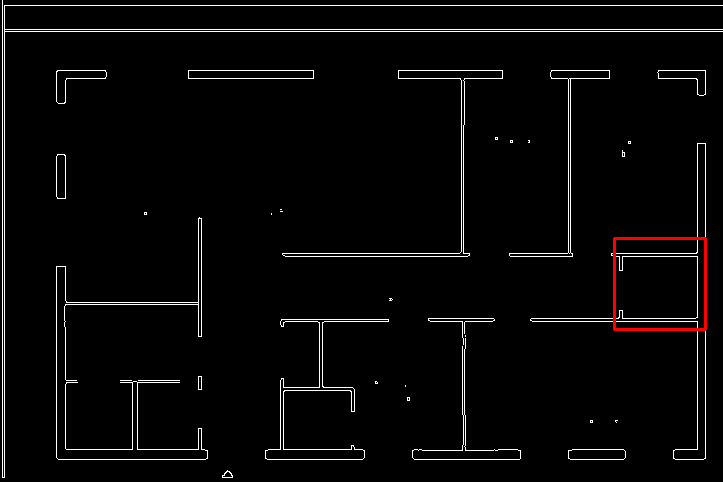

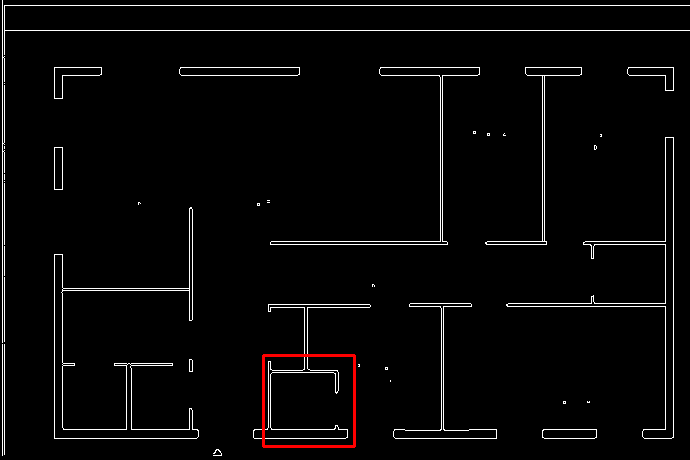

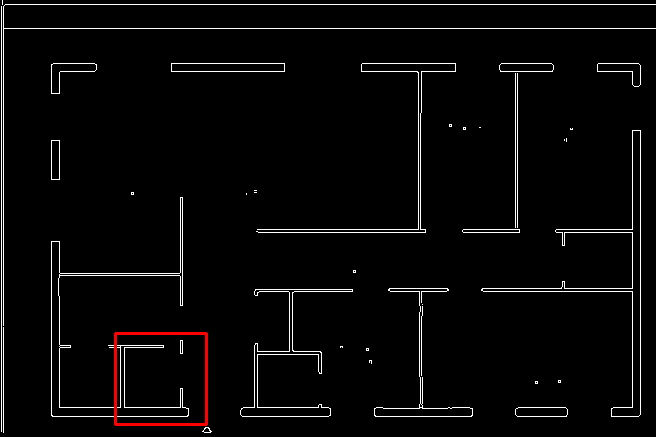

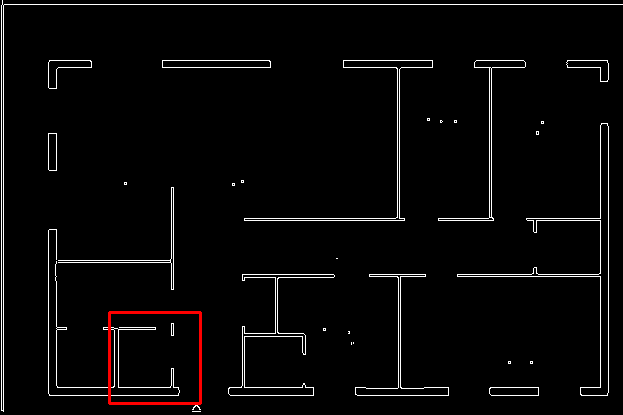

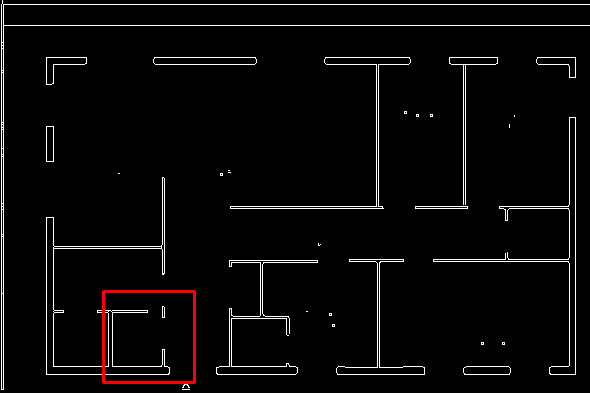

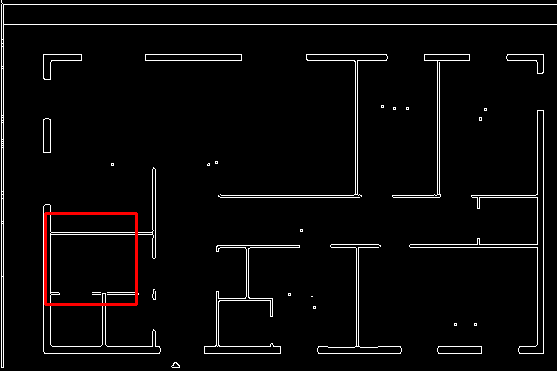

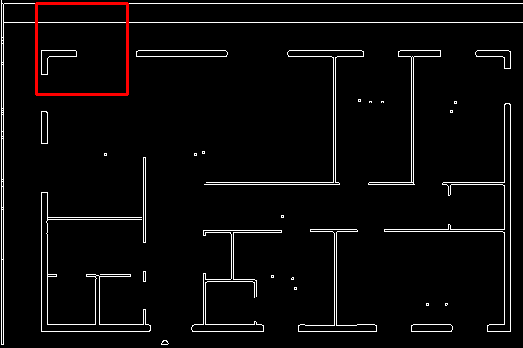

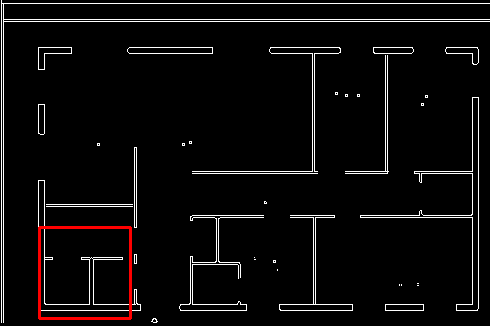

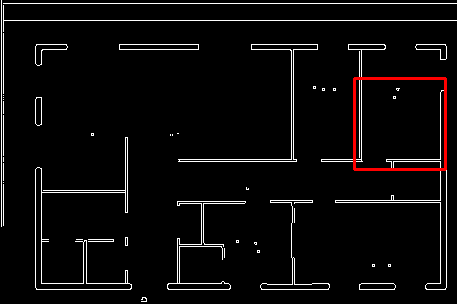

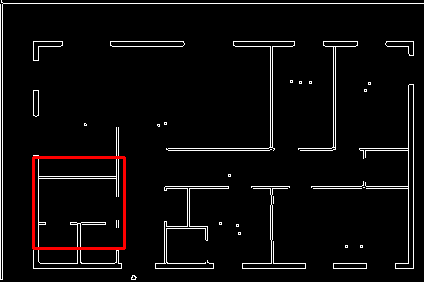

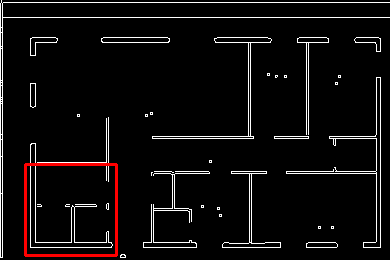

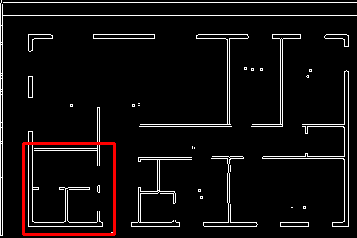

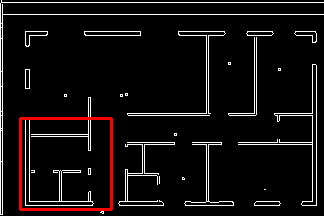

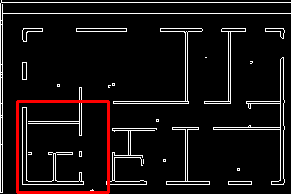

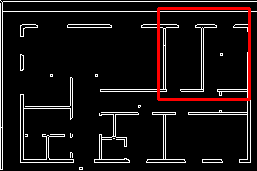

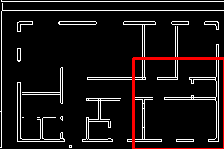

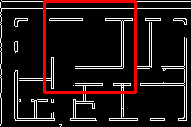

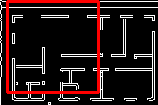

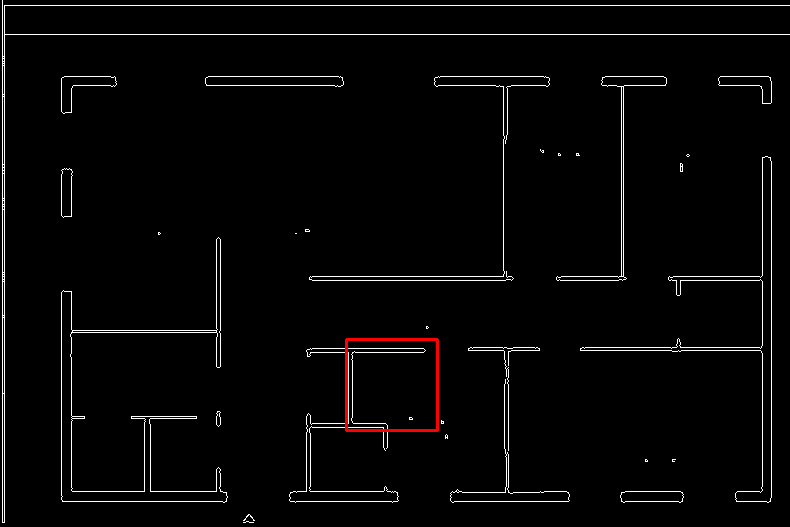

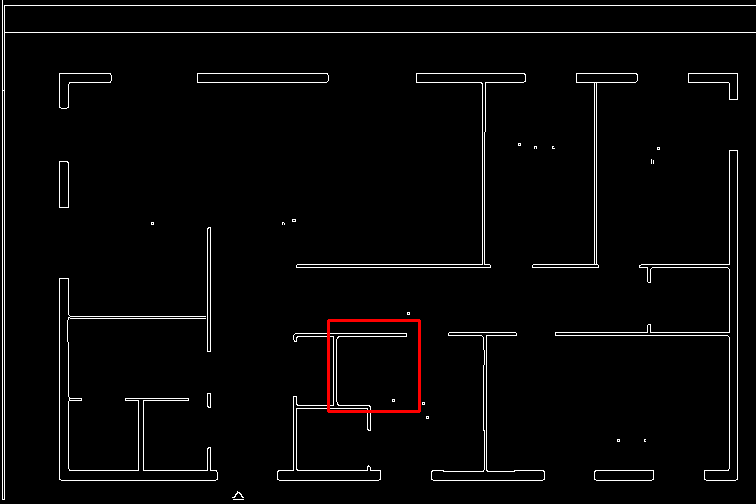

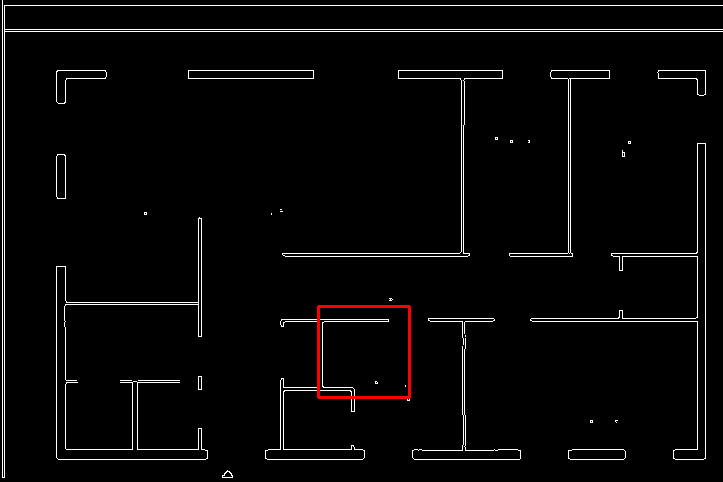

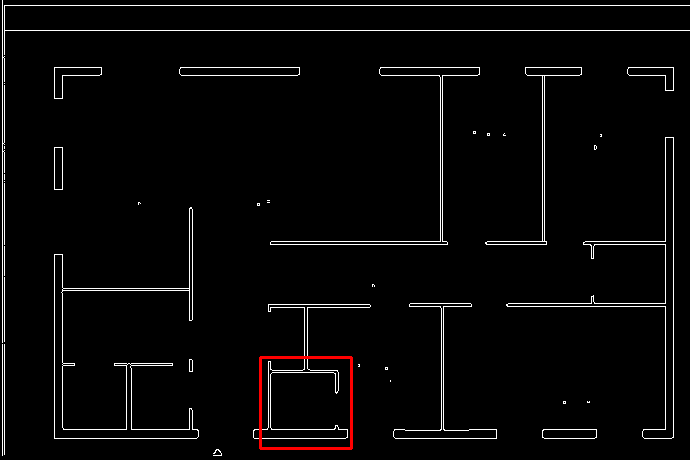

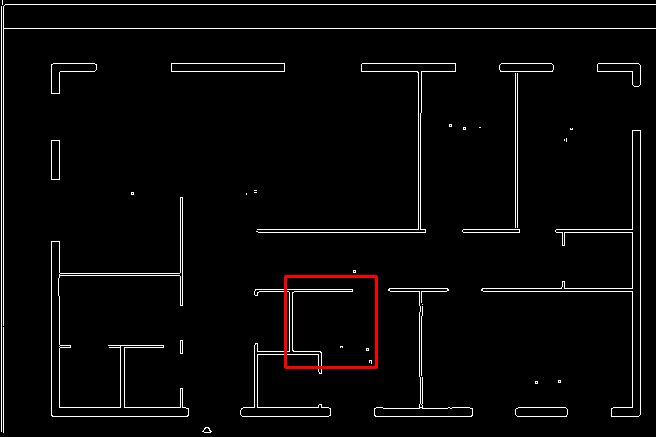

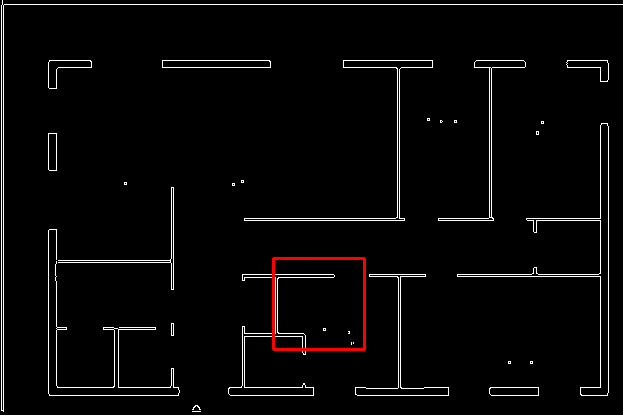

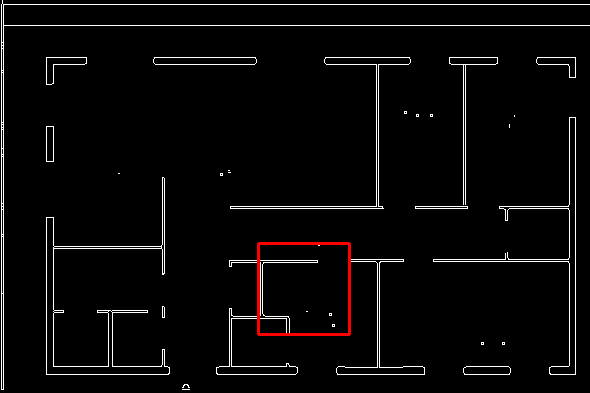

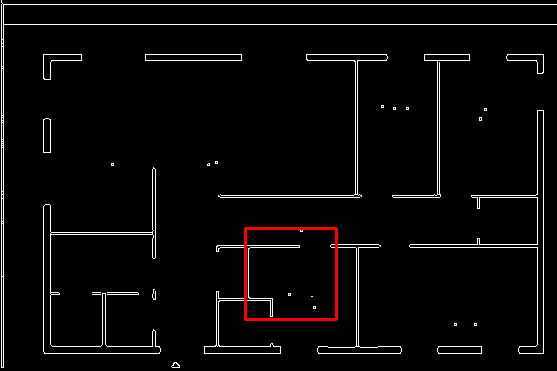

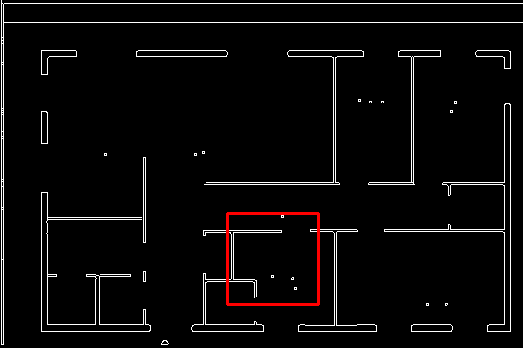

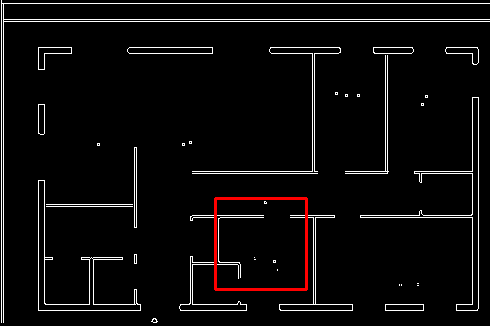

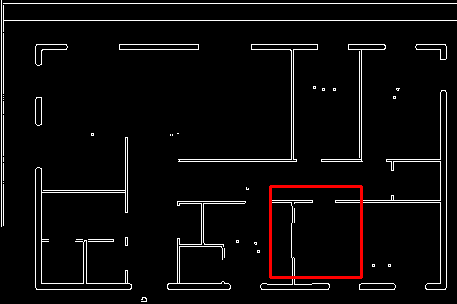

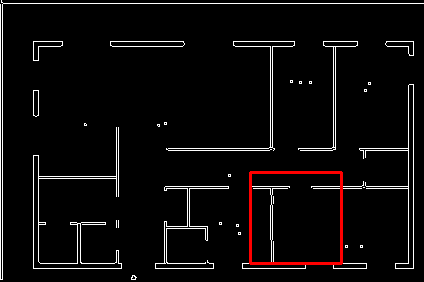

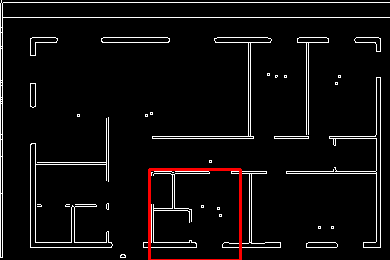

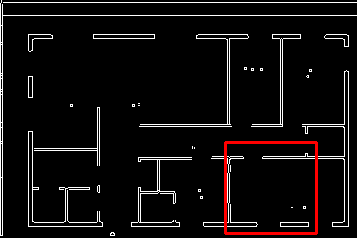

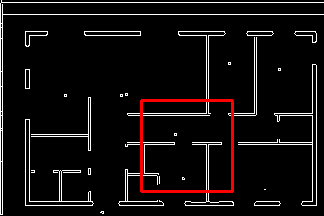

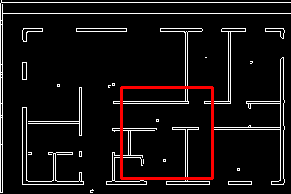

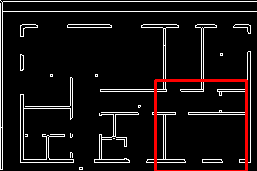

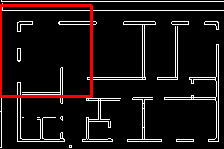

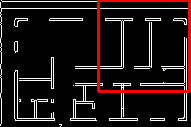

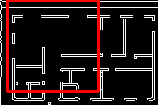

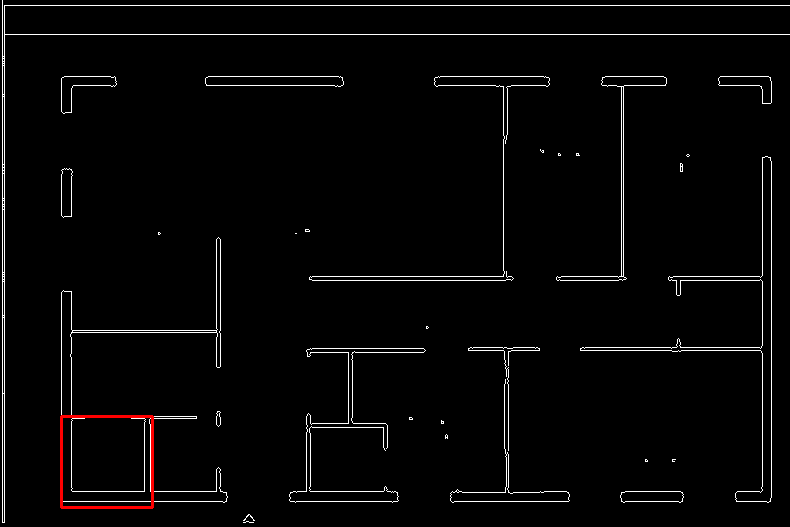

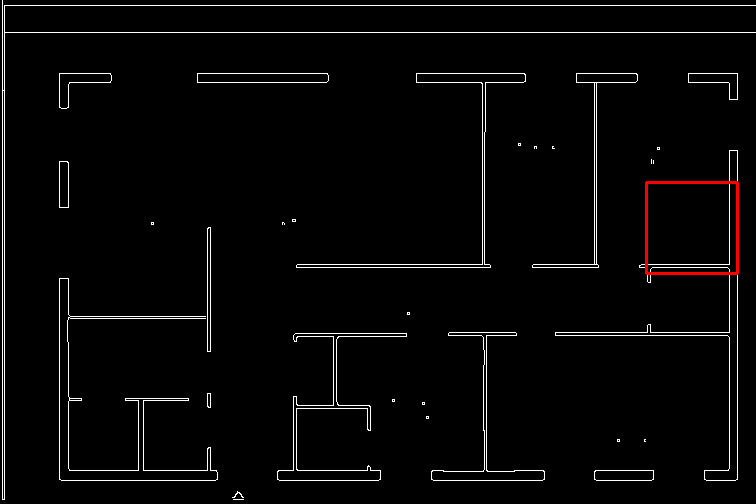

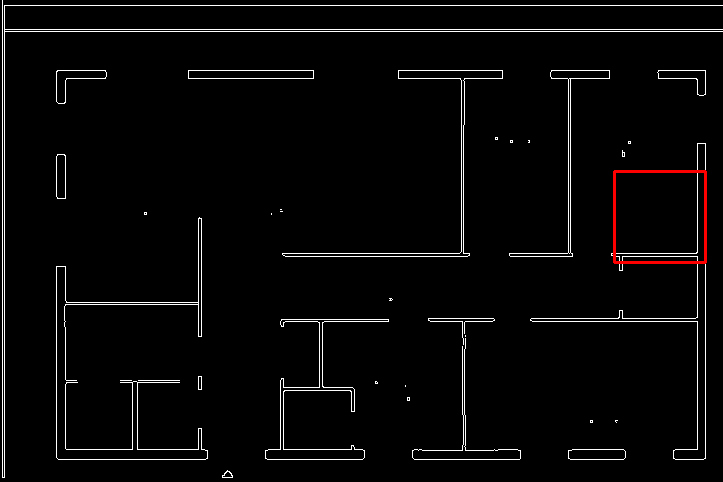

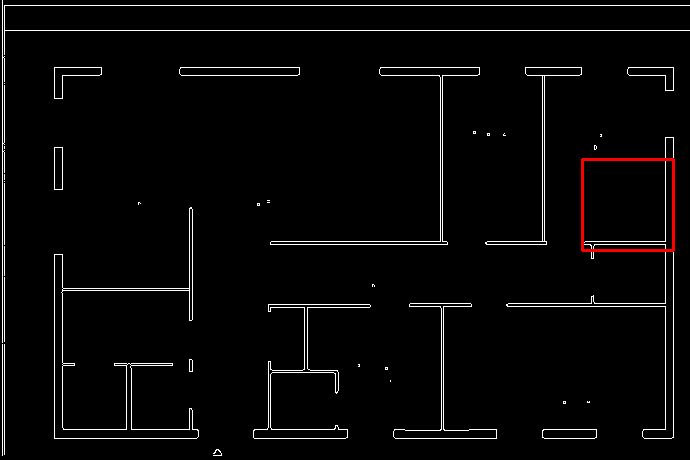

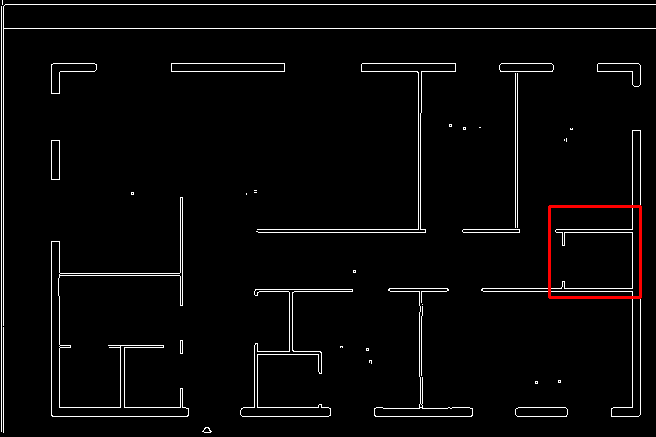

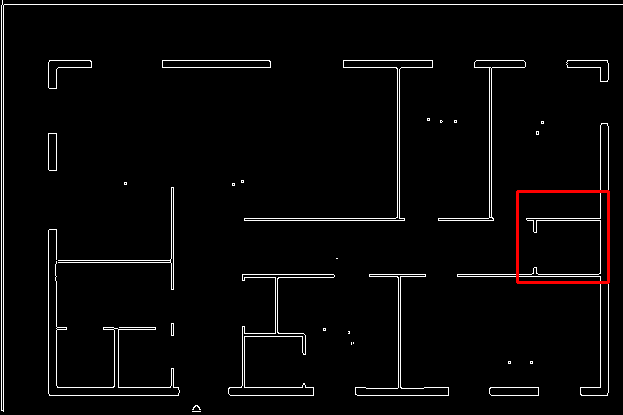

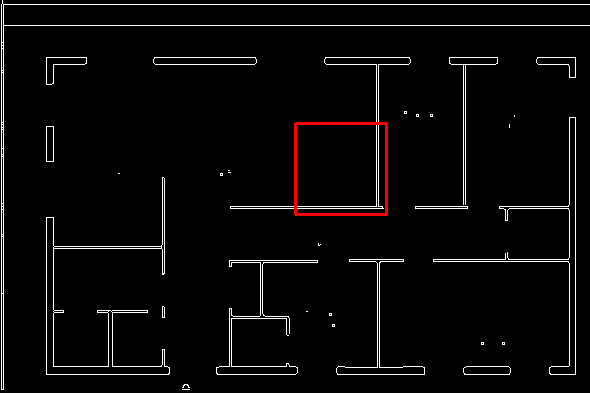

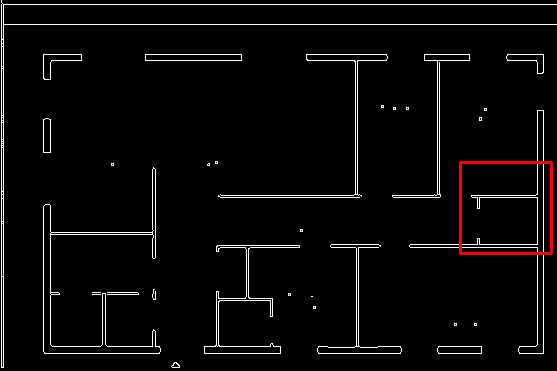

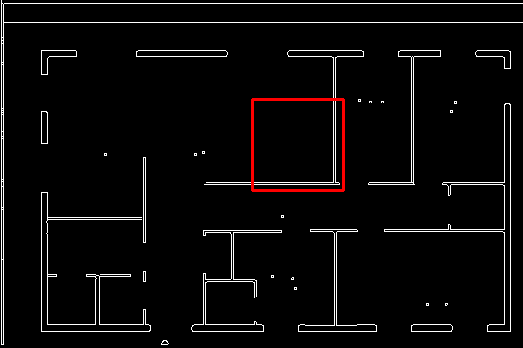

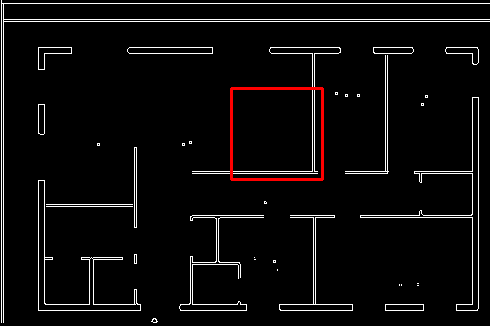

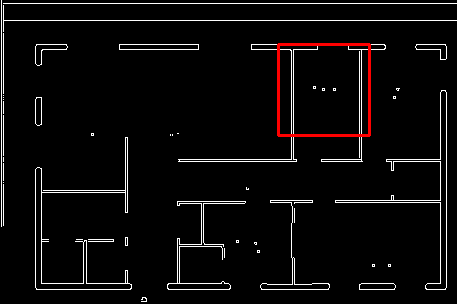

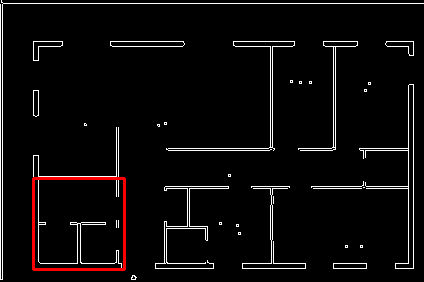

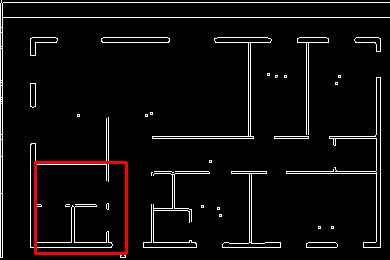

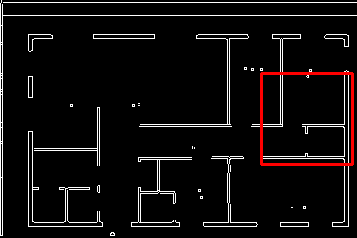

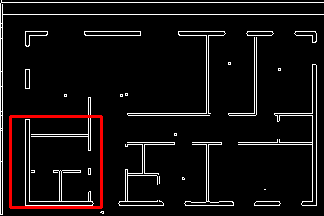

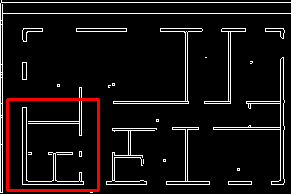

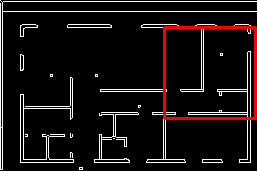

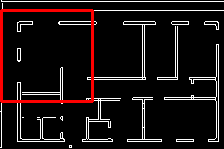

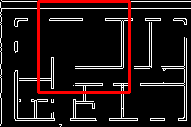

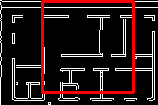

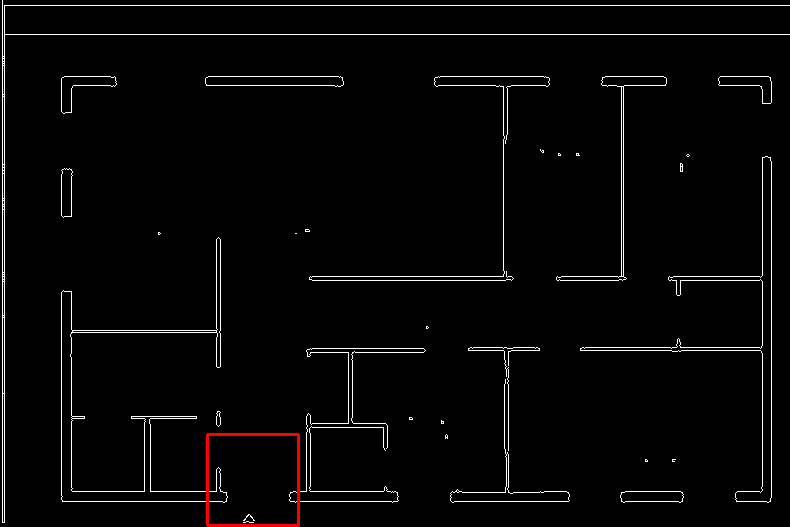

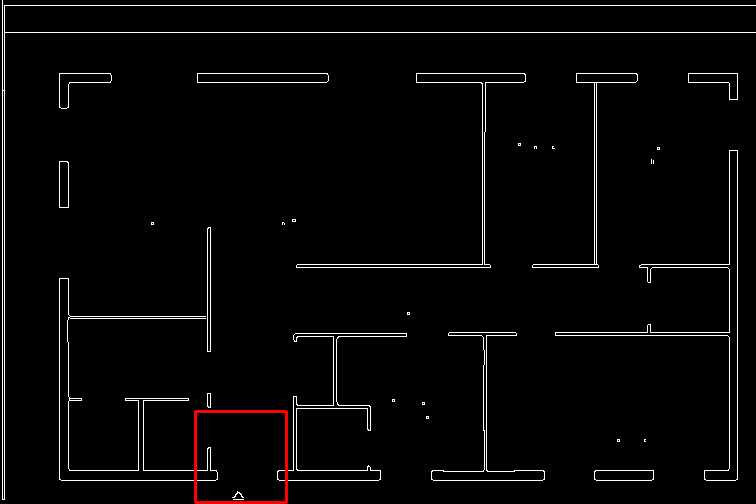

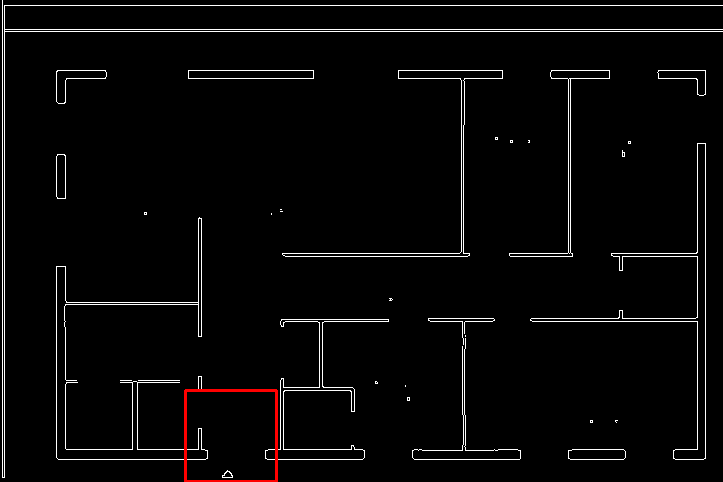

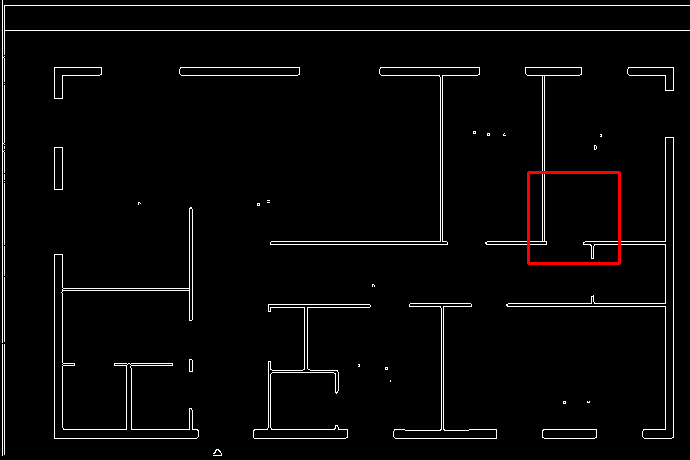

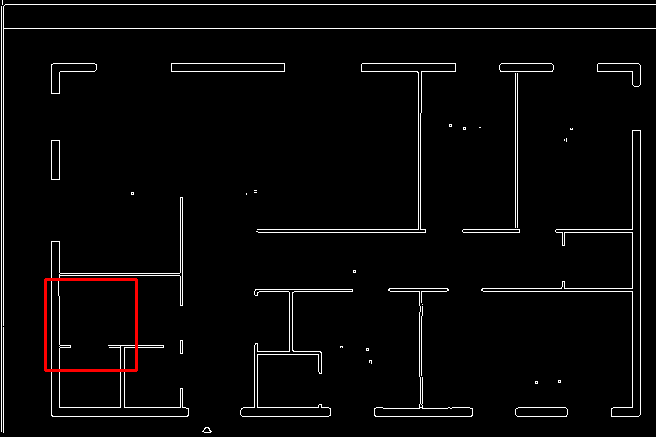

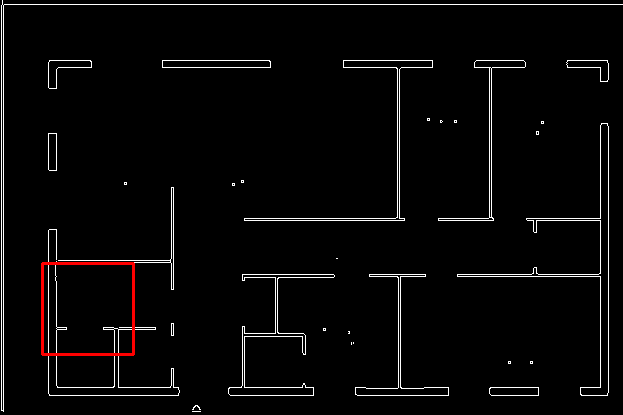

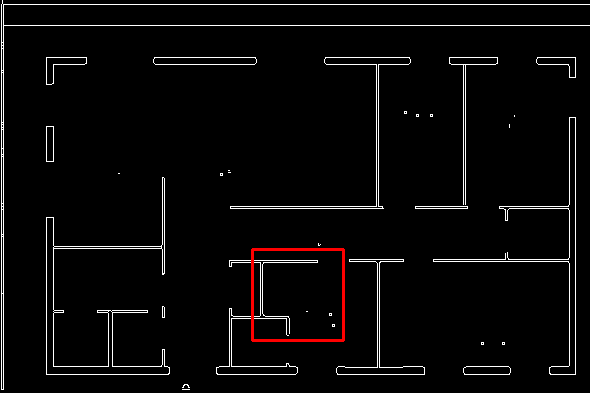

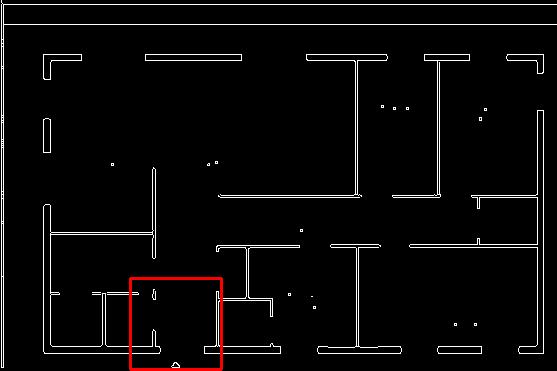

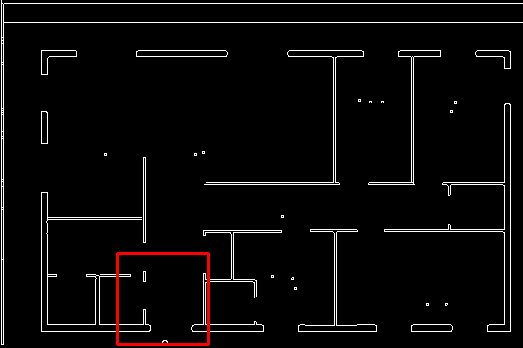

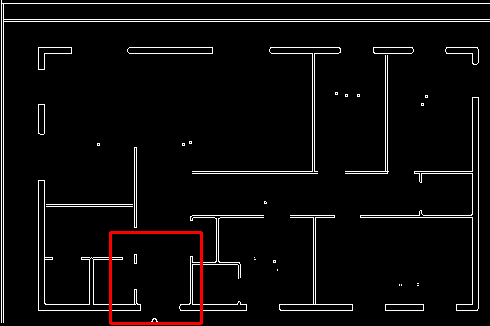

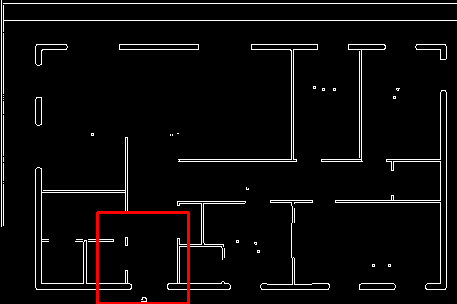

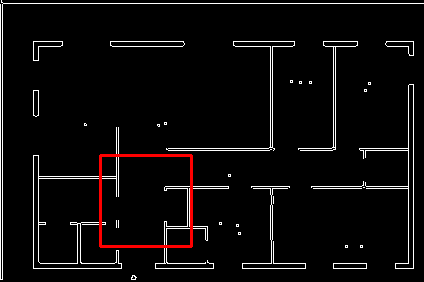

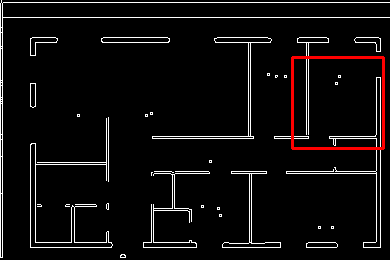

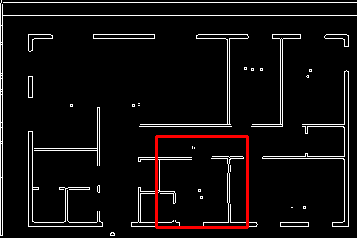

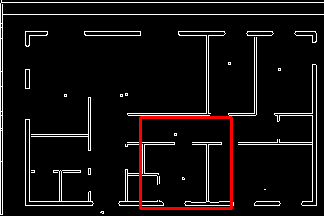

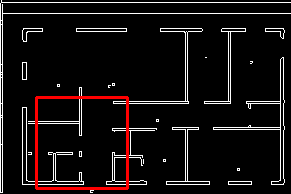

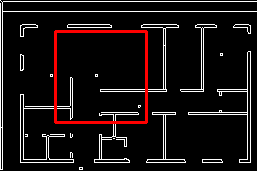

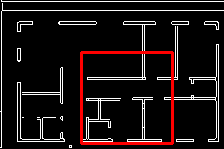

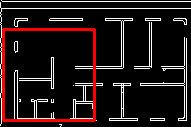

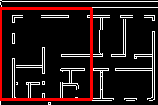

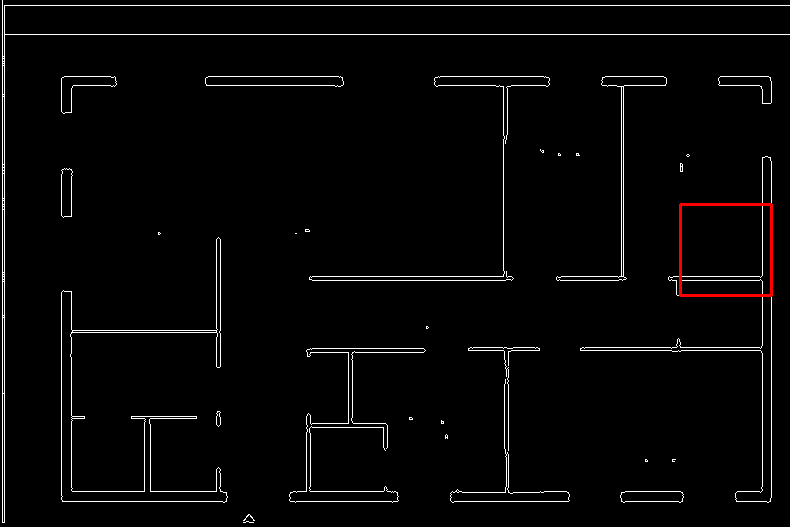

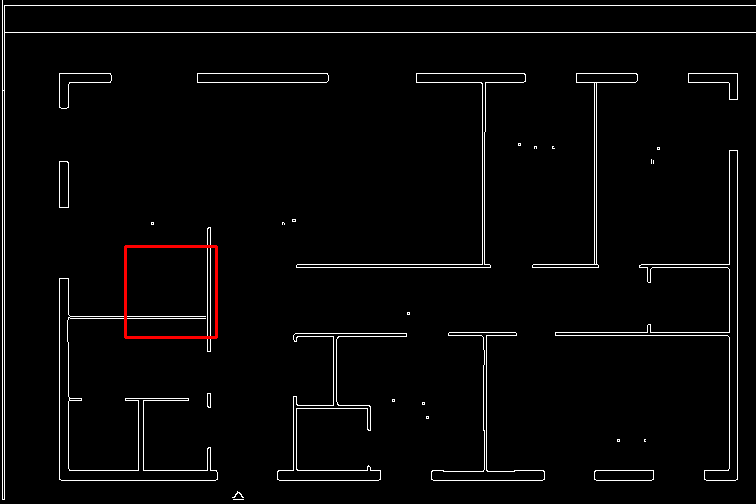

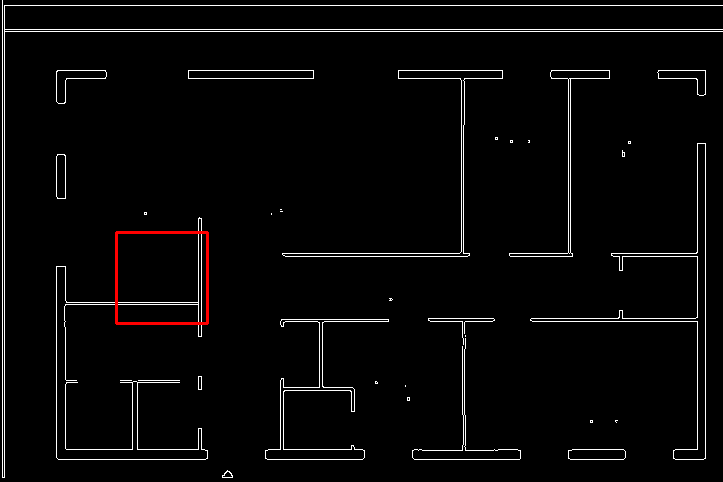

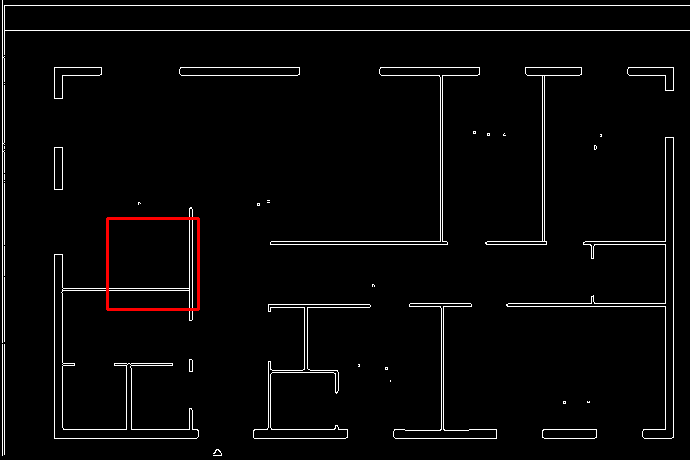

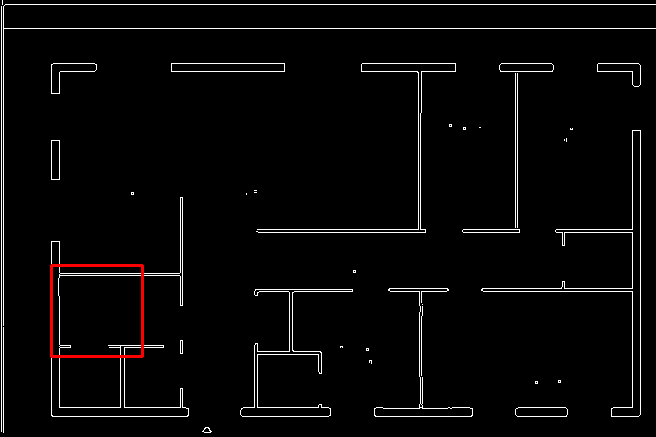

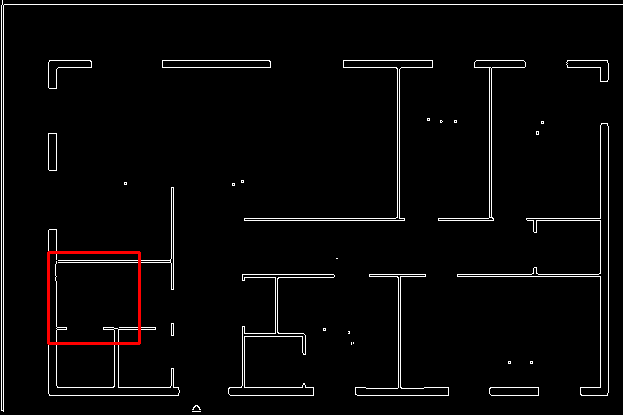

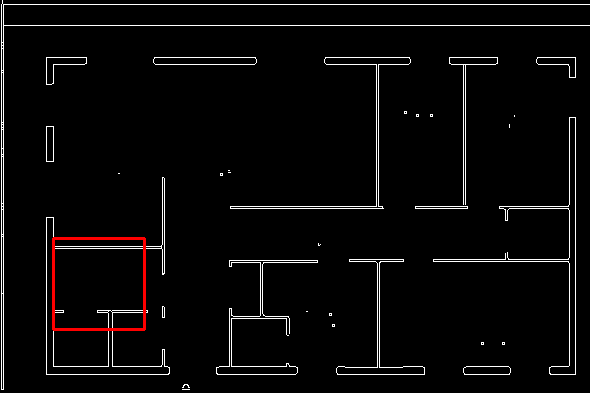

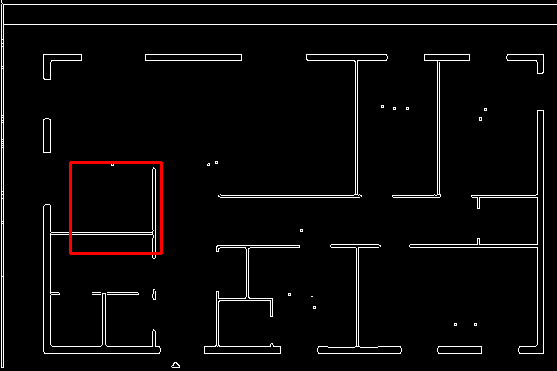

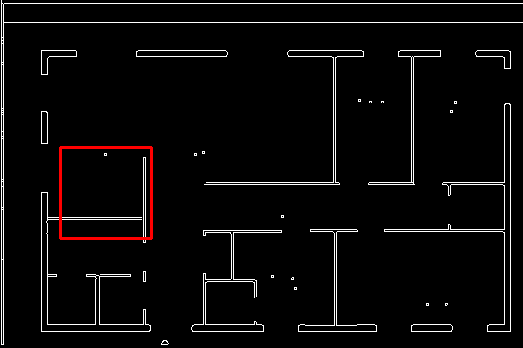

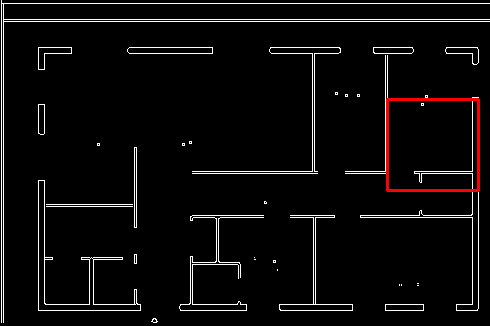

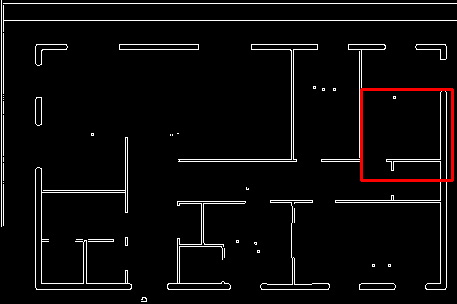

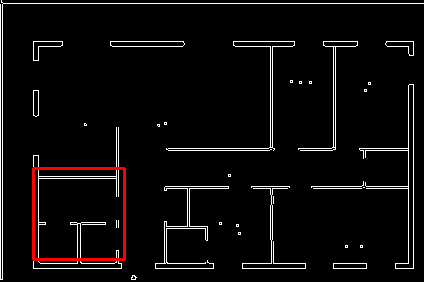

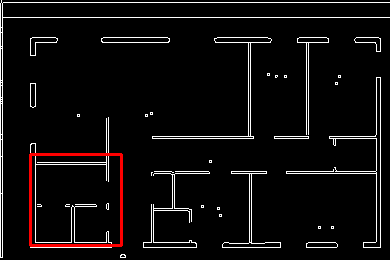

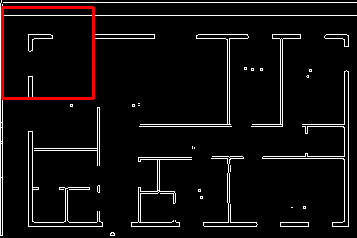

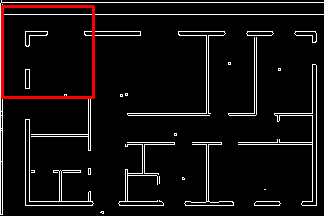

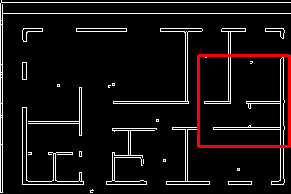

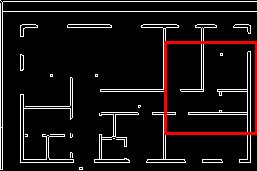

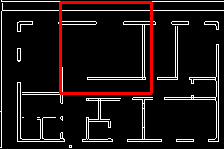

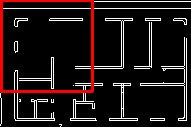

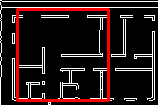

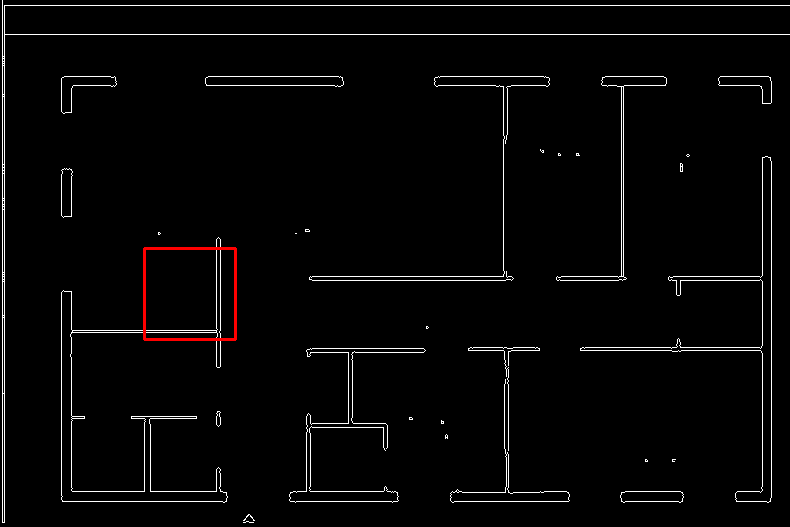

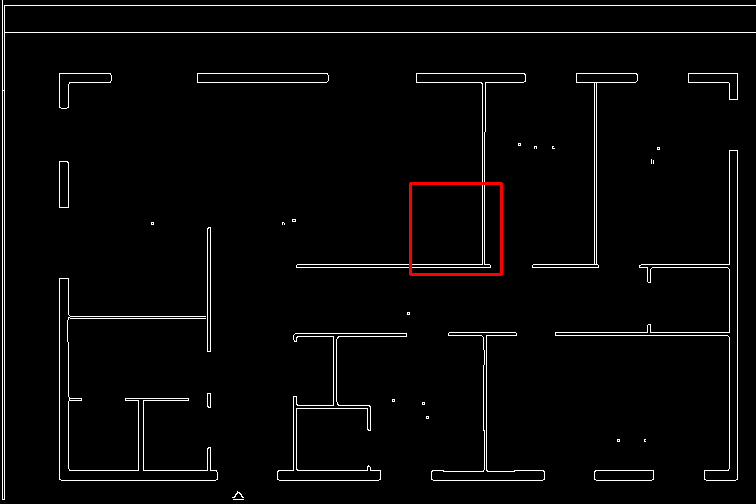

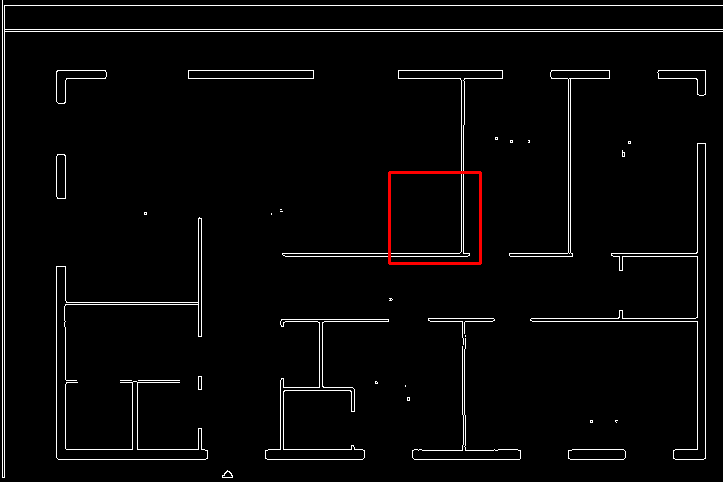

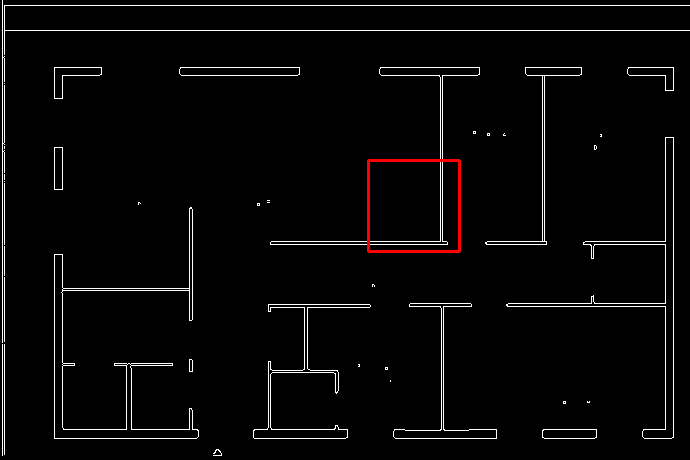

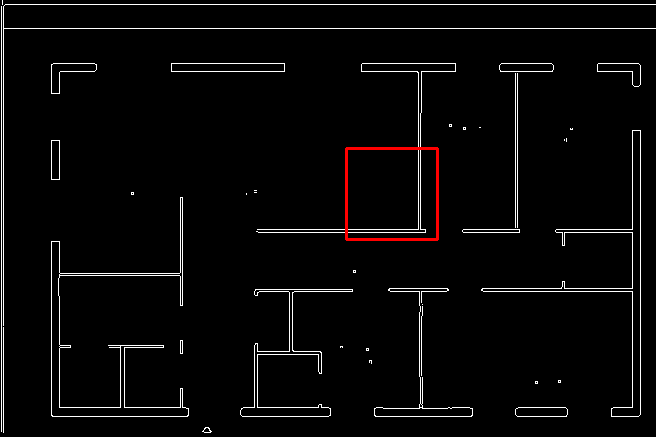

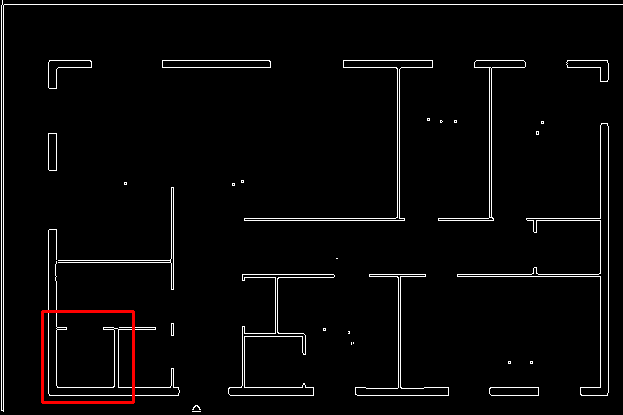

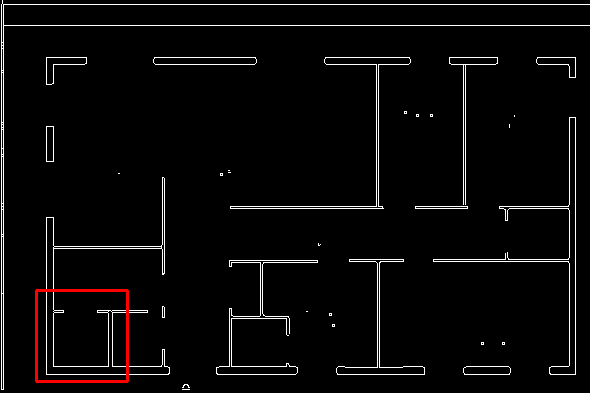

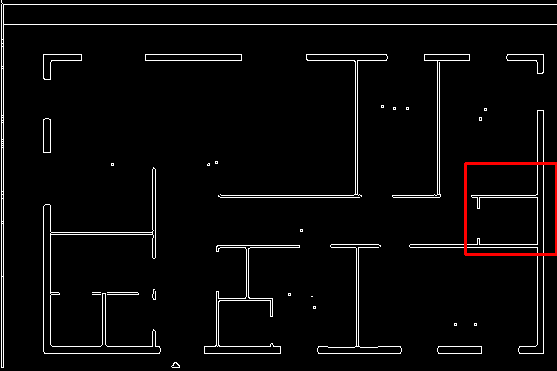

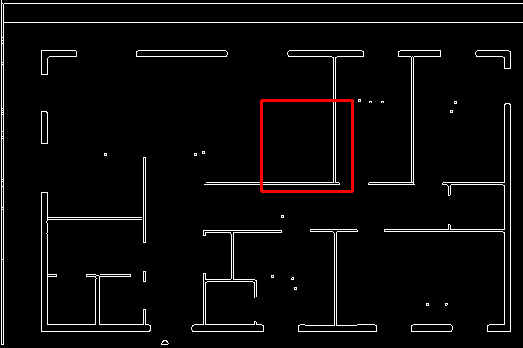

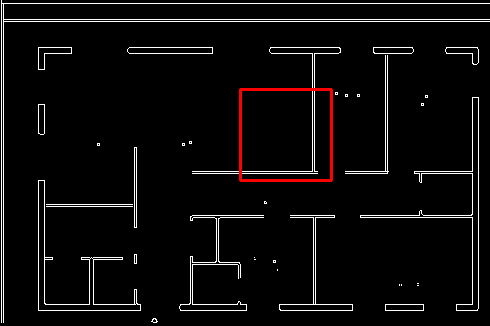

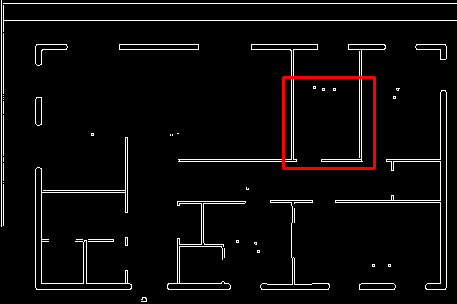

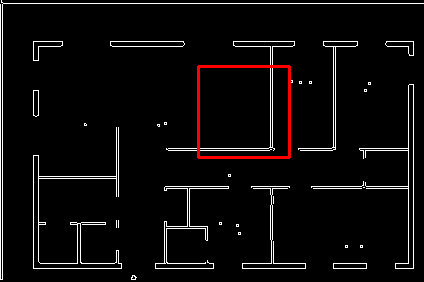

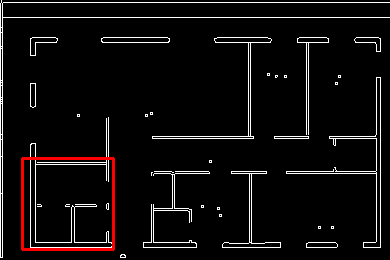

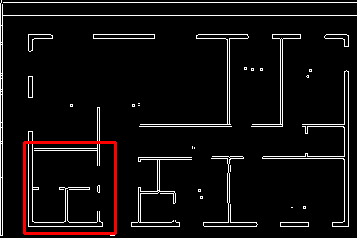

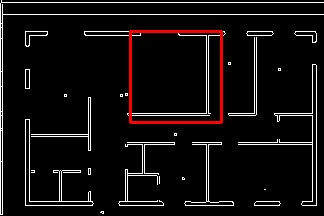

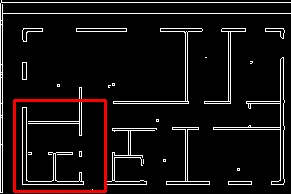

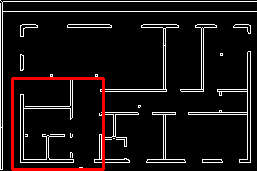

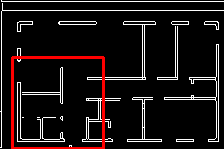

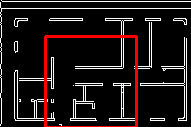

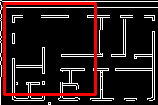

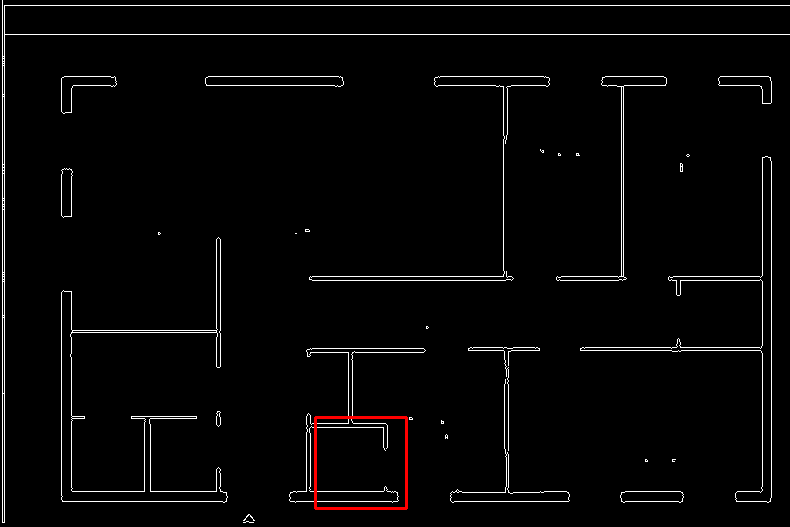

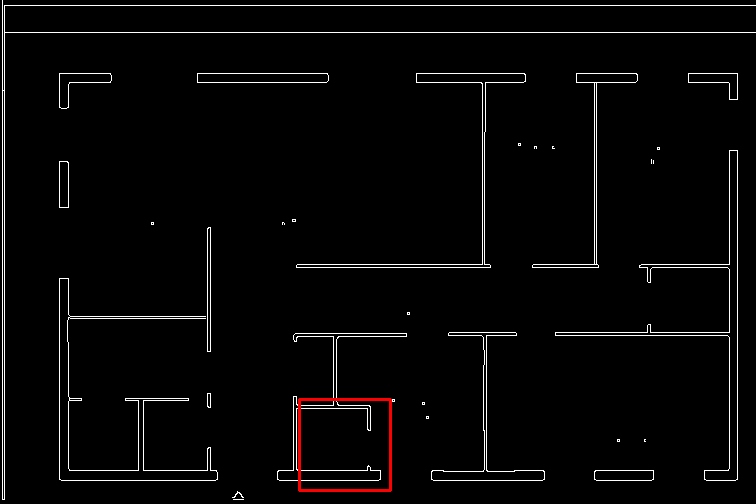

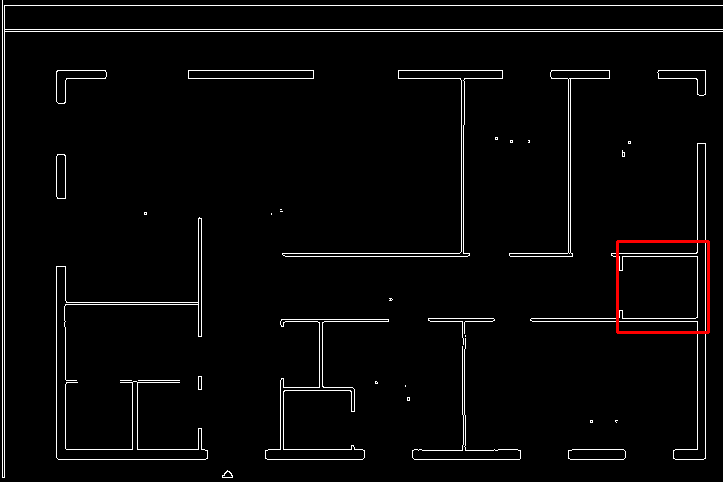

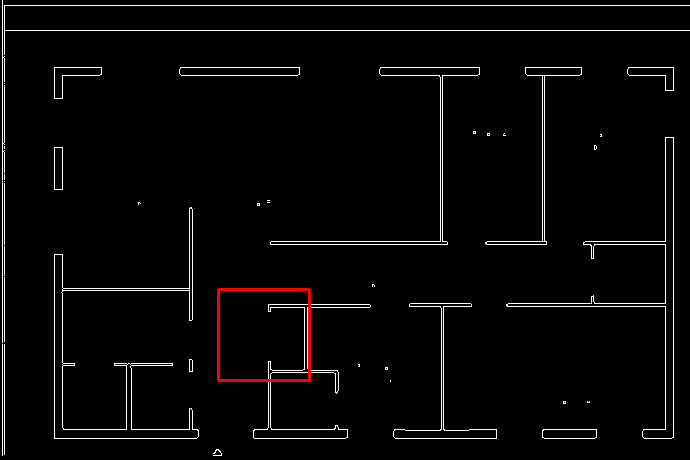

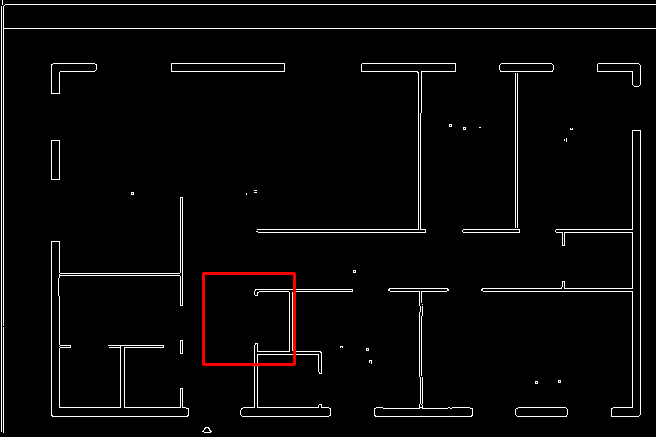

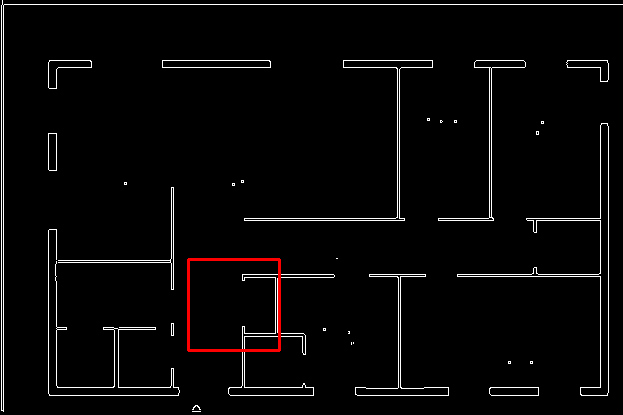

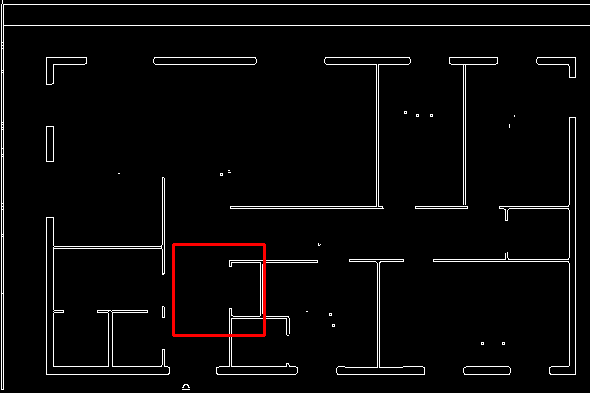

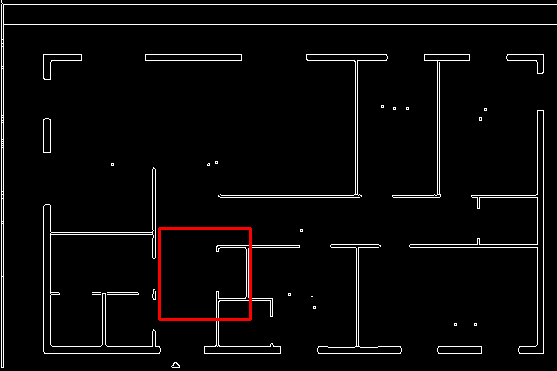

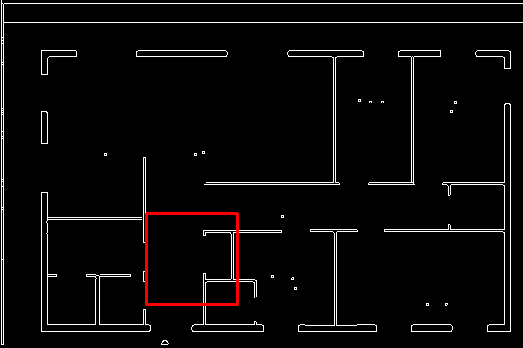

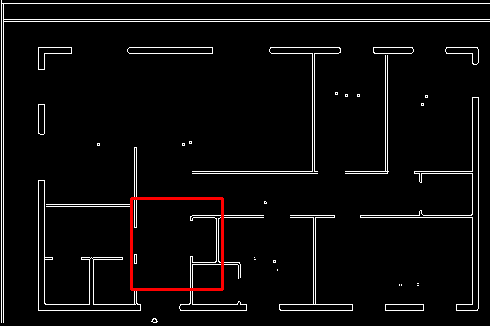

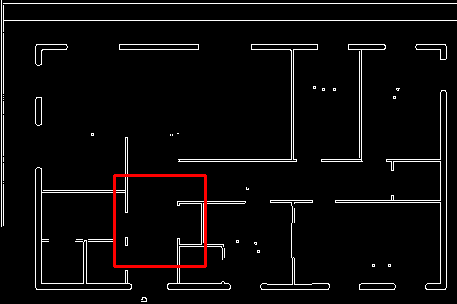

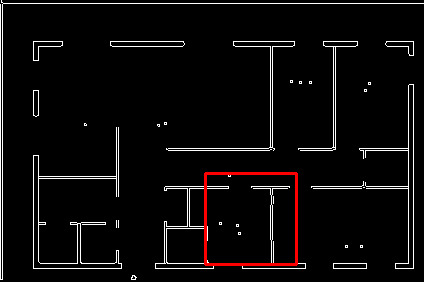

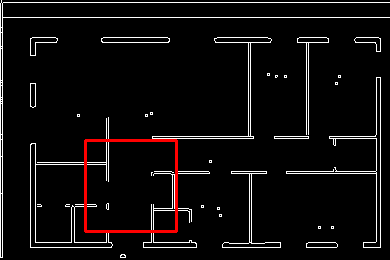

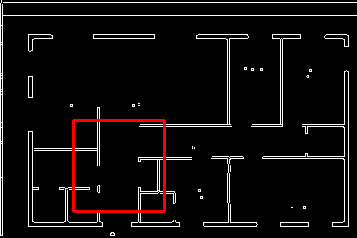

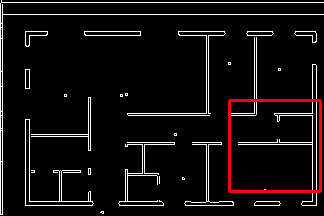

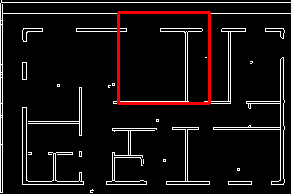

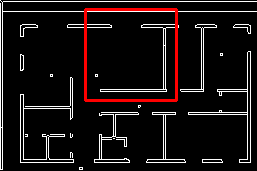

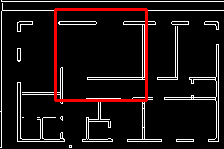

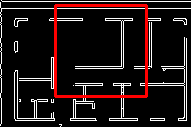

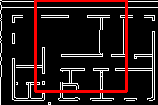

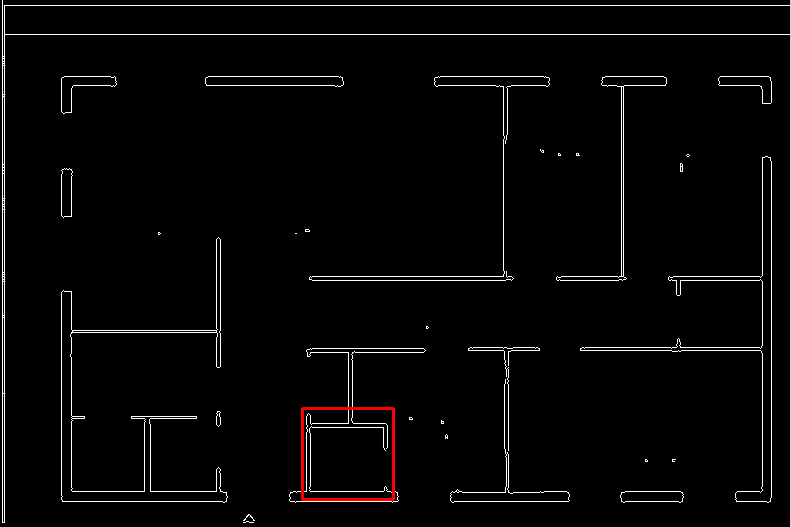

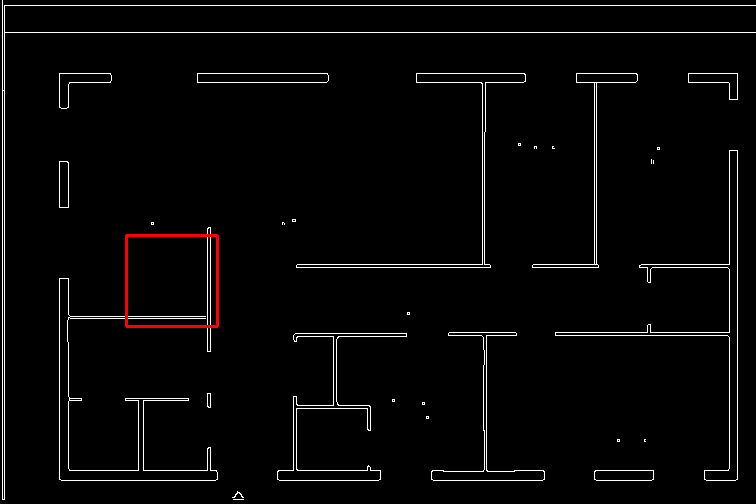

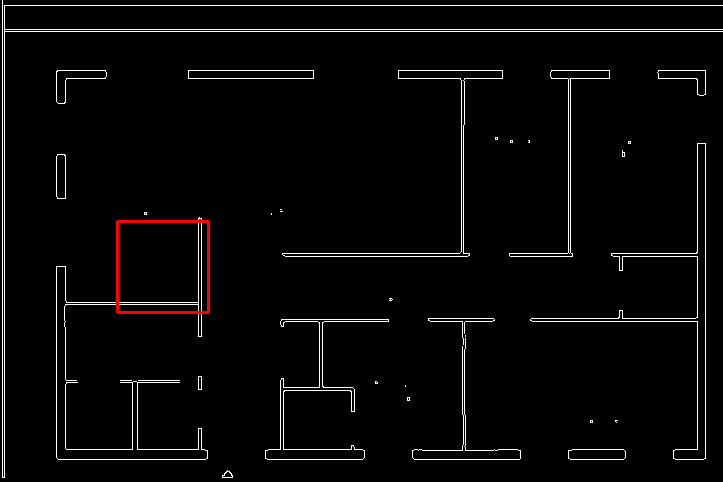

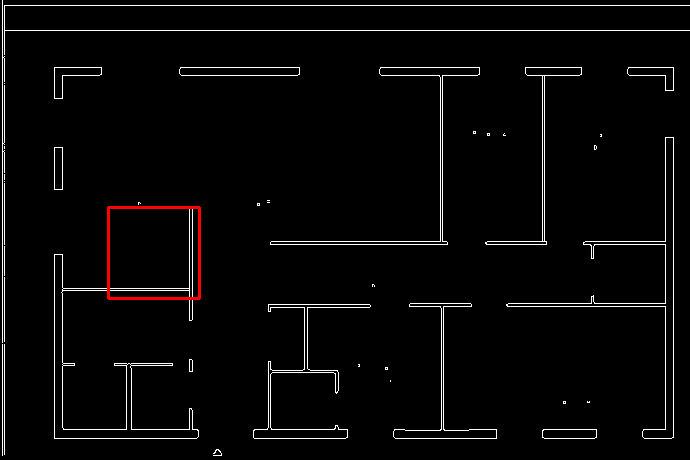

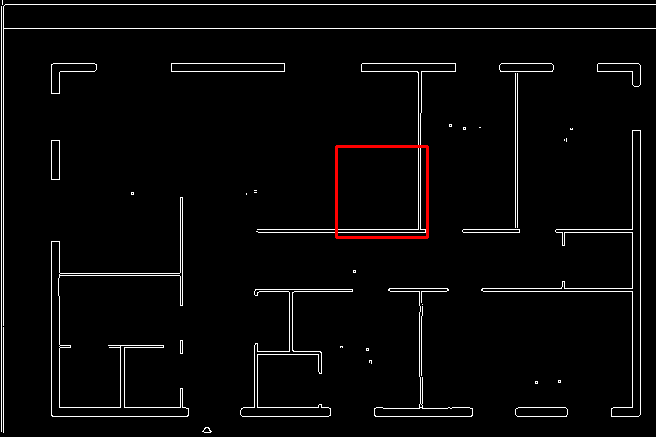

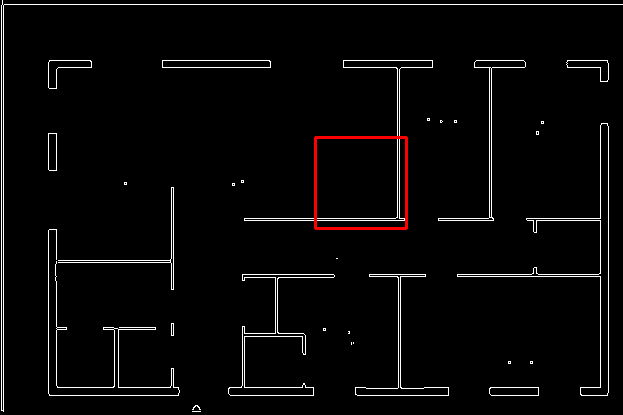

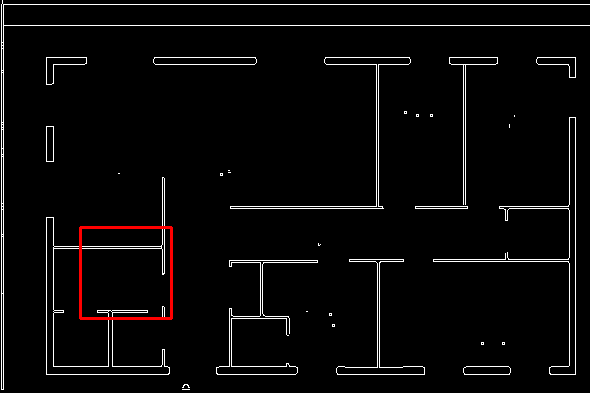

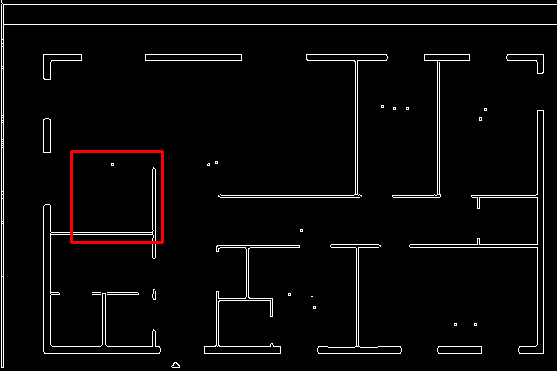

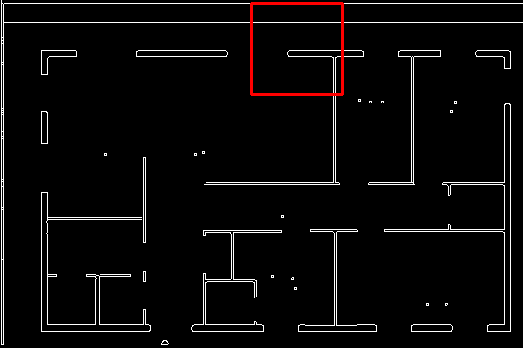

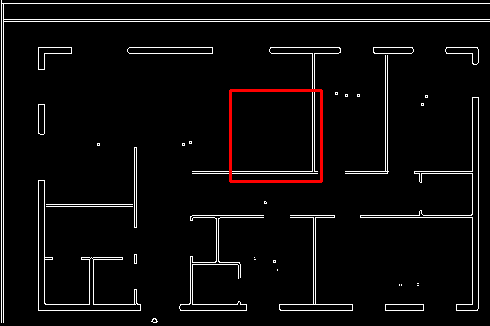

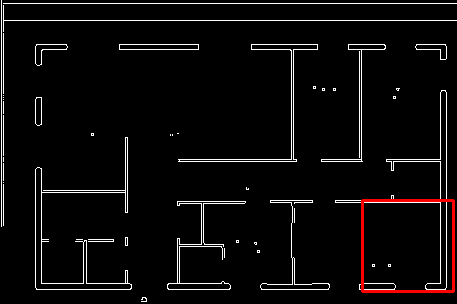

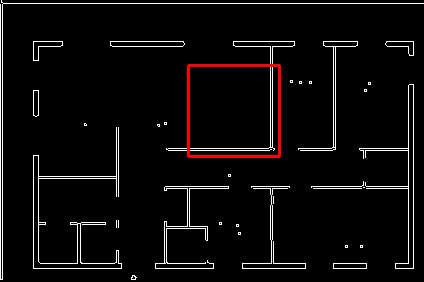

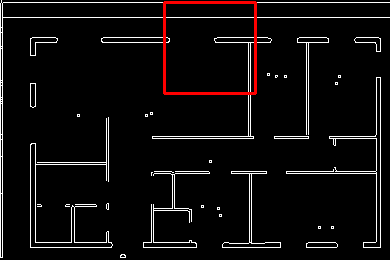

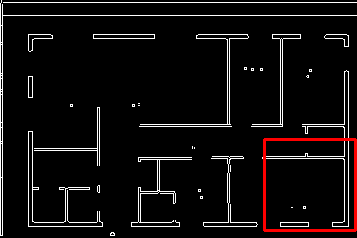

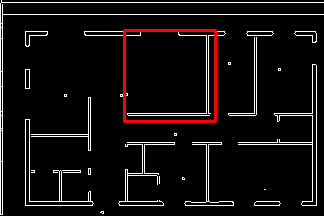

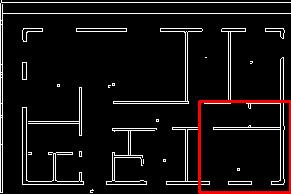

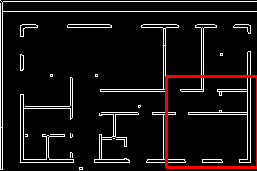

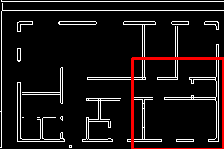

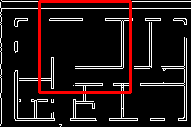

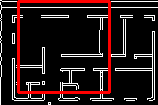

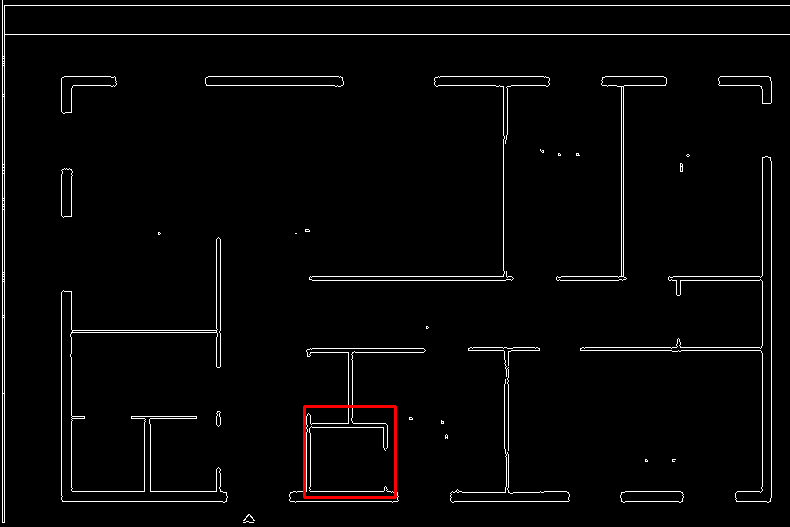

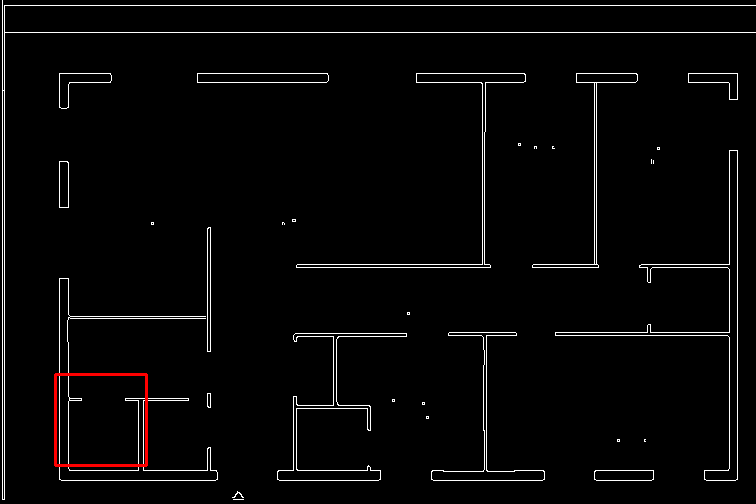

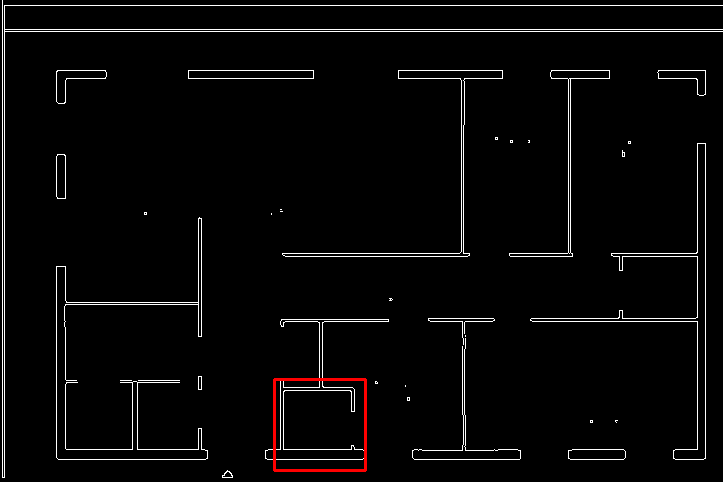

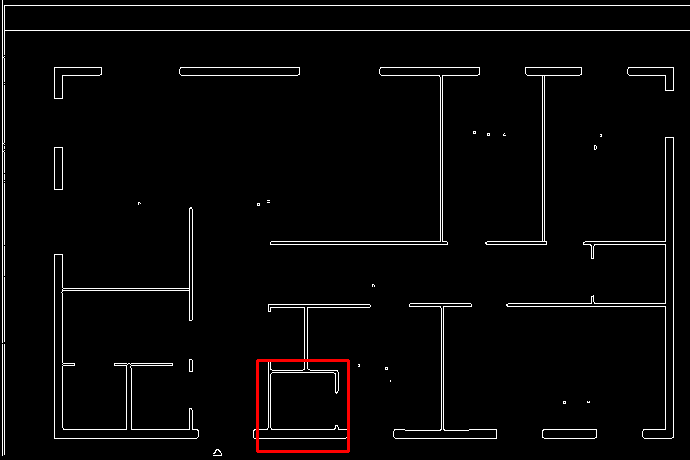

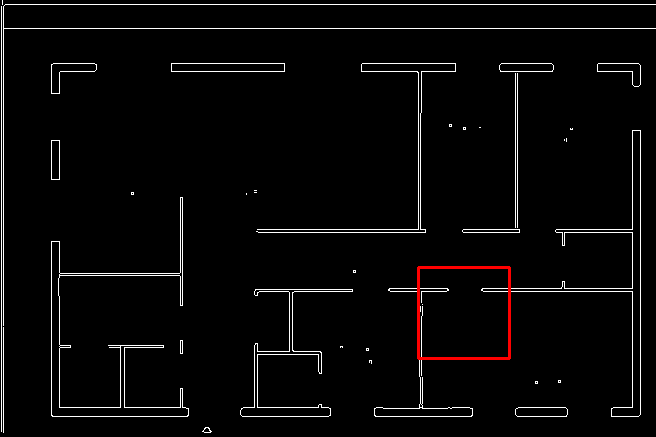

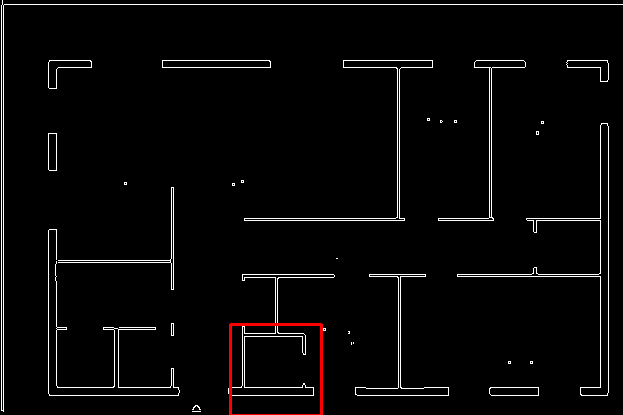

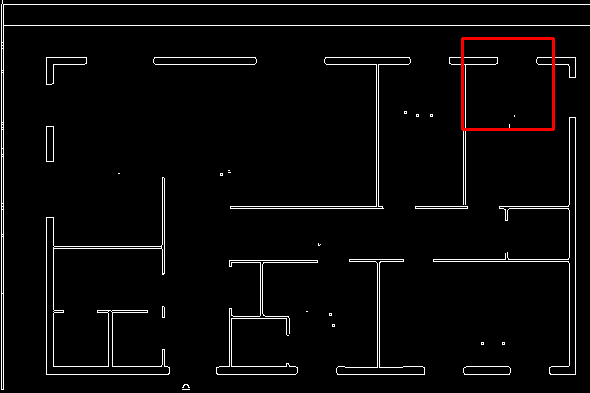

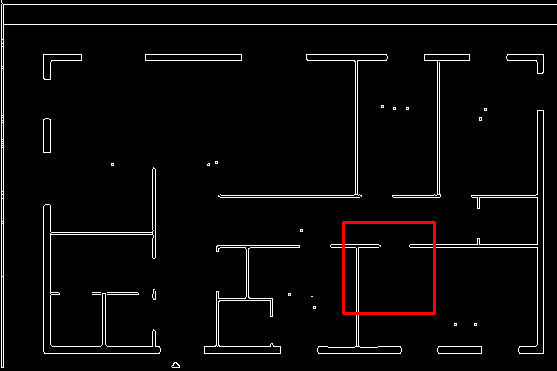

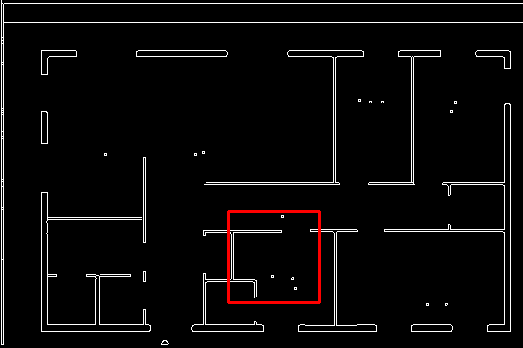

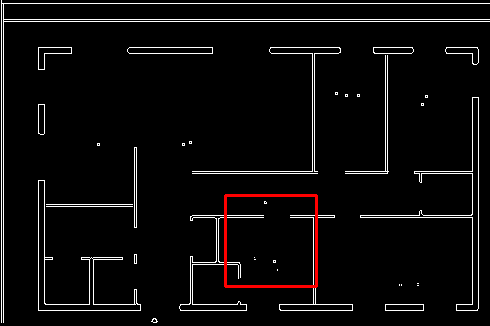

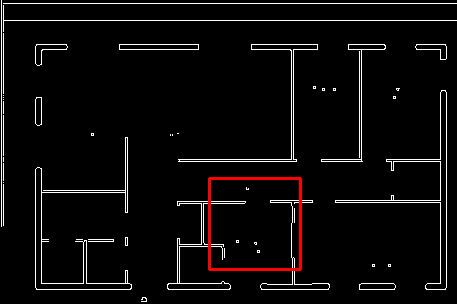

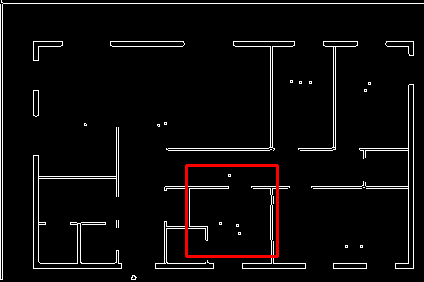

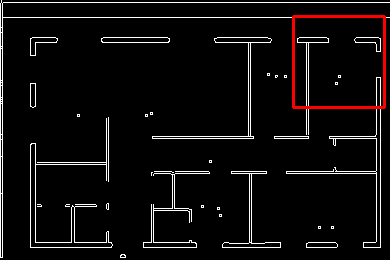

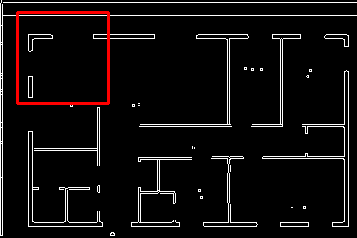

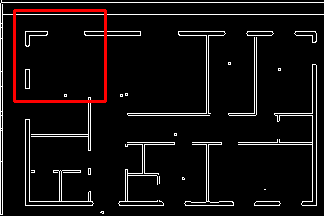

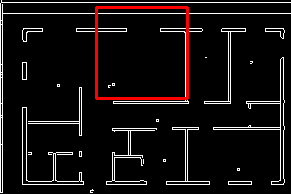

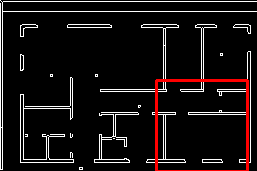

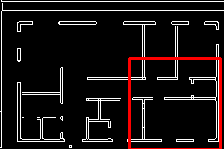

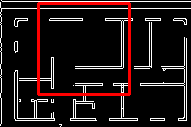

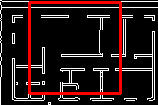

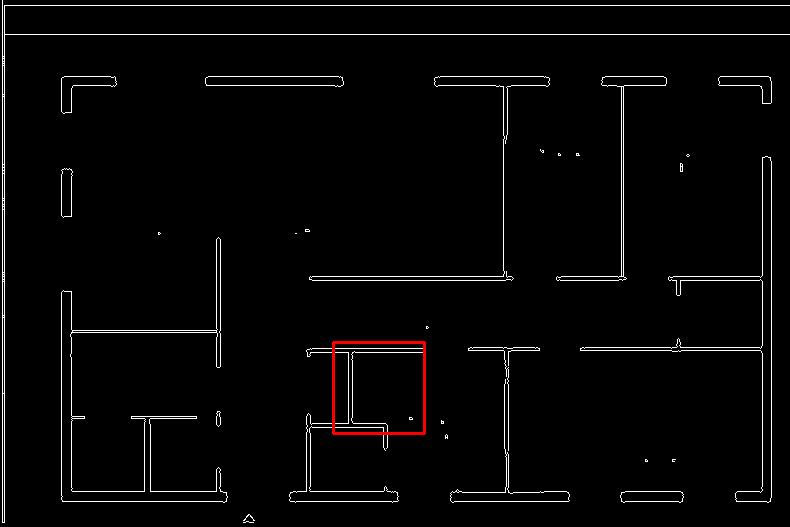

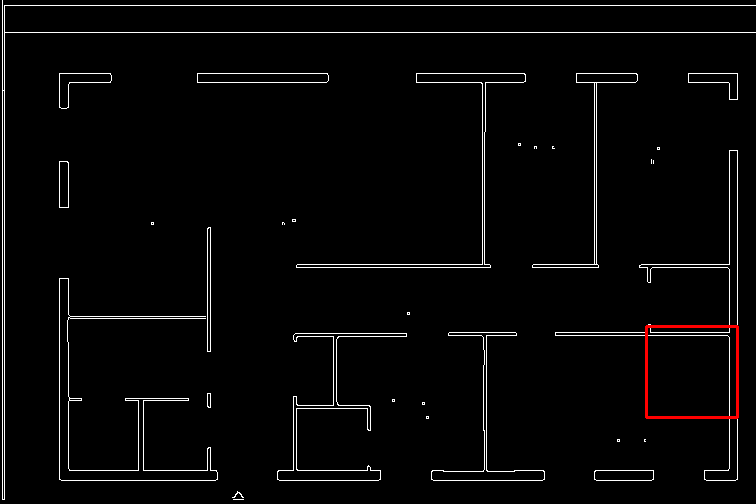

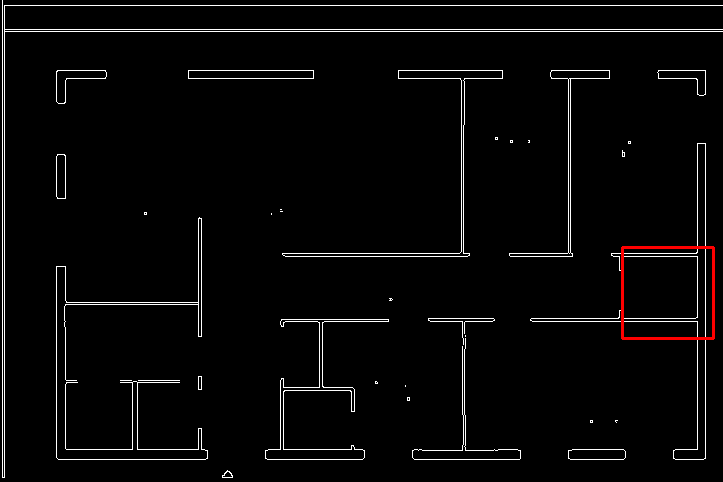

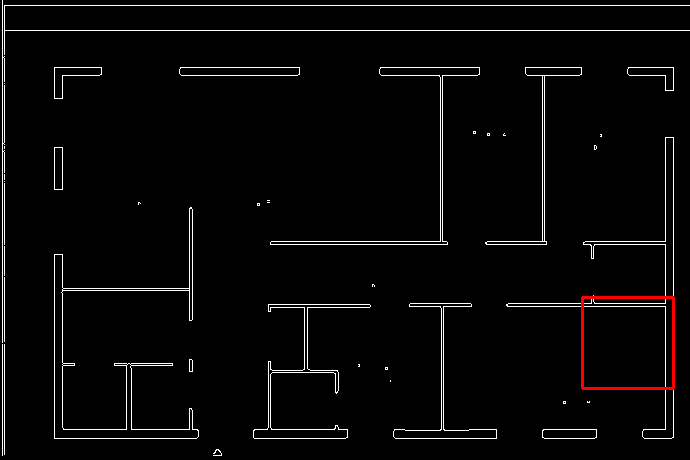

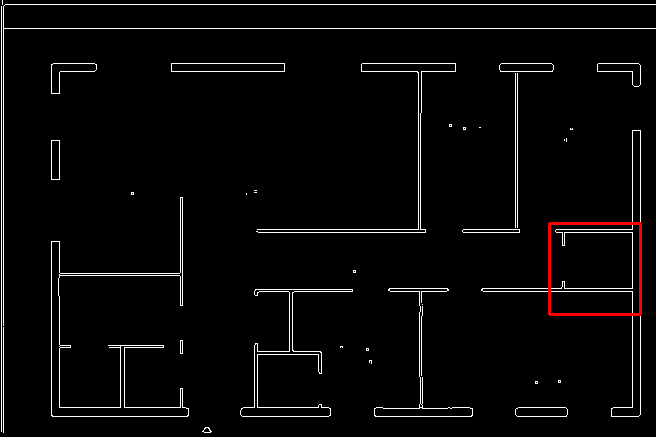

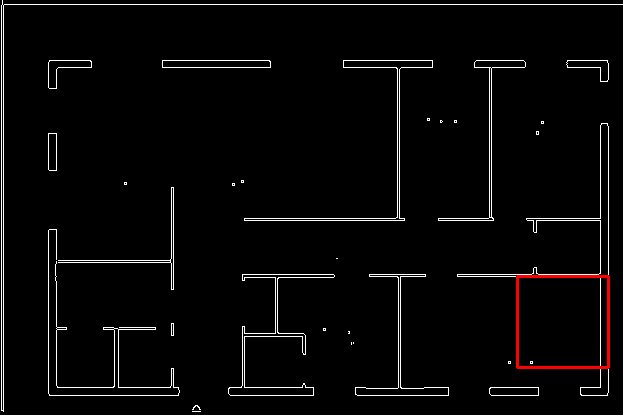

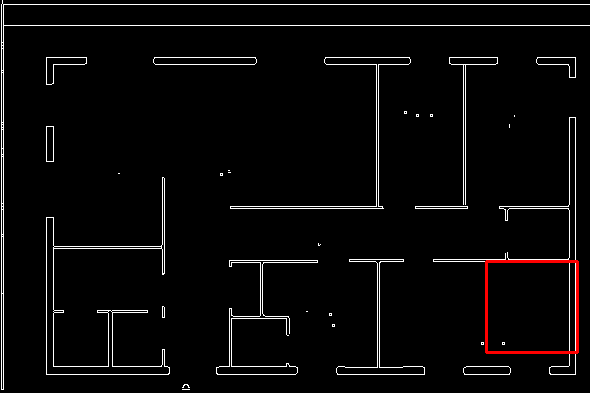

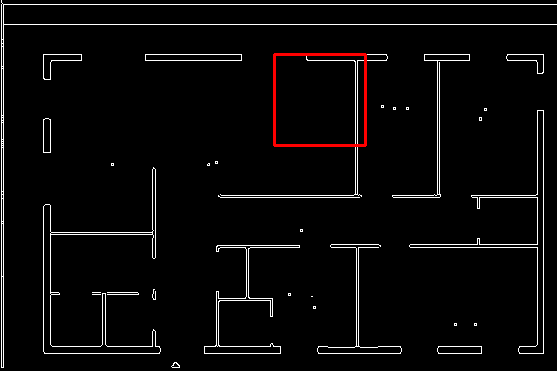

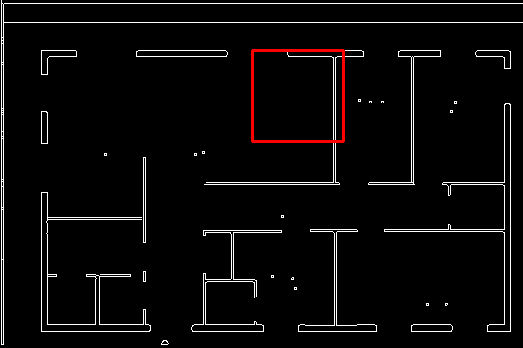

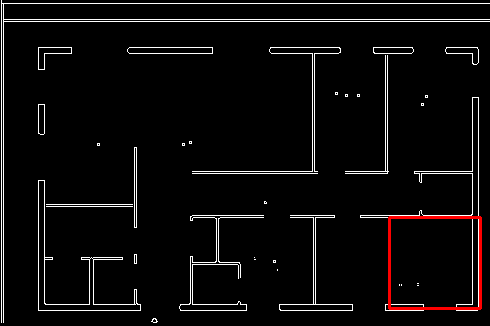

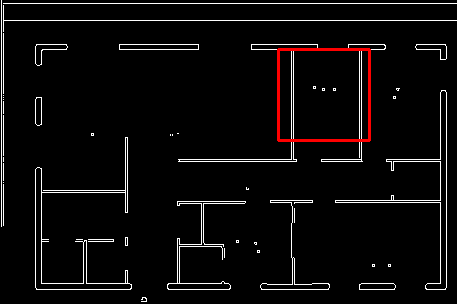

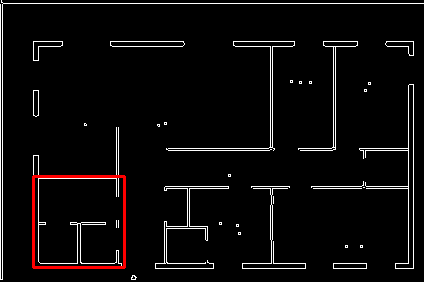

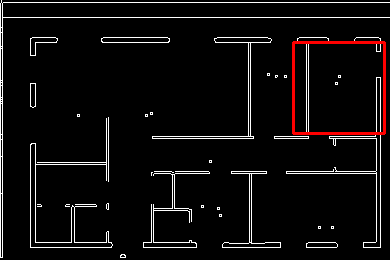

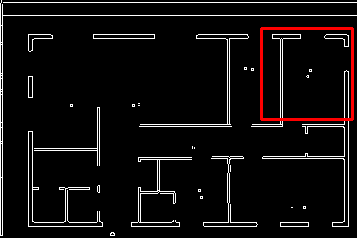

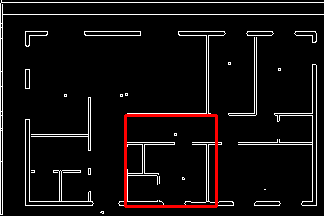

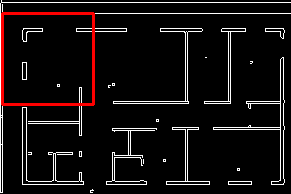

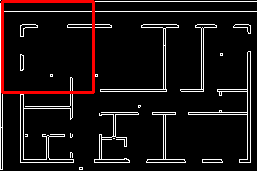

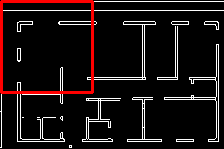

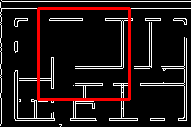

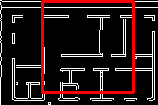

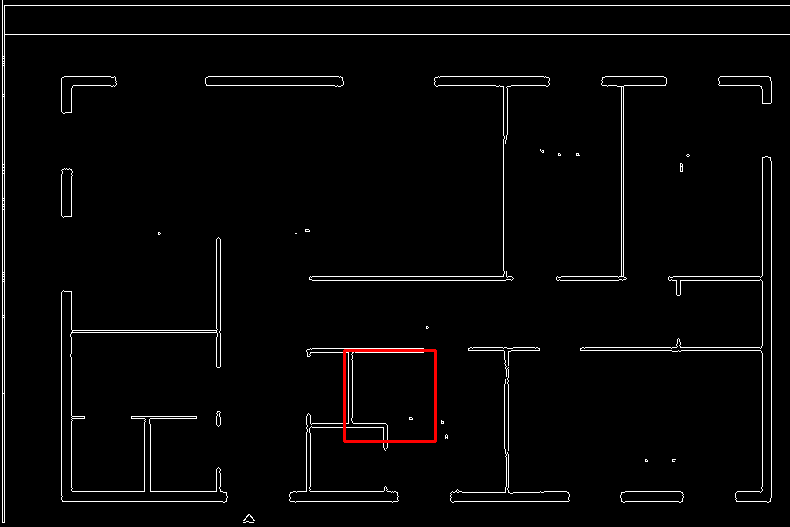

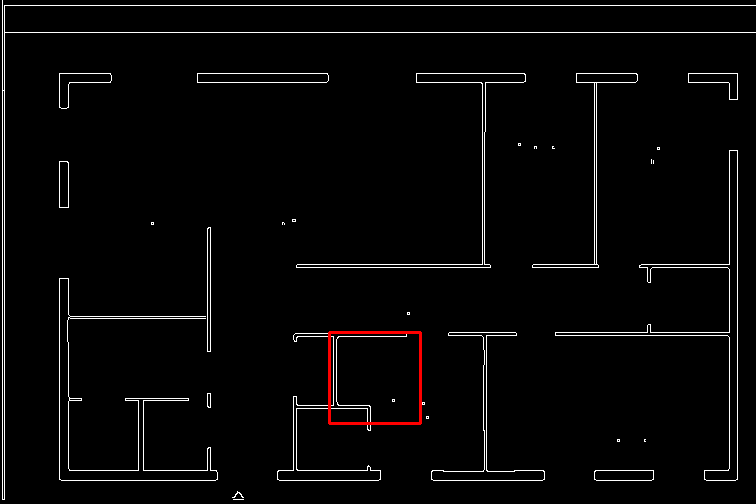

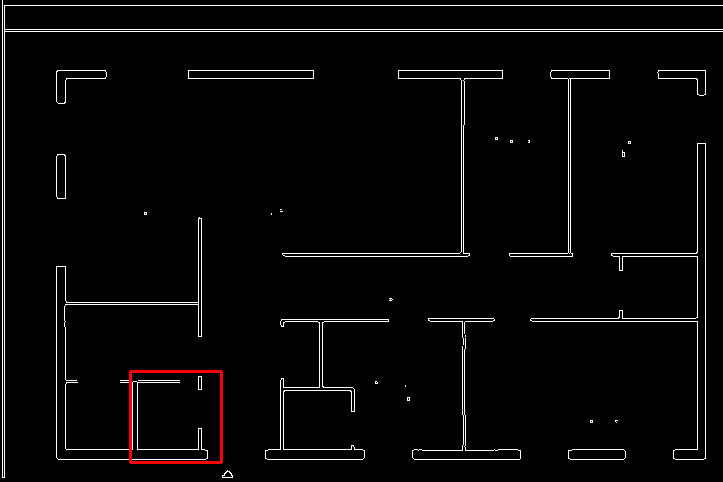

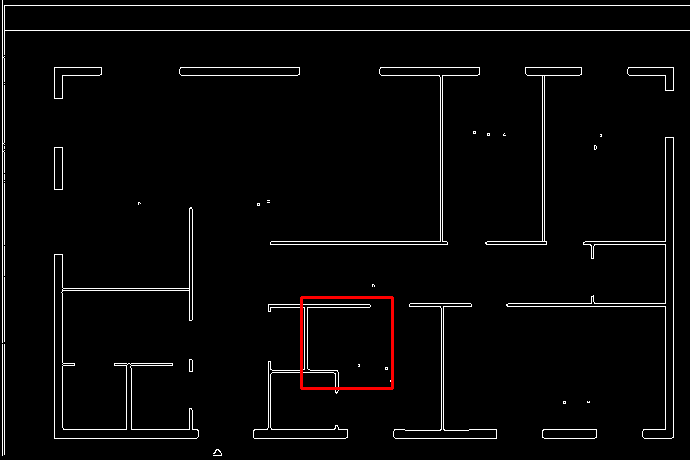

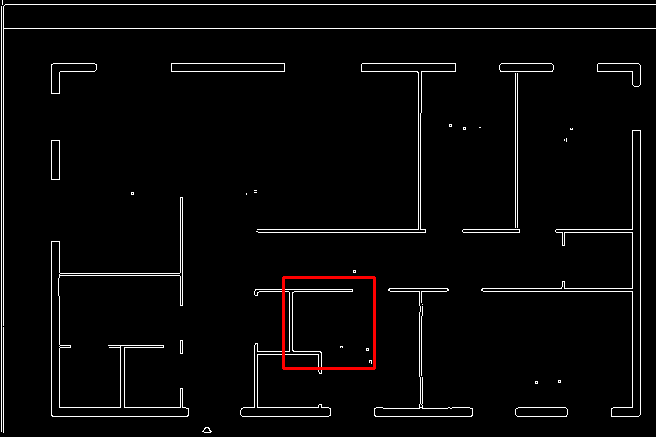

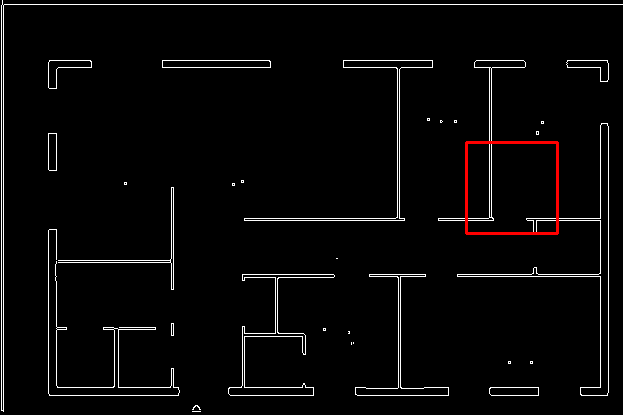

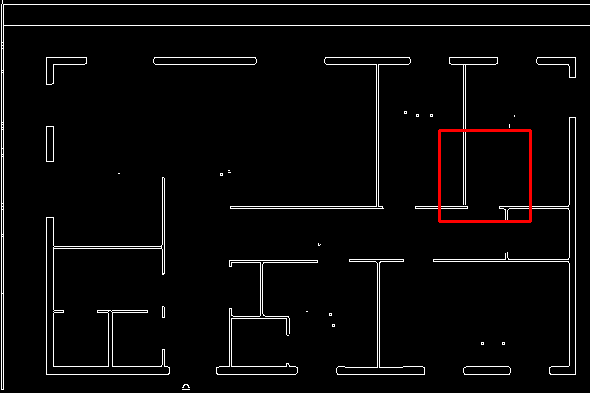

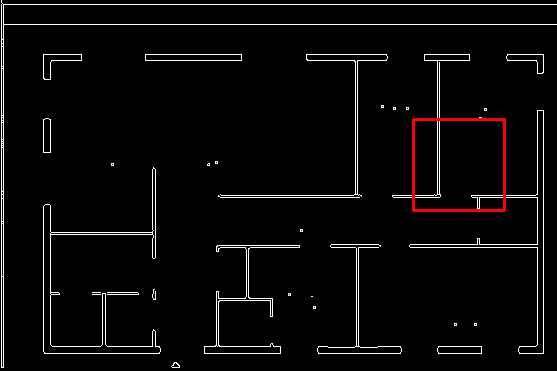

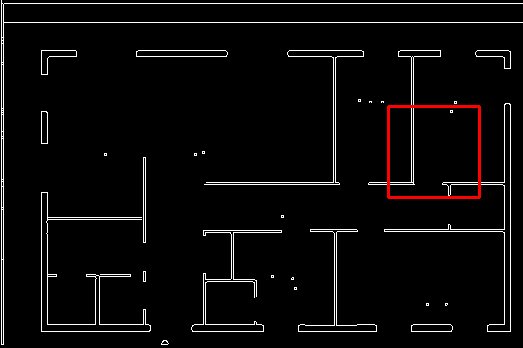

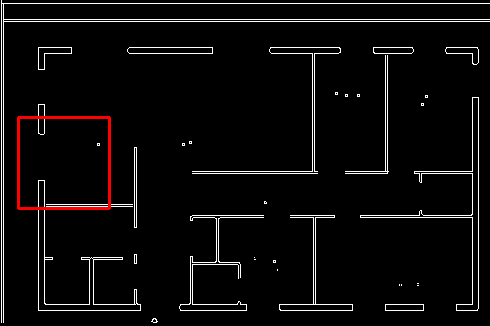

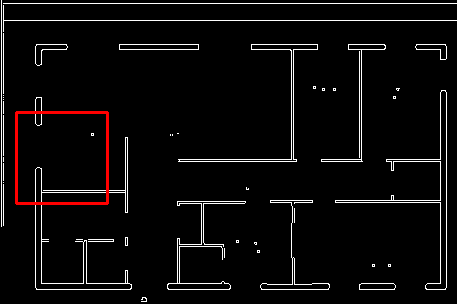

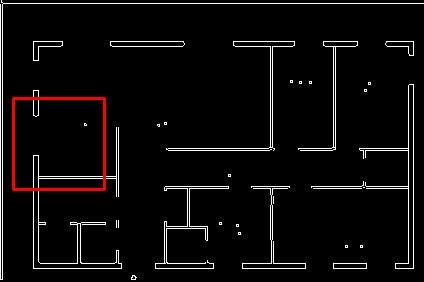

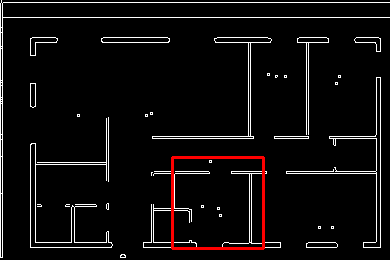

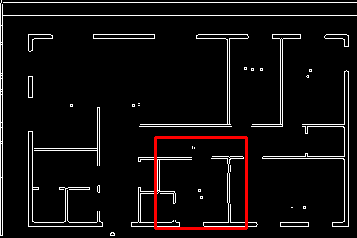

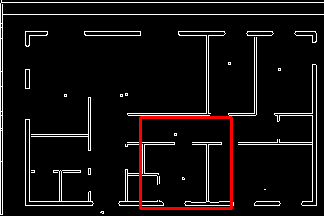

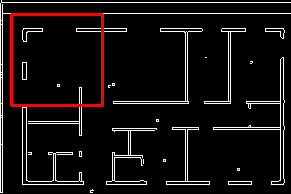

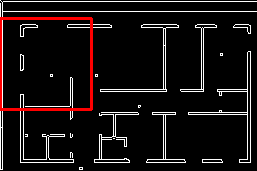

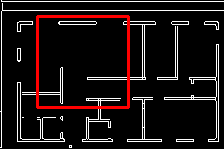

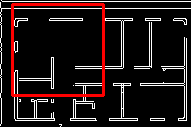

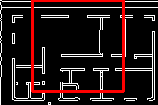

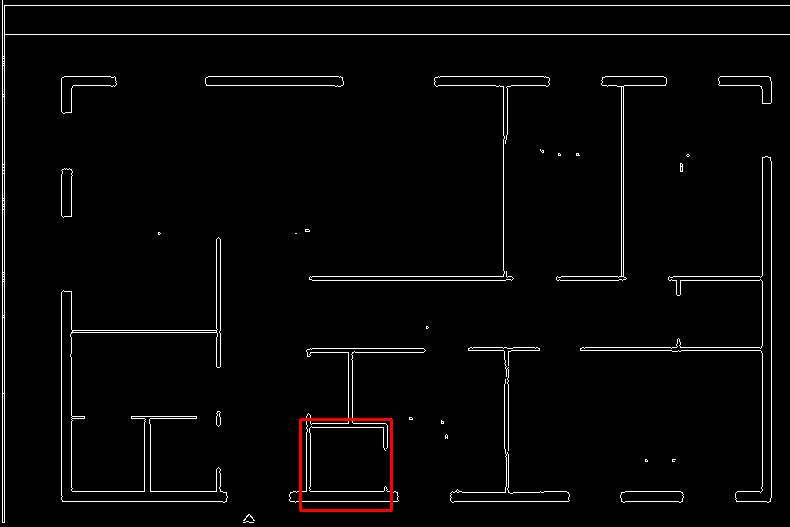

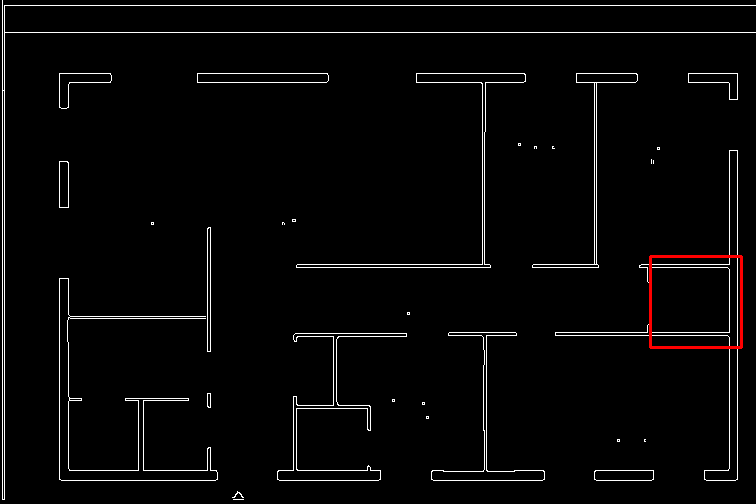

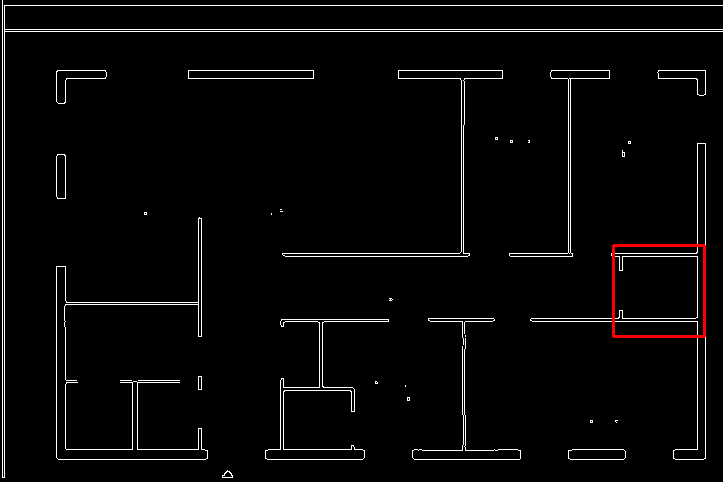

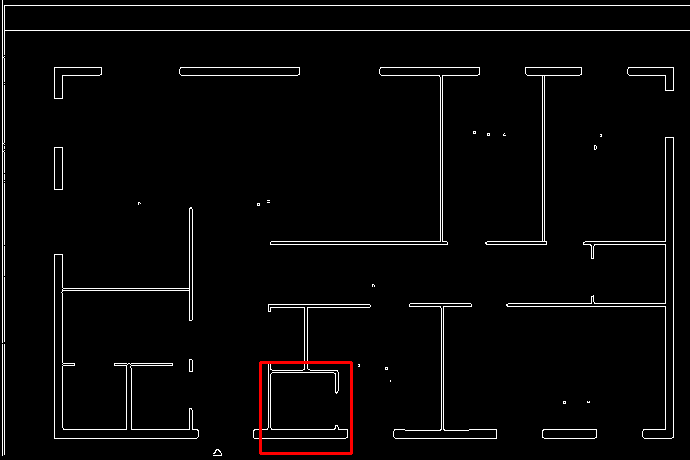

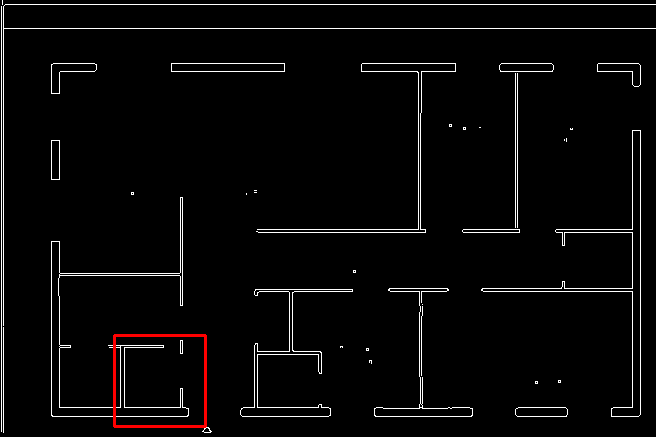

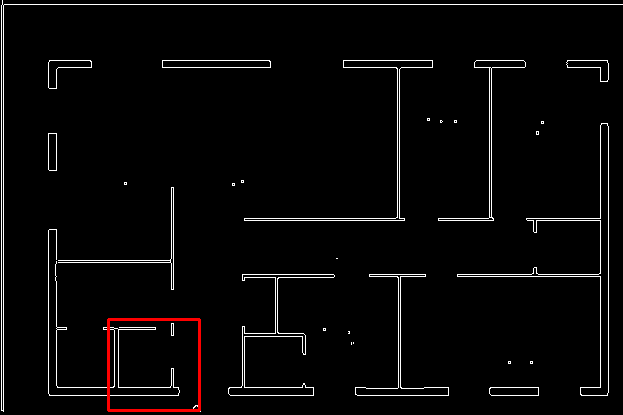

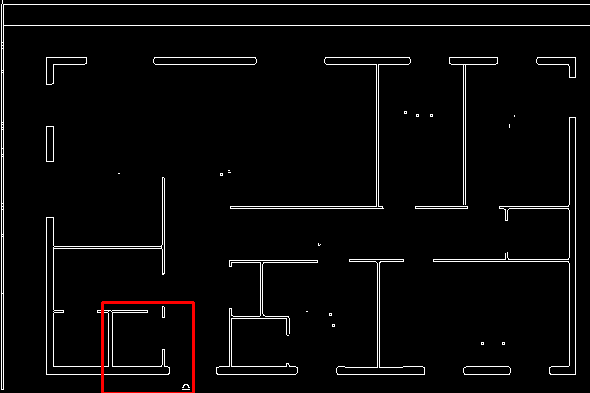

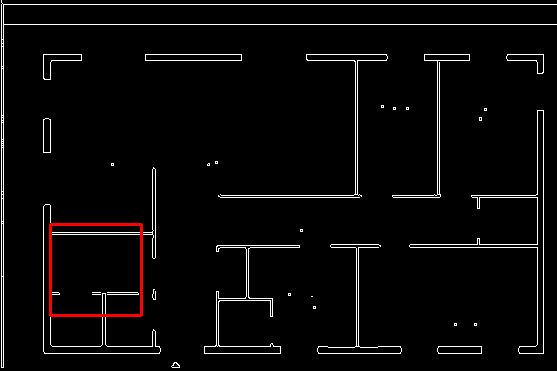

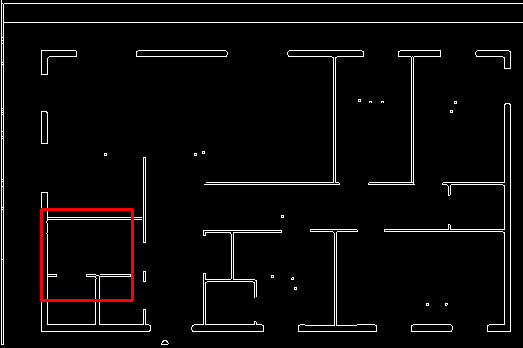

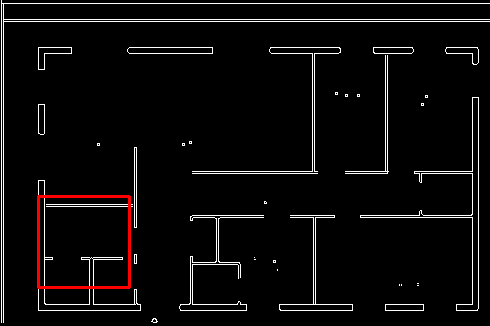

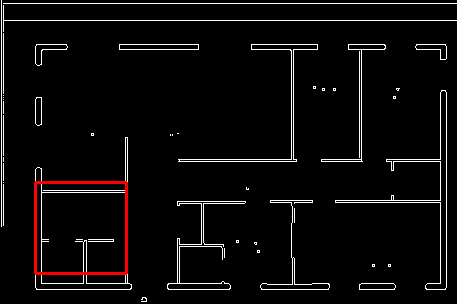

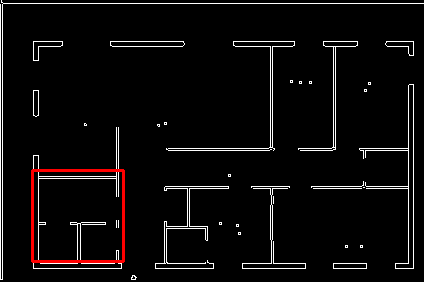

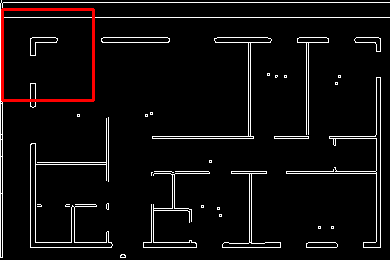

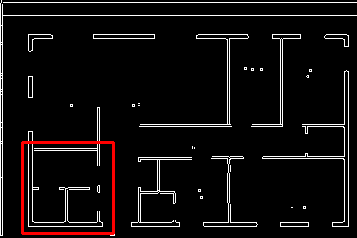

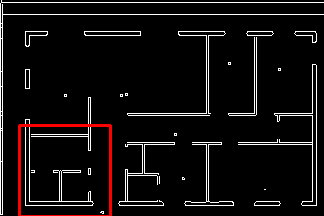

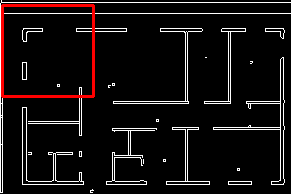

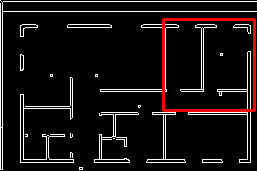

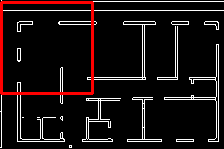

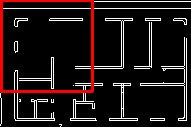

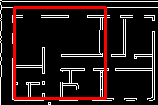

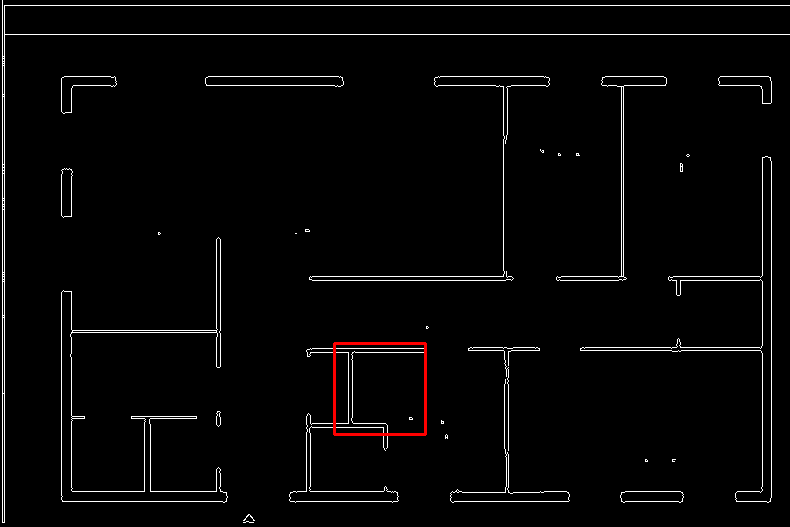

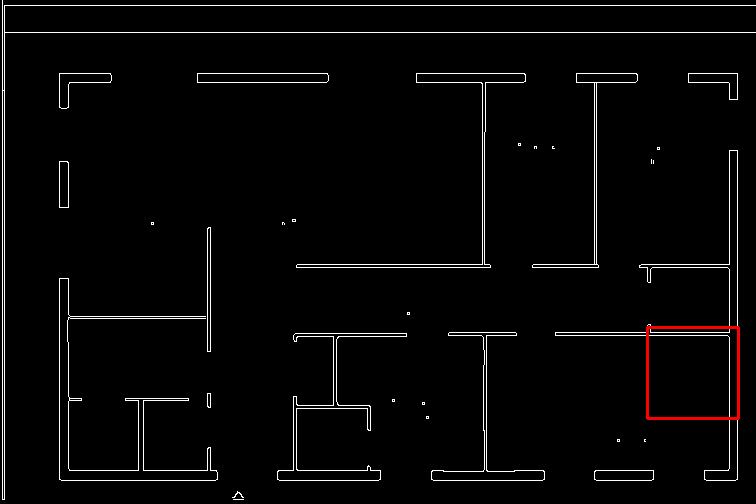

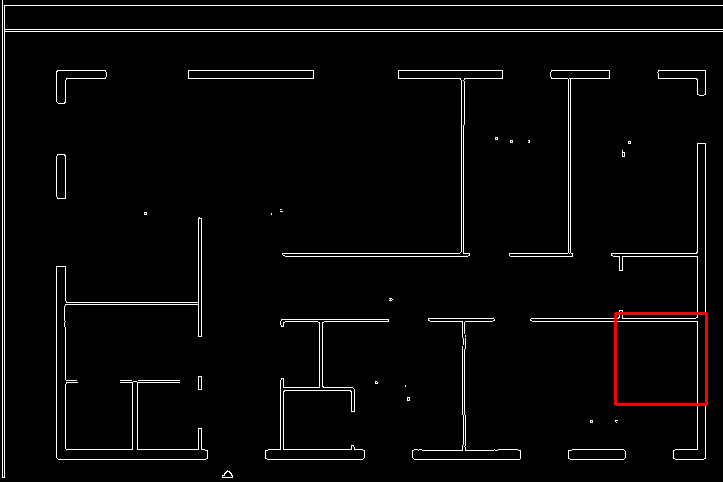

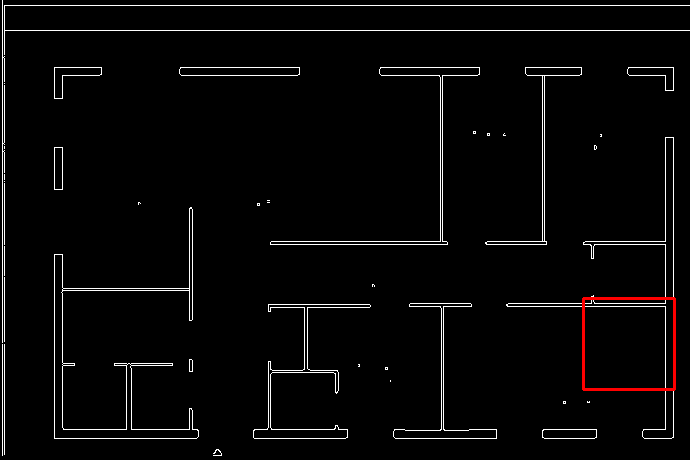

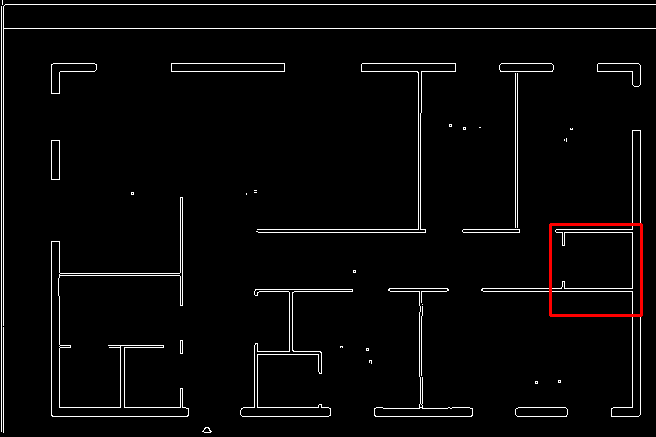

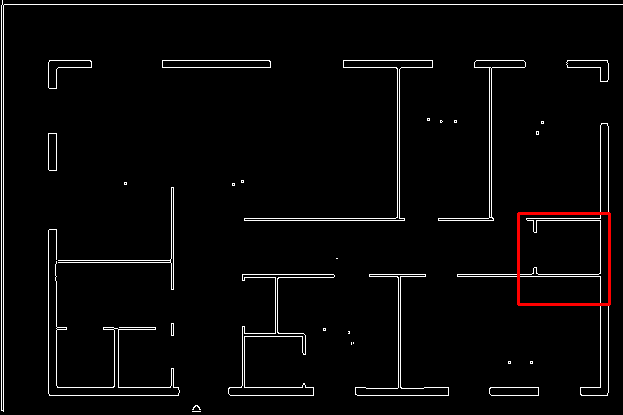

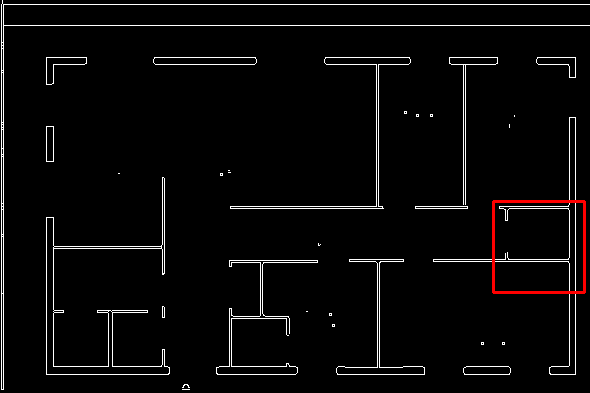

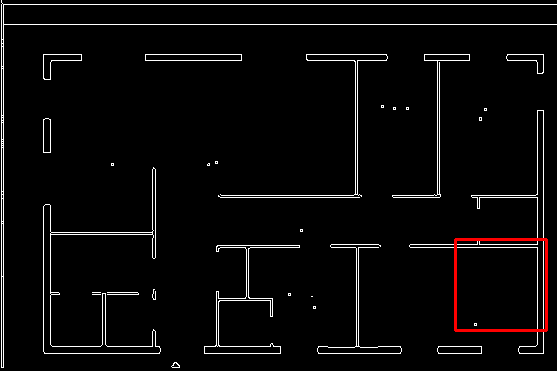

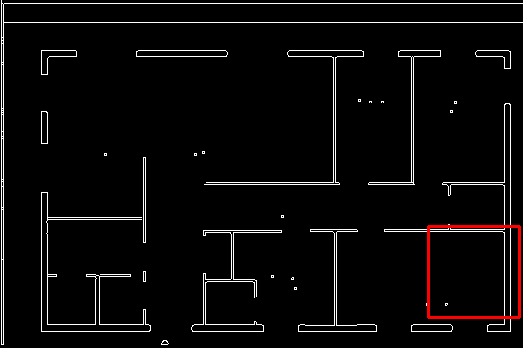

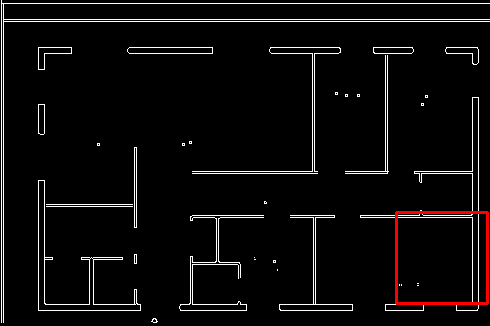

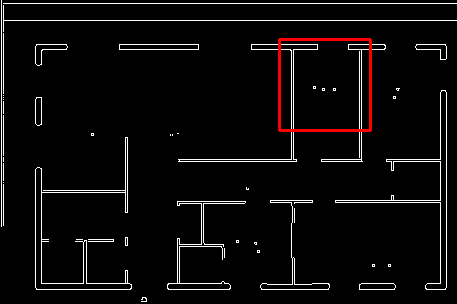

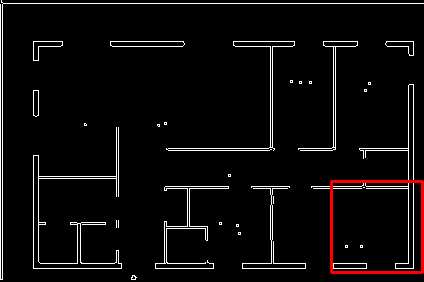

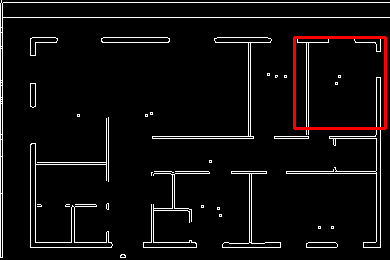

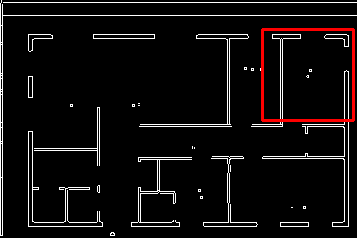

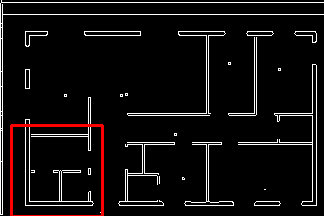

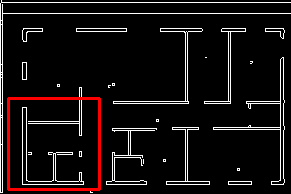

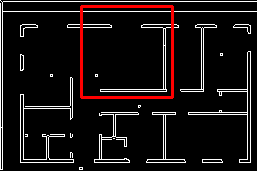

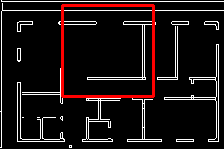

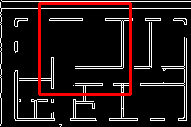

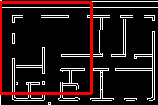

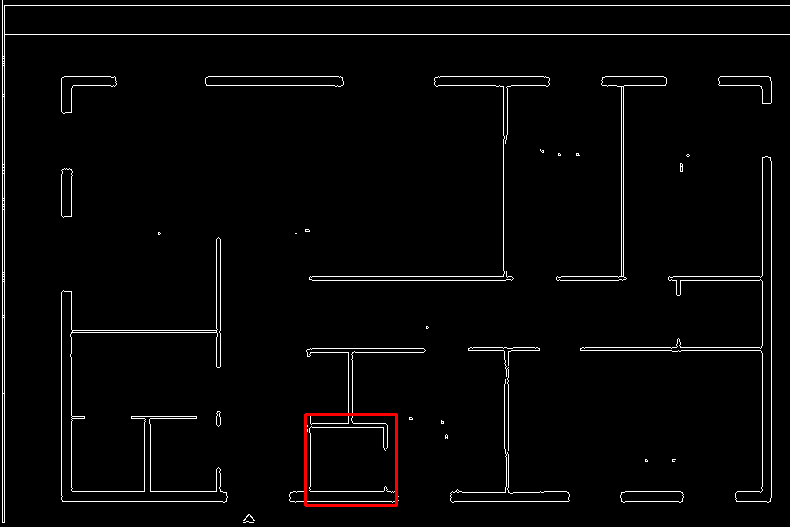

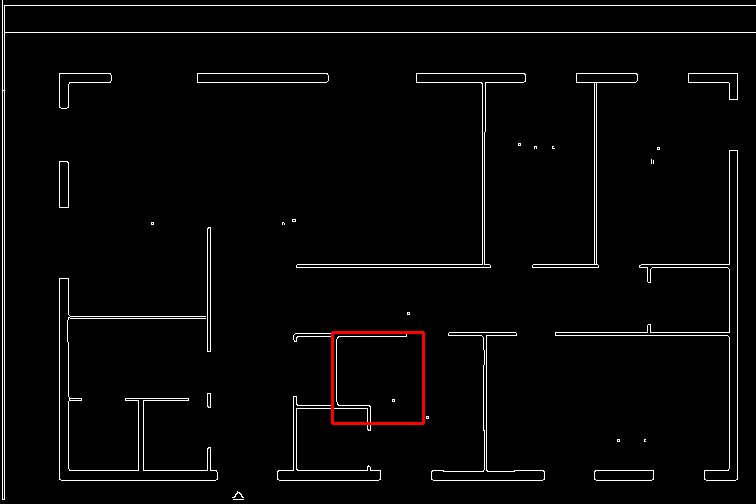

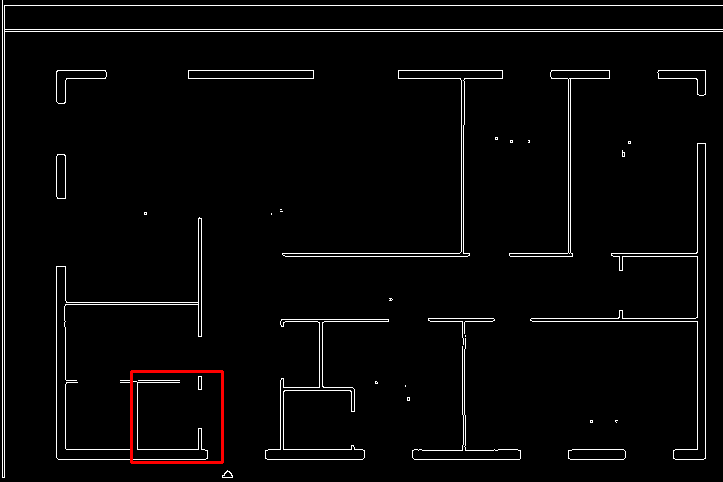

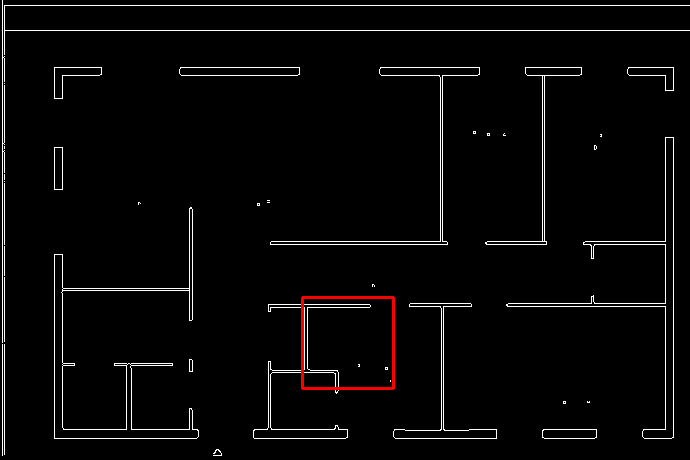

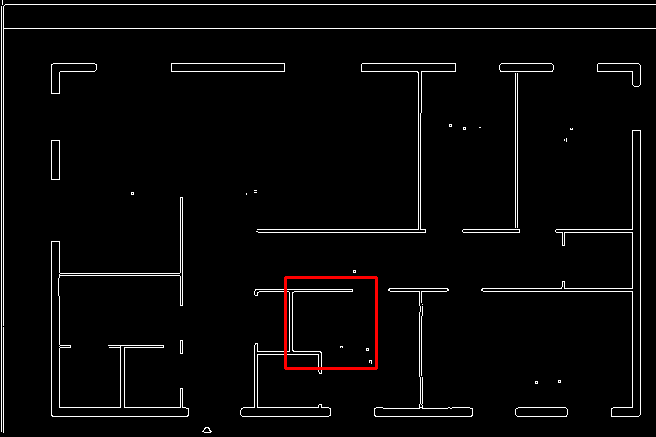

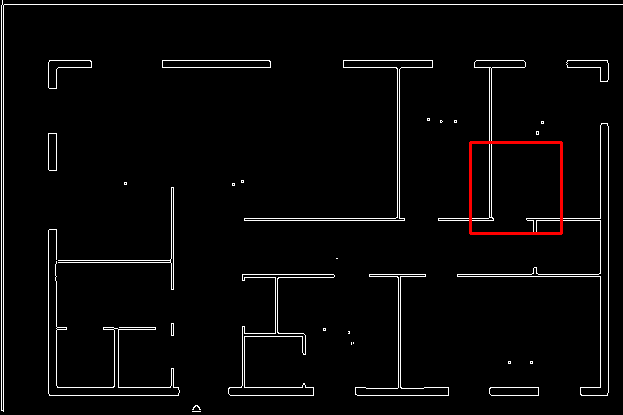

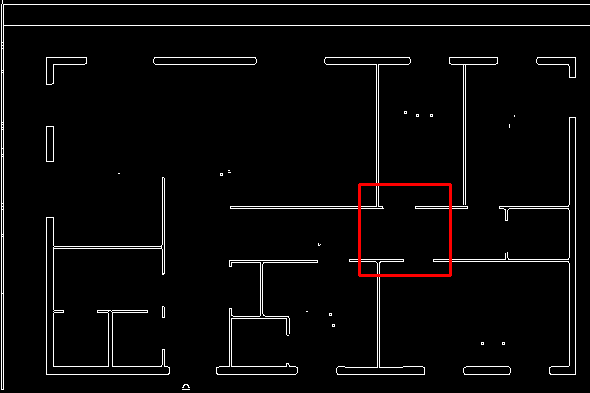

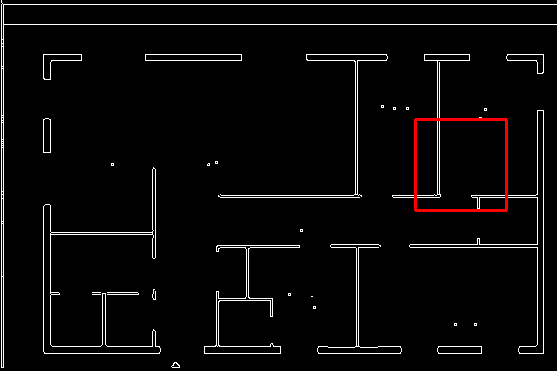

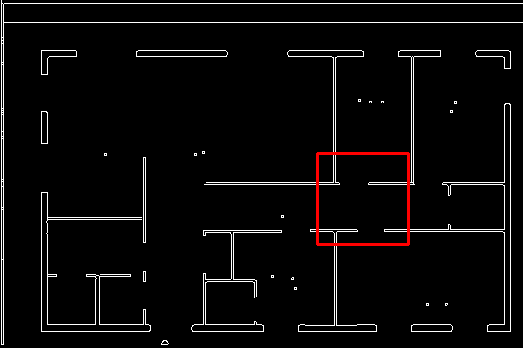

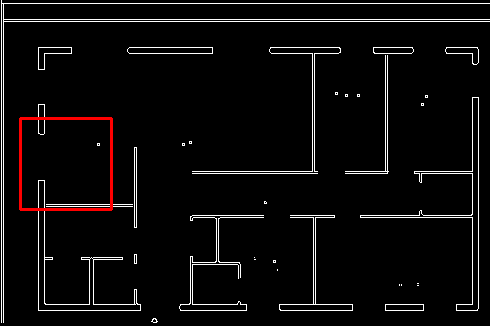

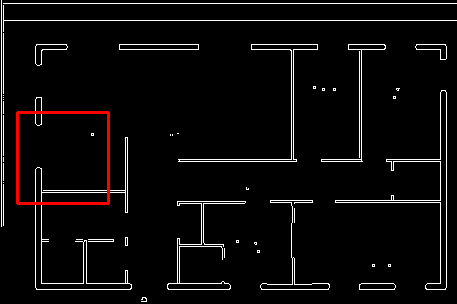

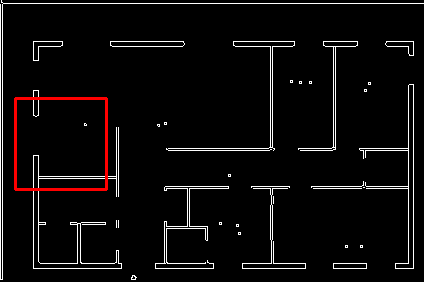

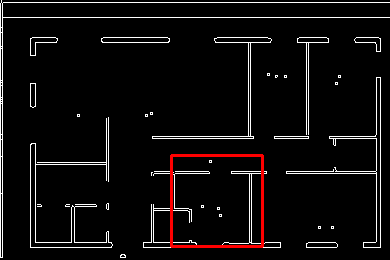

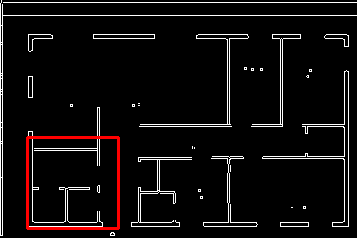

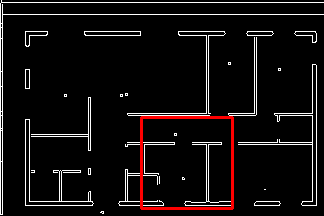

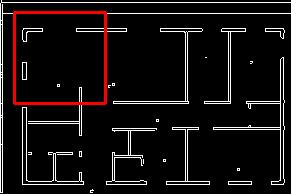

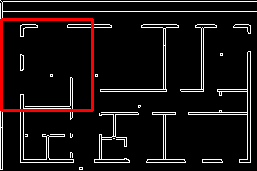

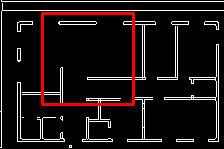

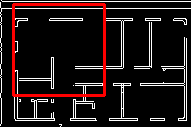

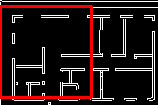

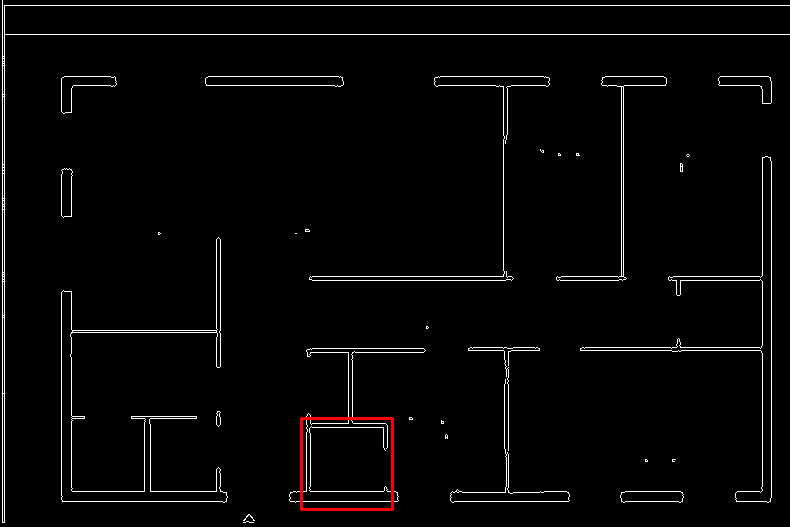

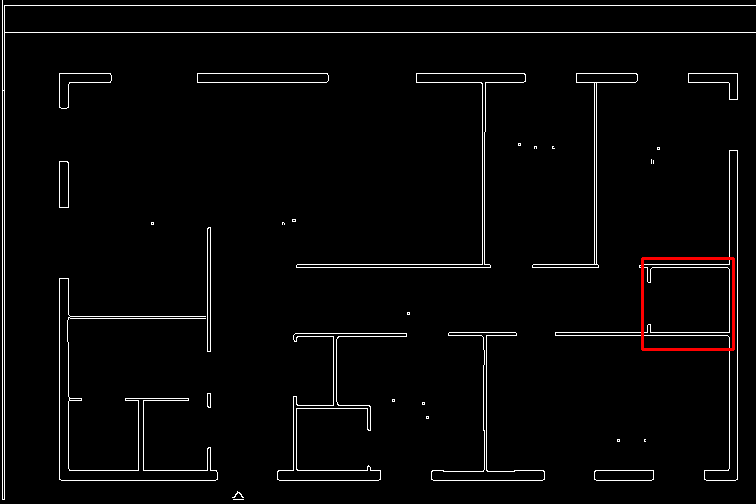

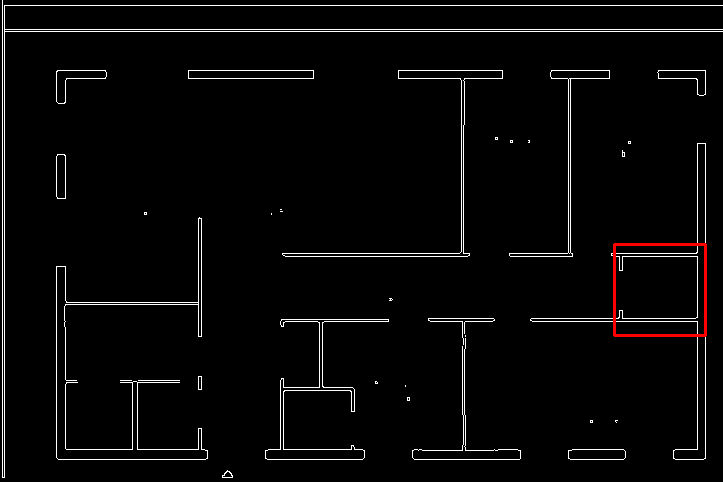

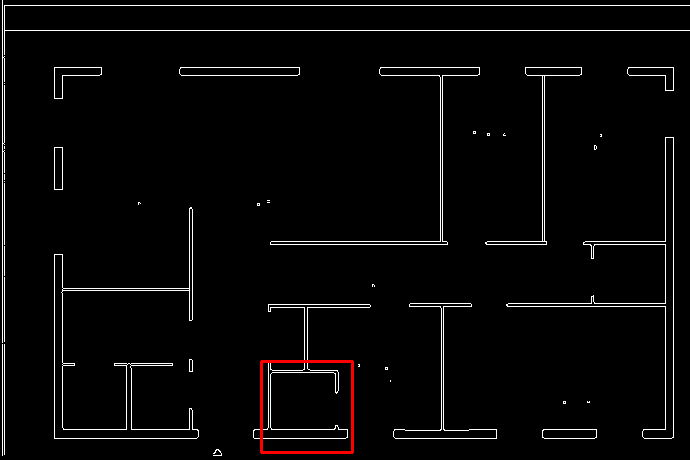

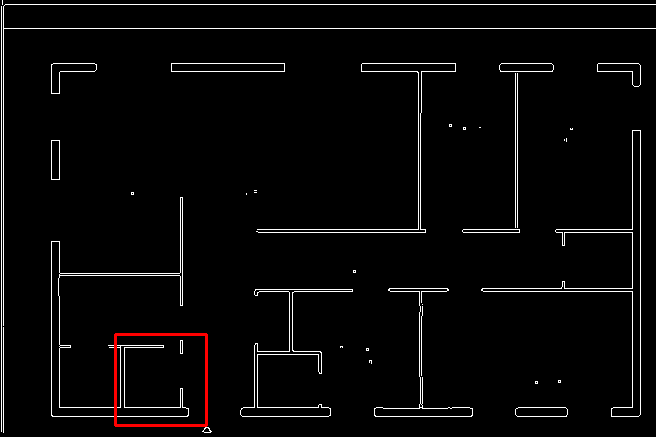

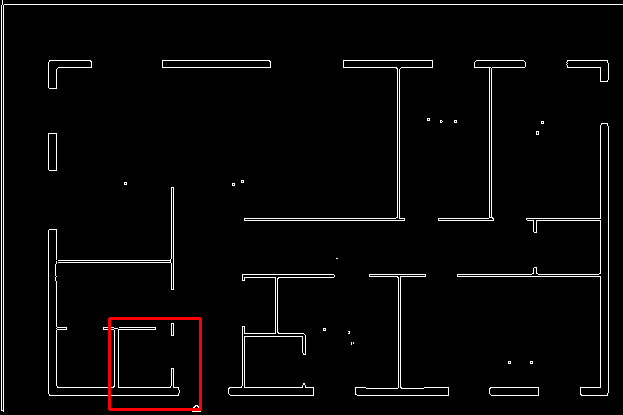

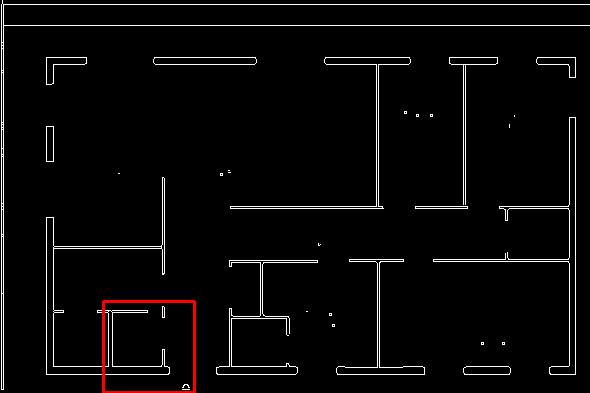

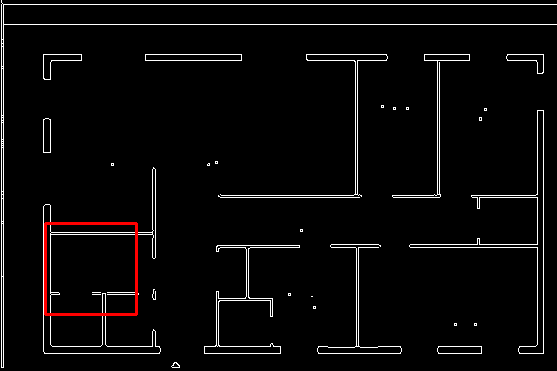

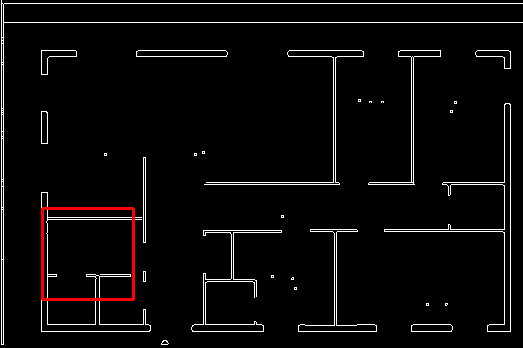

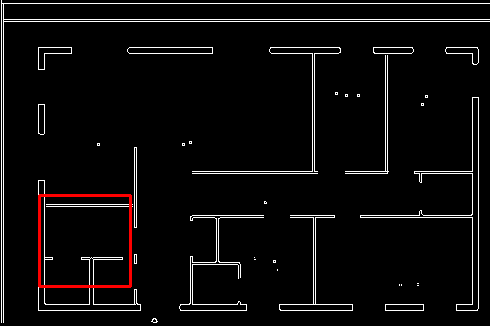

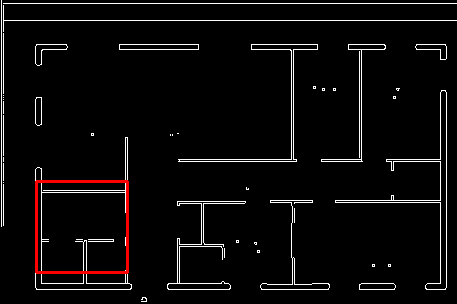

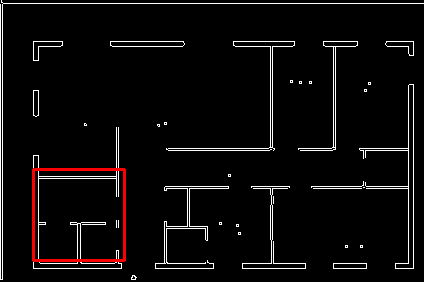

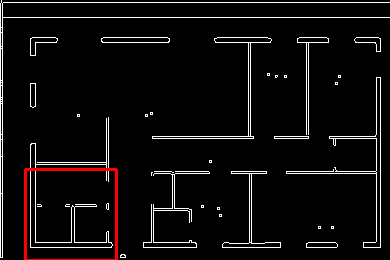

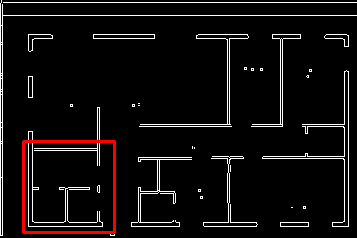

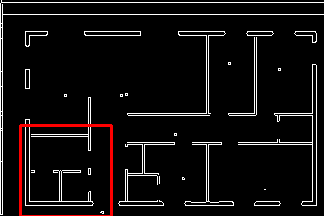

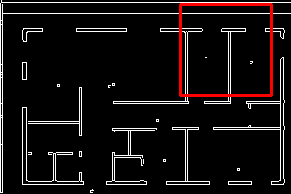

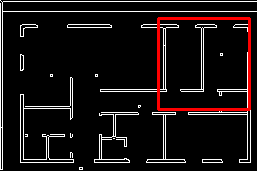

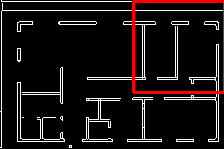

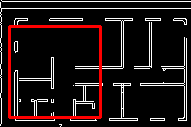

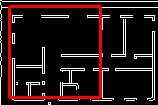

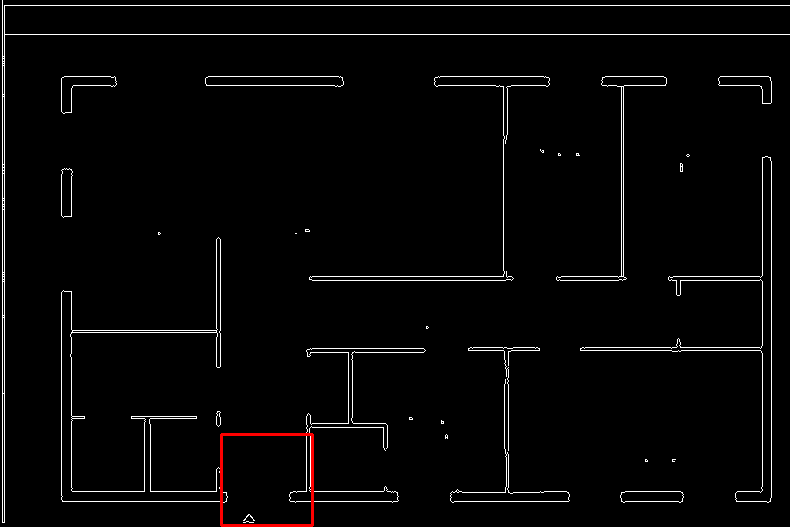

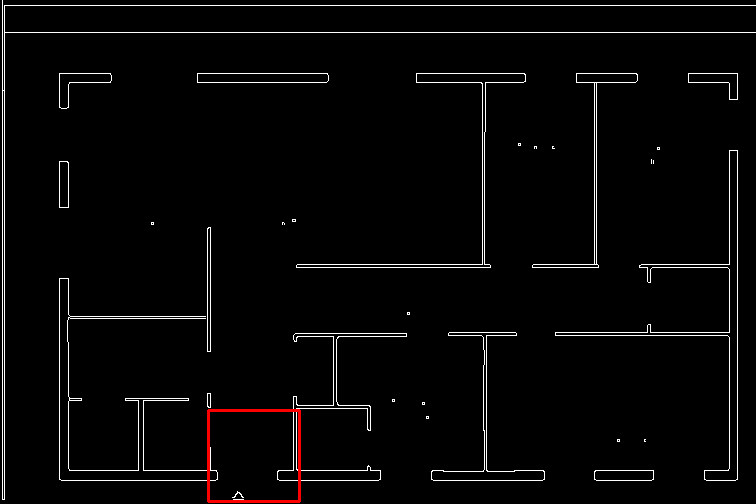

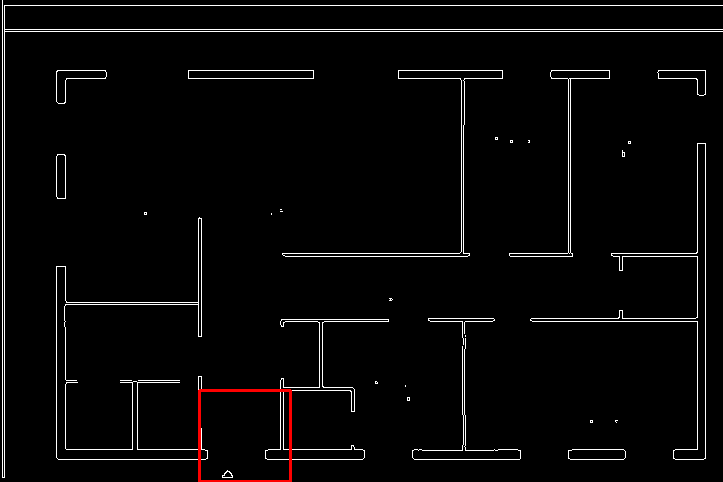

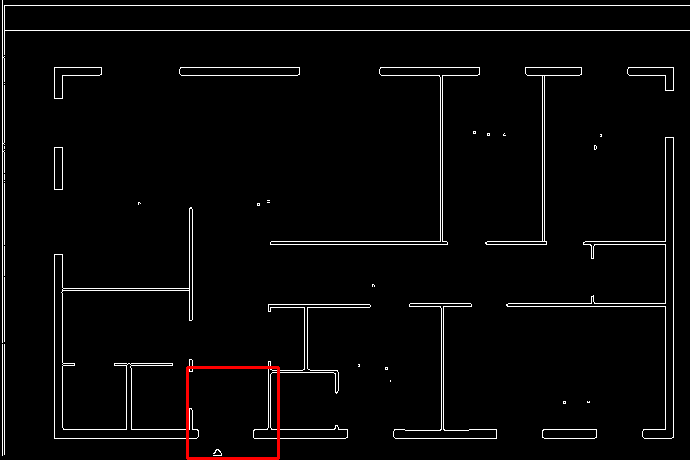

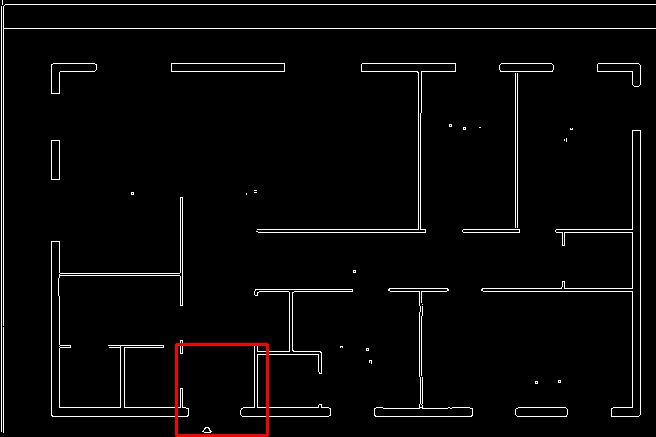

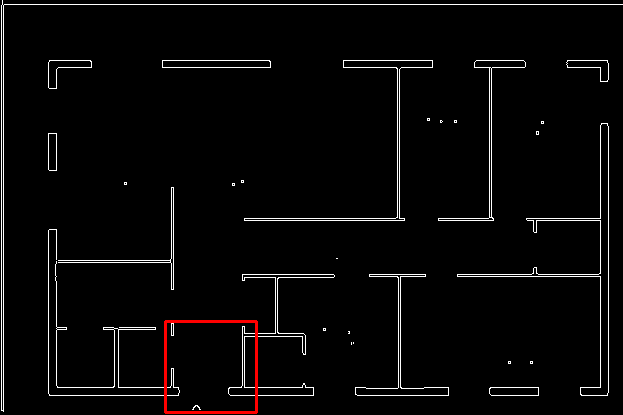

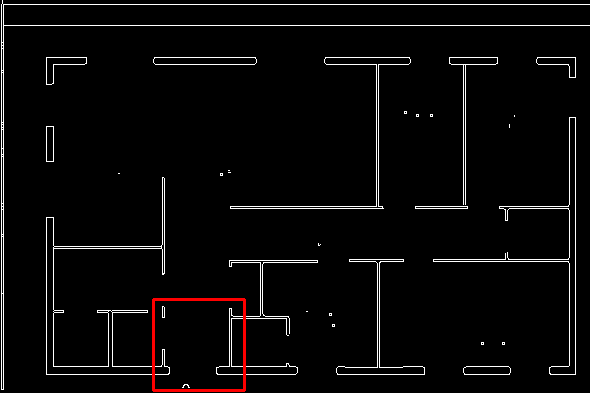

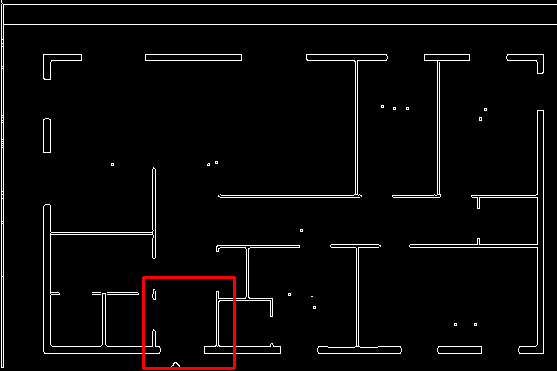

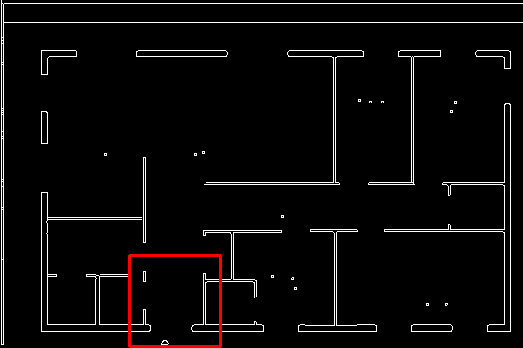

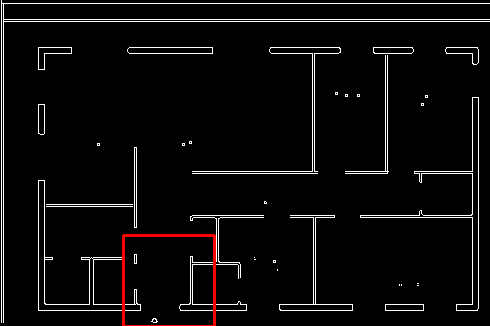

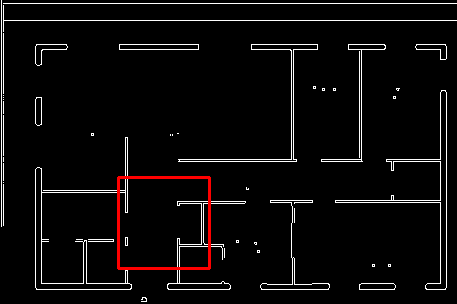

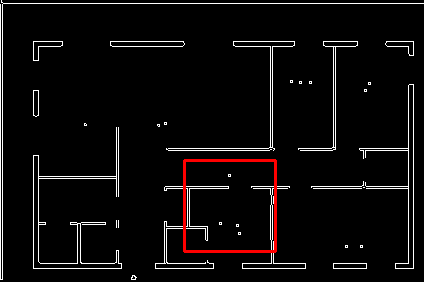

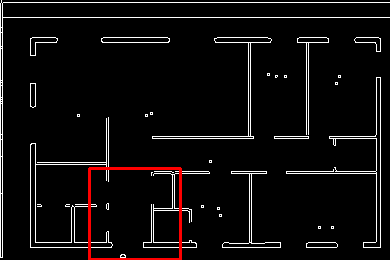

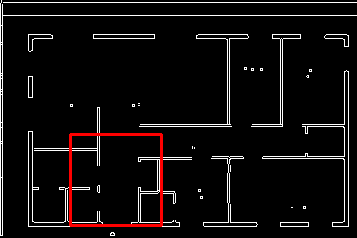

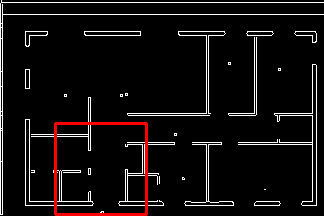

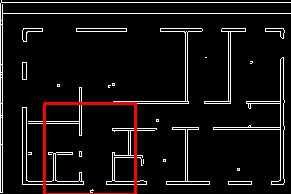

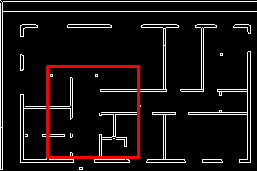

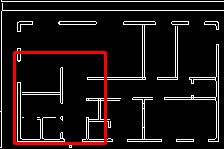

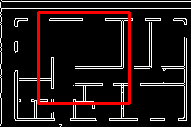

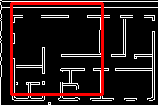

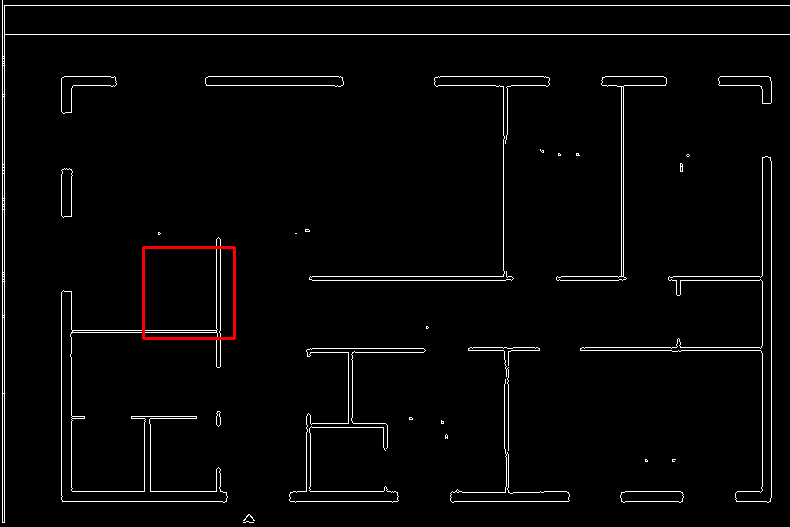

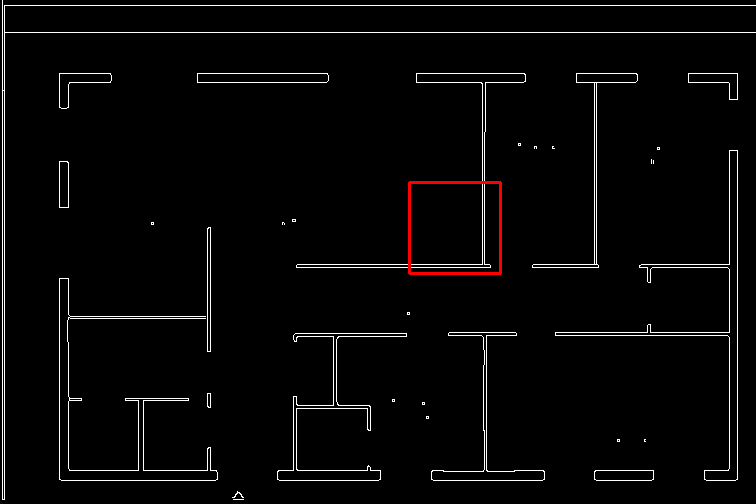

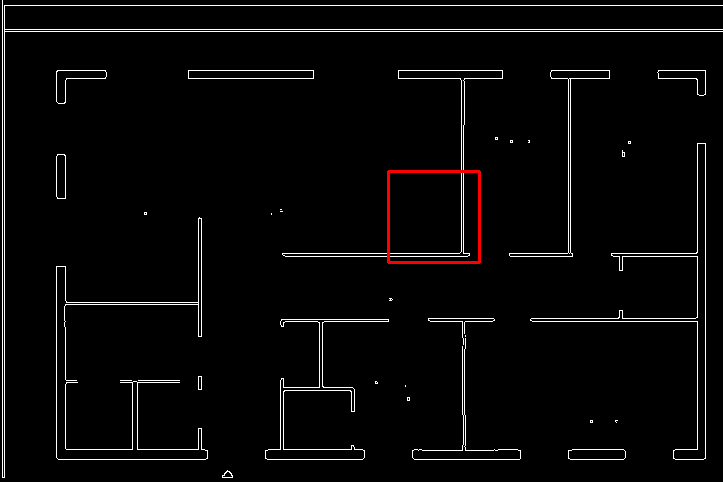

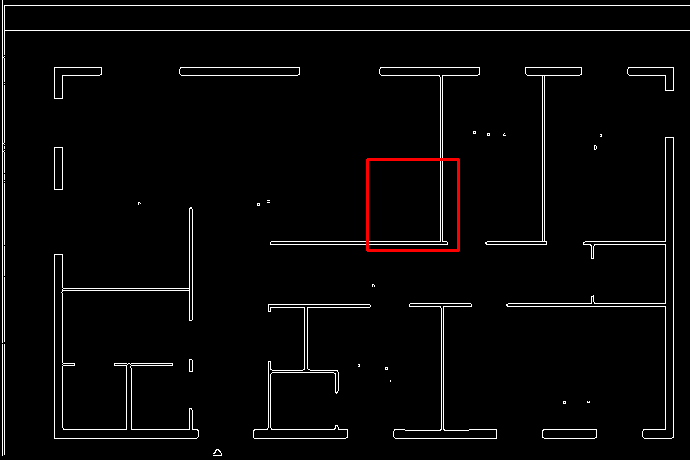

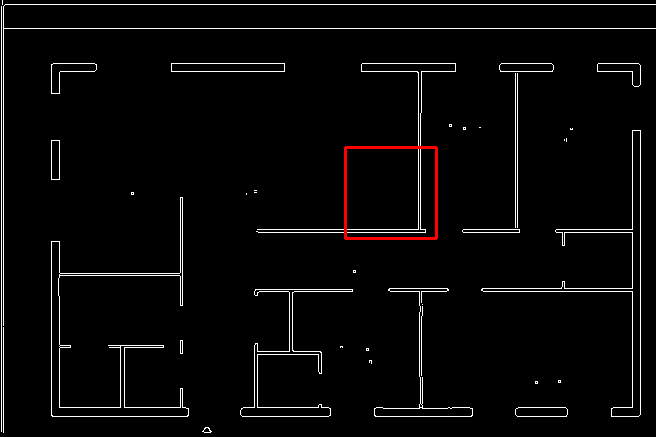

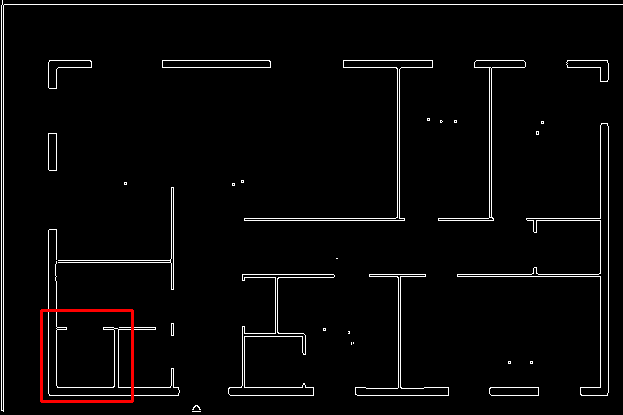

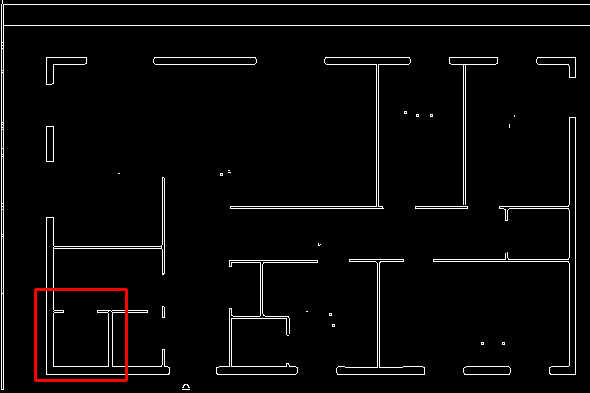

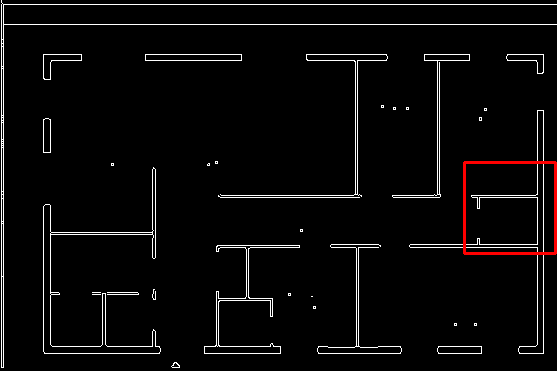

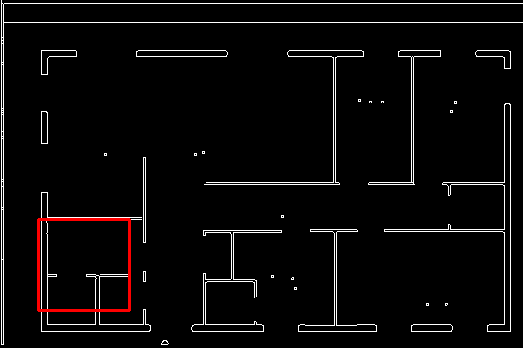

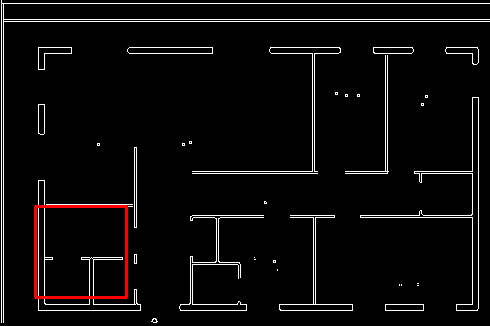

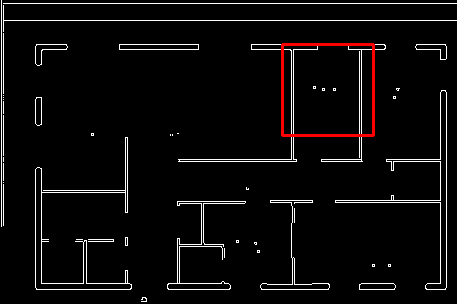

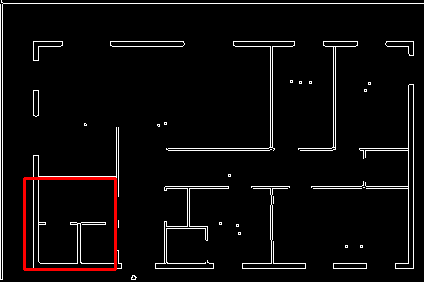

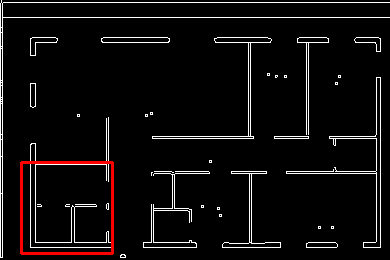

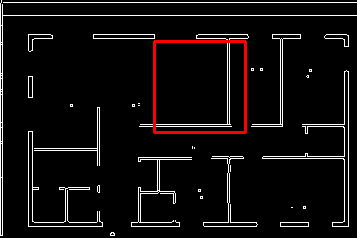

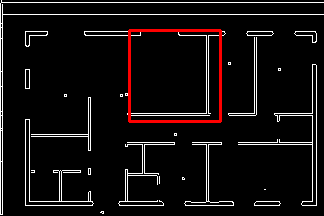

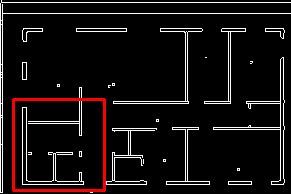

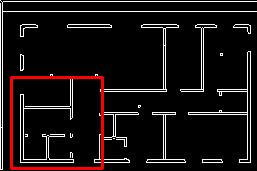

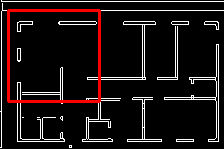

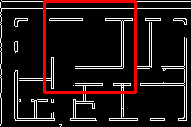

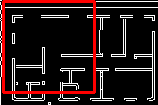

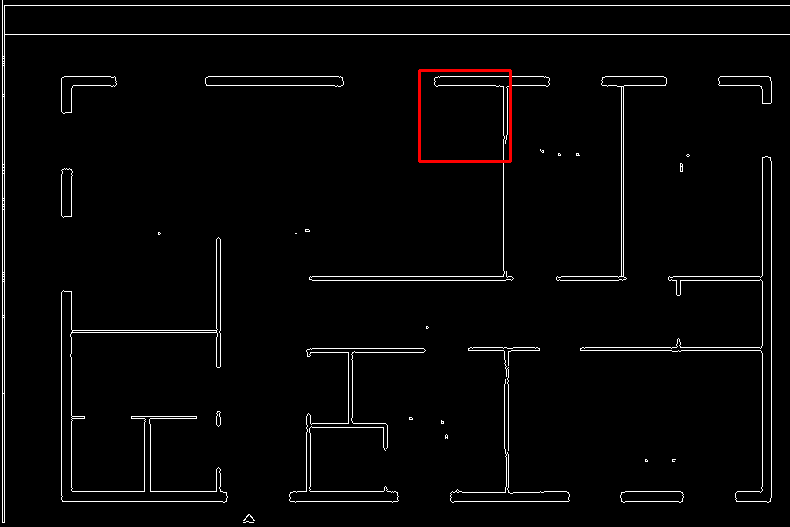

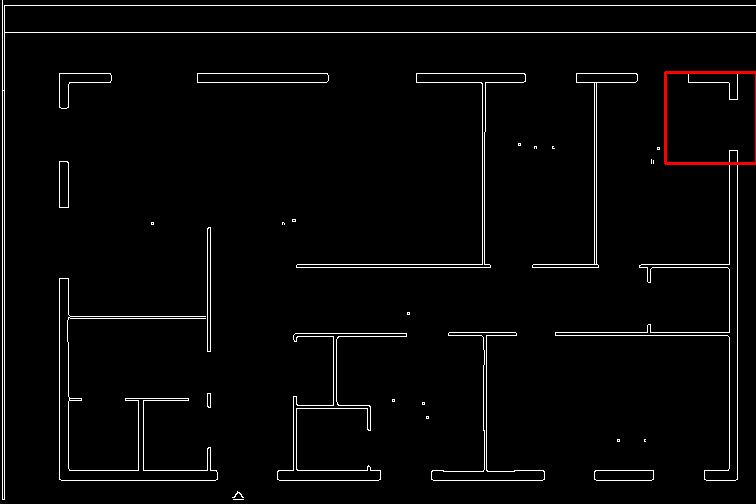

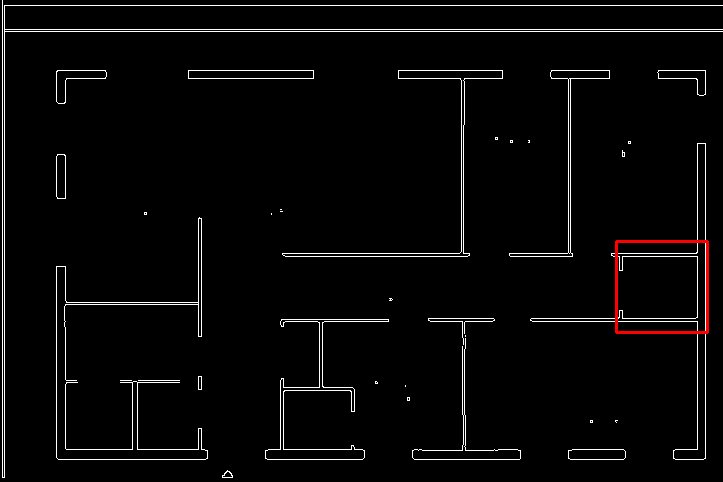

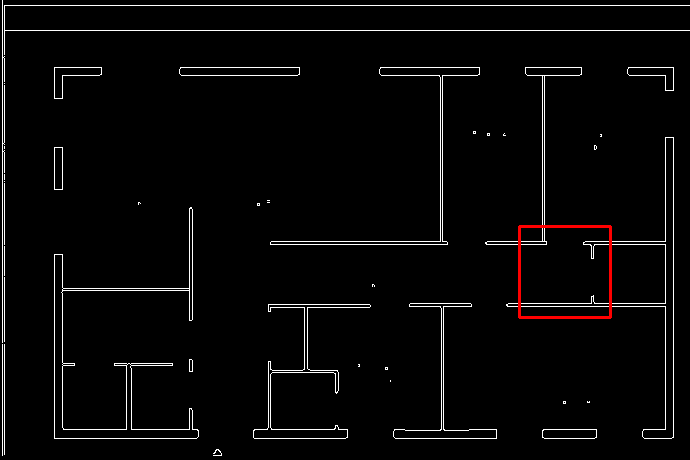

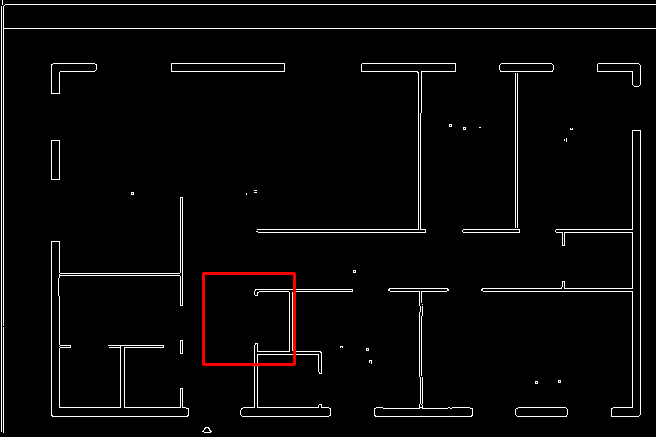

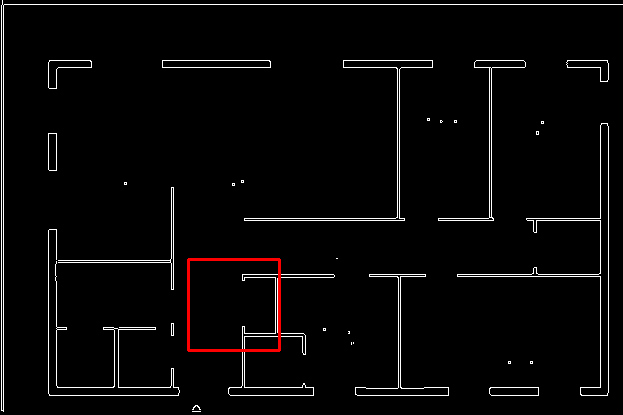

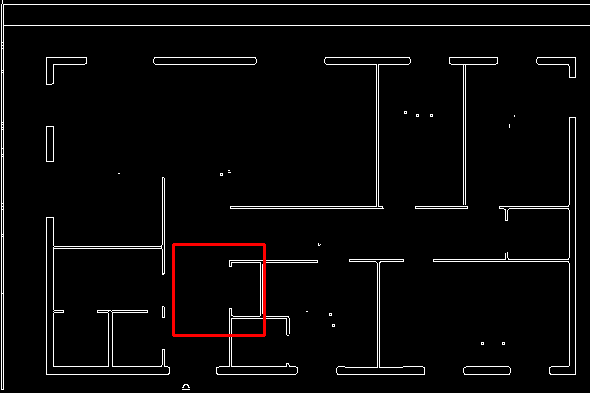

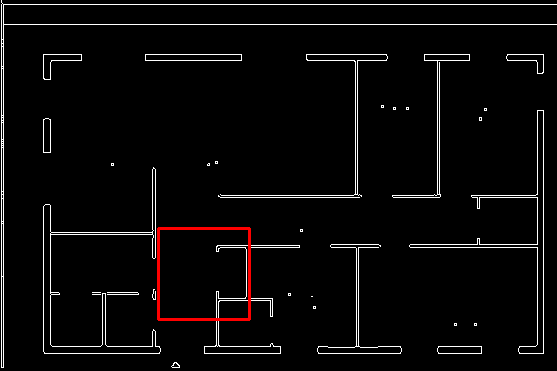

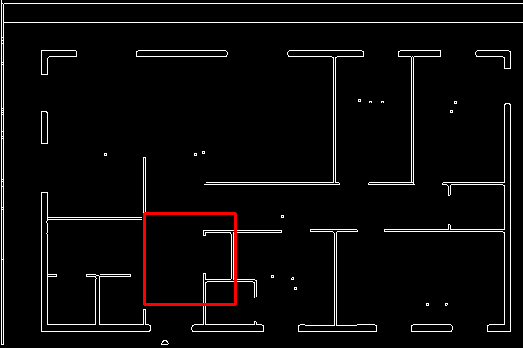

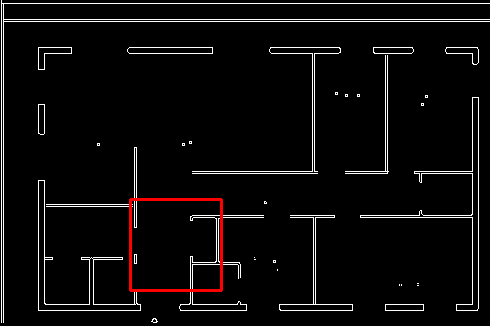

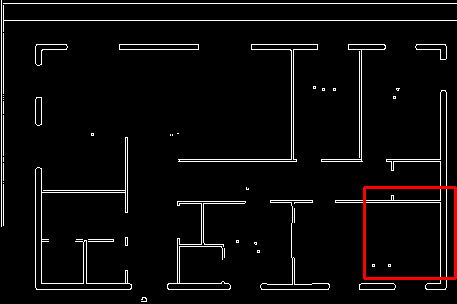

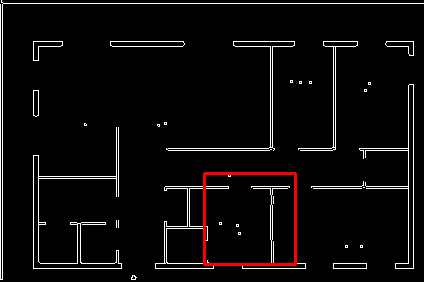

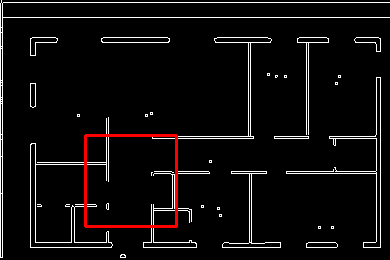

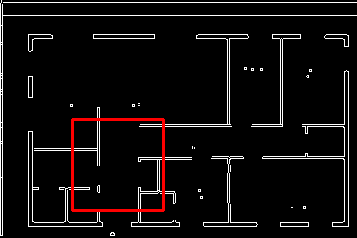

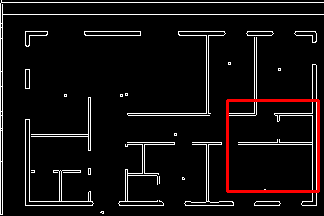

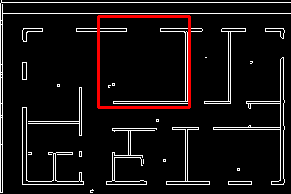

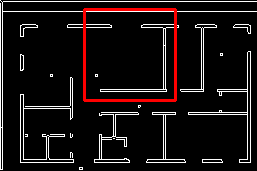

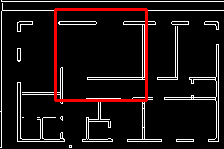

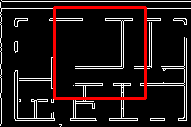

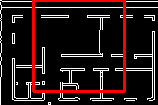

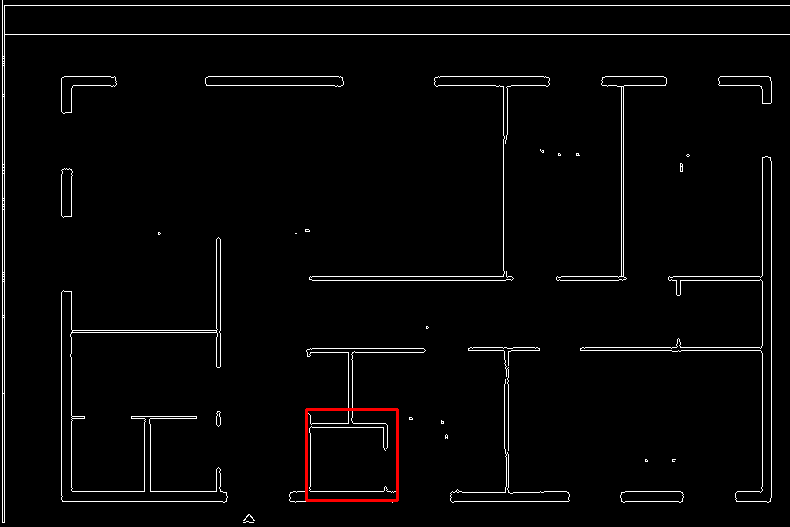

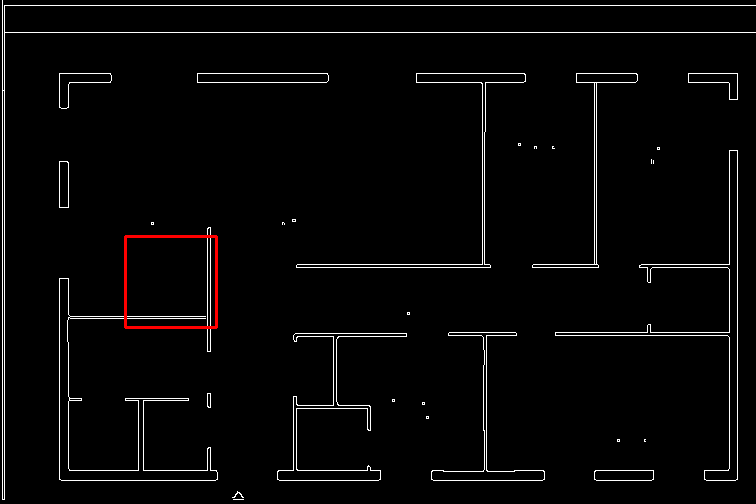

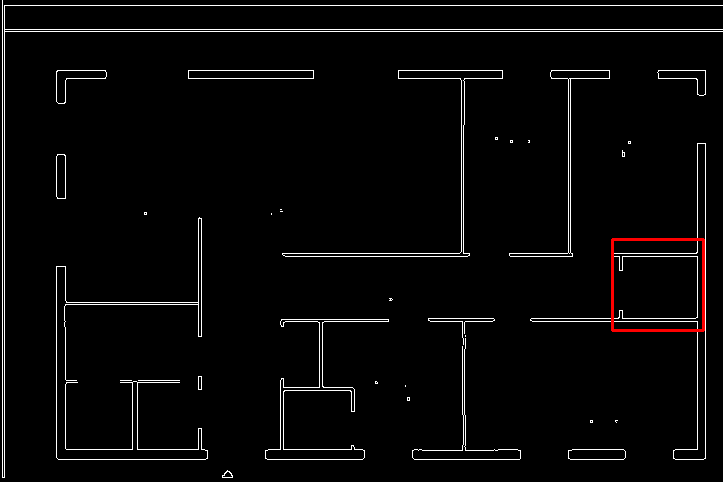

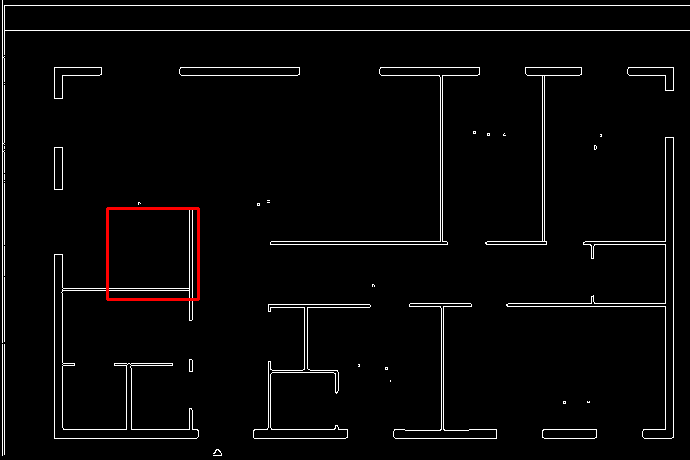

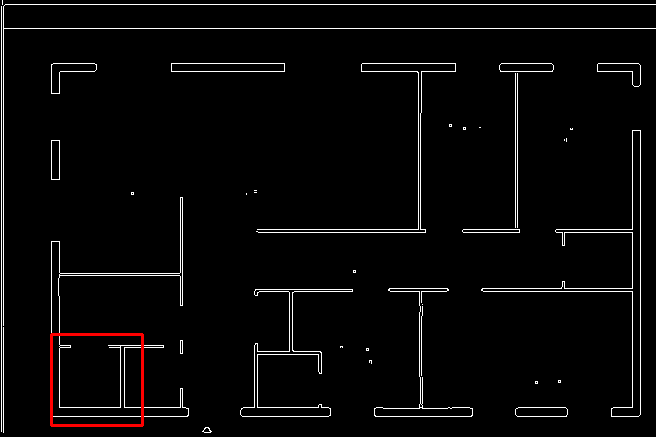

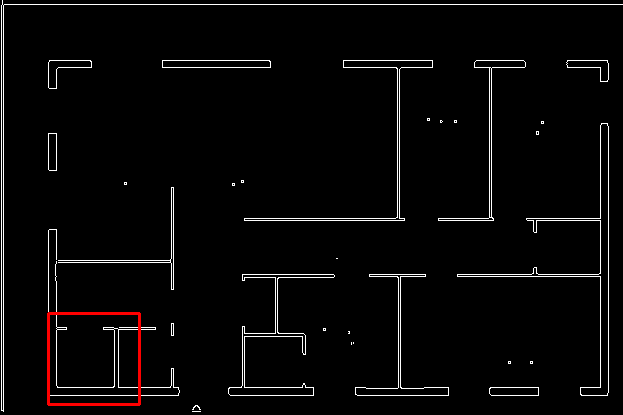

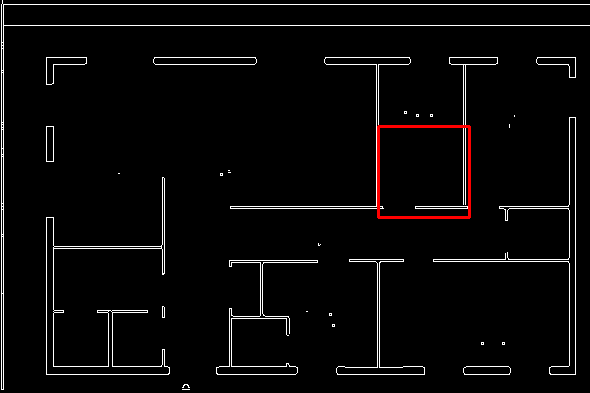

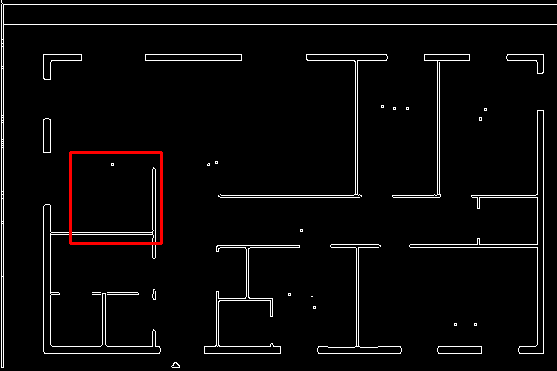

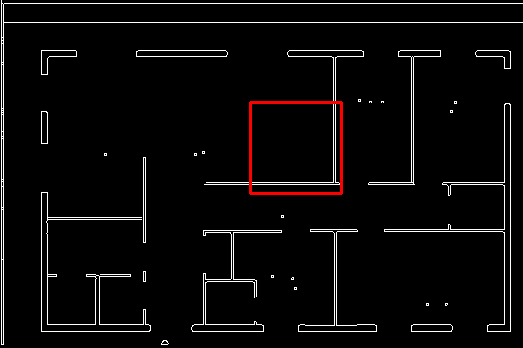

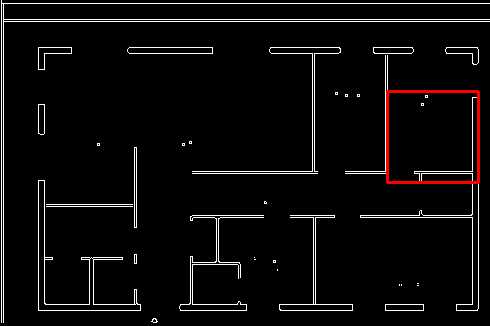

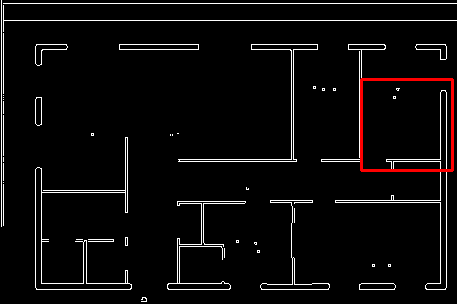

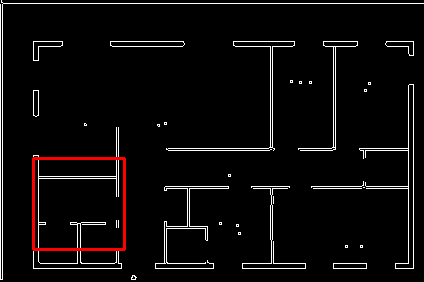

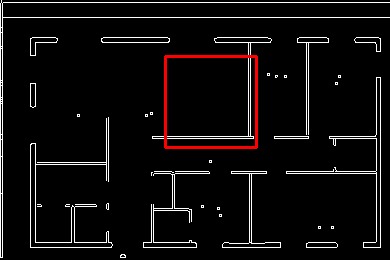

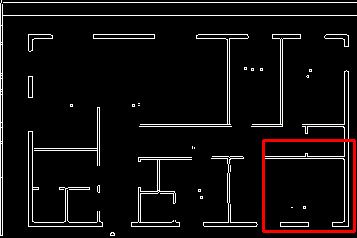

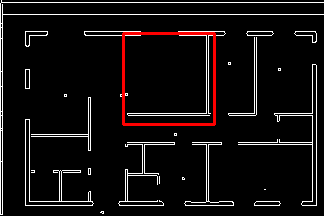

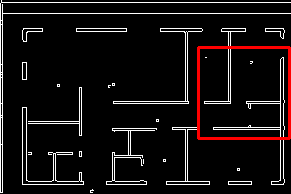

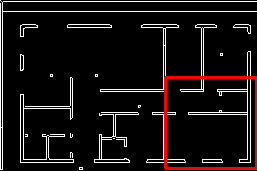

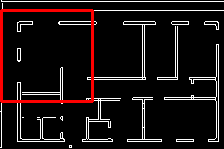

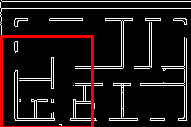

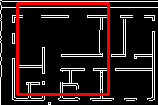

Done!


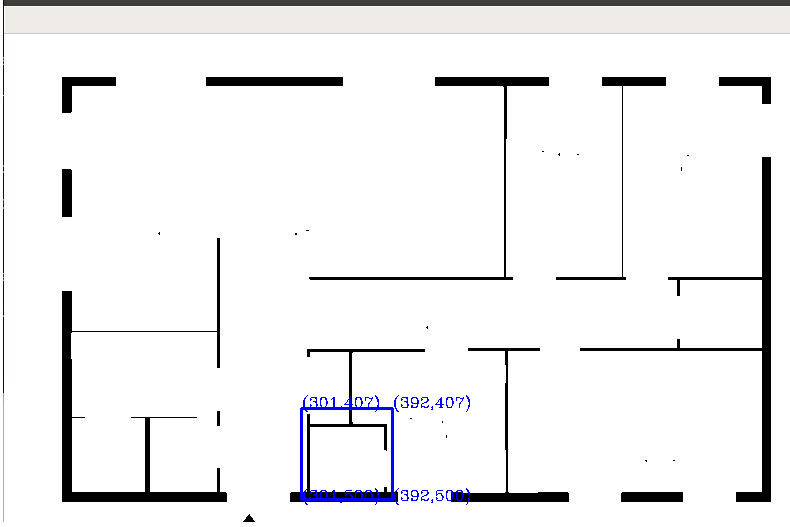

Room_shape Image


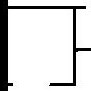


Transformation:
No Flip
Angle of rotaion: 90 Degree


In [ ]:
# Visulizing all the iterations - make visualize as True
room_shape_path = "/content/rr1.jpg" # path to shape image
image_path = "/content/f2.JPG" # path to floor image

# Call function
match_shape(room_shape_path, image_path, visualize=True)